# Outlier Detection

## DBSCAN

In [ ]:
X_train_np = X_train.values

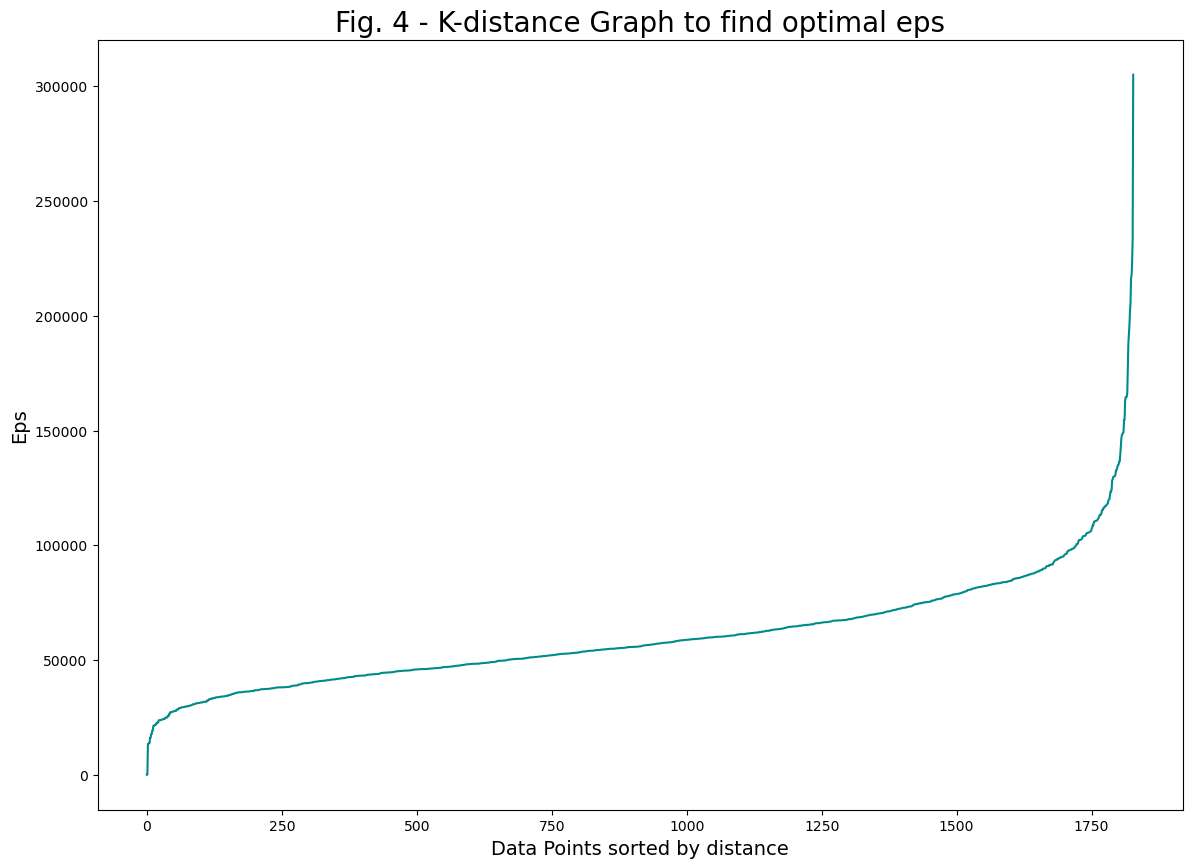

In [ ]:
# Calcoliamo i valori di distanza tra ogni record e il suo nearest neighbor
nbr = NearestNeighbors(n_neighbors=850)
nbrs = nbr.fit(X_train_np)
distances, indices = nbrs.kneighbors(X_train_np)

# Plottiamo la distanza dentro i valori del df e cerchiamo il "gomito" per vedere il punto di massima curvatura e quindi il valore ottimo di Eps
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(14,10))
plt.plot(distances, color = 'darkcyan')
plt.title('Fig. 4 - K-distance Graph to find optimal eps',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Eps',fontsize=14)
plt.show()

In [ ]:
dbscan = DBSCAN(eps=100000,
                min_samples=2,
                n_jobs=-1)
dbscan.fit(X_train)

DBSCAN(eps=100000, min_samples=2, n_jobs=-1)

In [ ]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 array([ 106, 1640,    4,    2,    4,    6,    2,   12,    3,    2,    2,
           3,    2,    3,    3,    2,    2,    3,    2,    2,    2,    3,
           2,    3,    2,    3,    2,    2,    2,    2]))

In [ ]:
anomalies_db = where(dbscan.labels_==-1)
anomalies_db

(array([   0,    1,    2, ..., 1825, 1826, 1827]),)

## BoxPlot

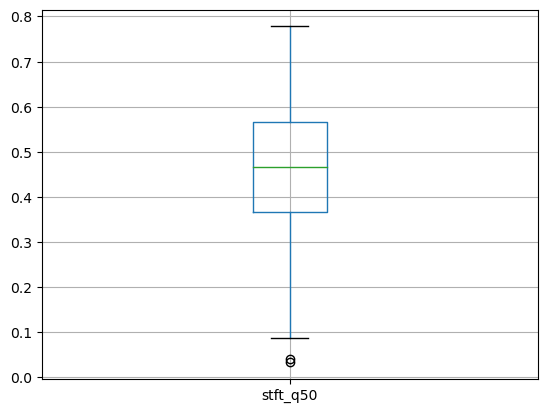

In [ ]:
X_train.boxplot(column='stft_q50', return_type='axes');

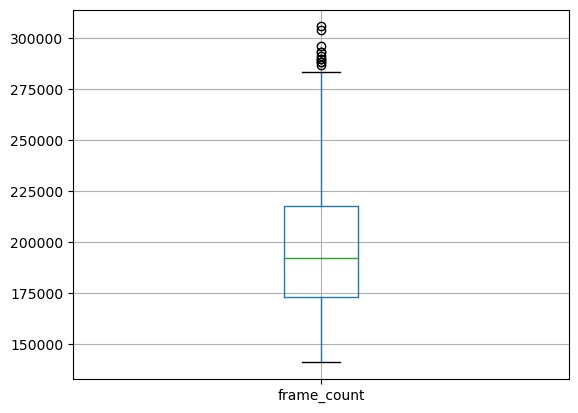

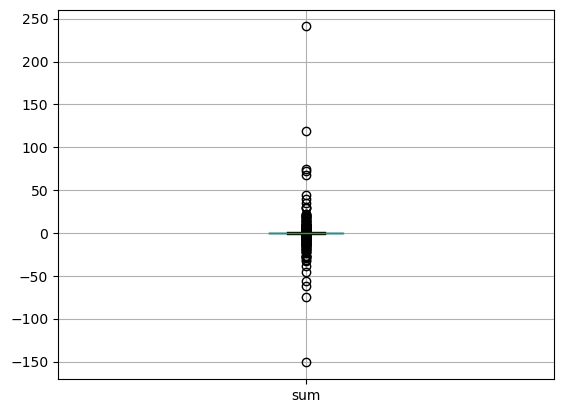

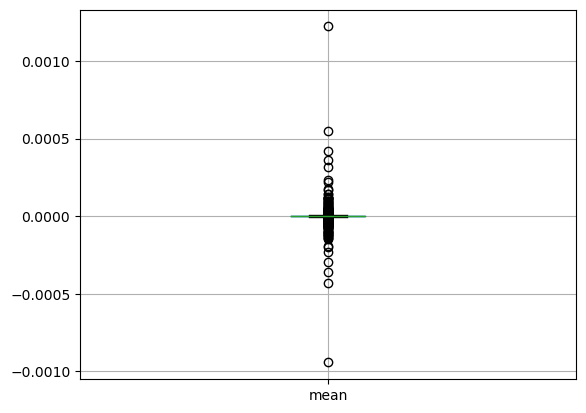

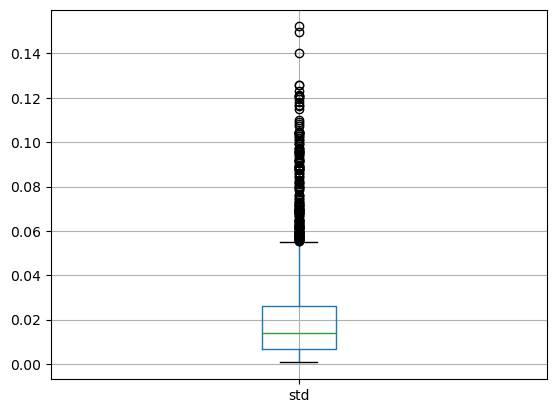

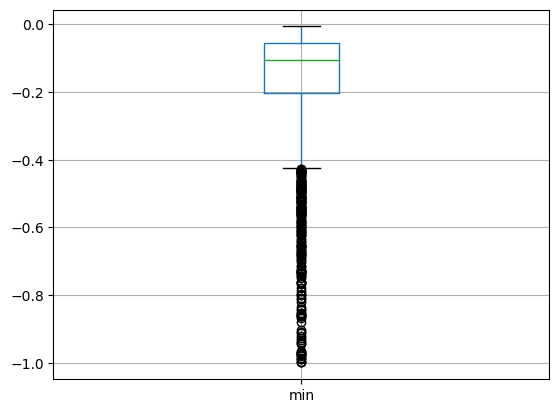

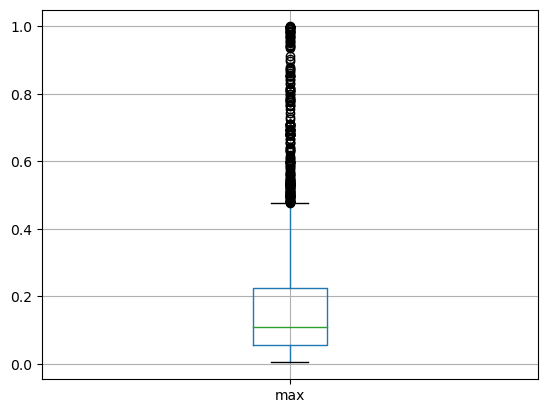

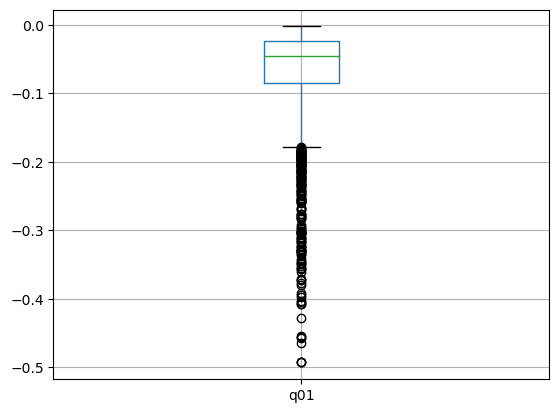

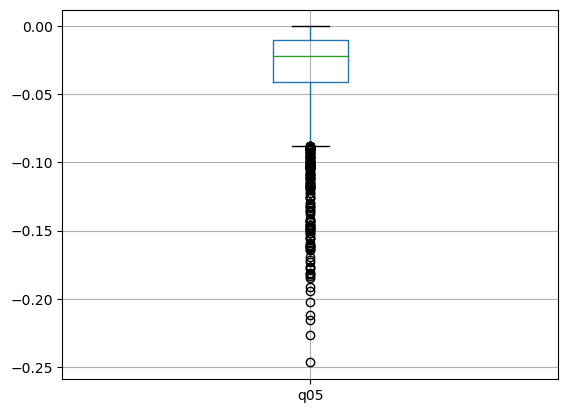

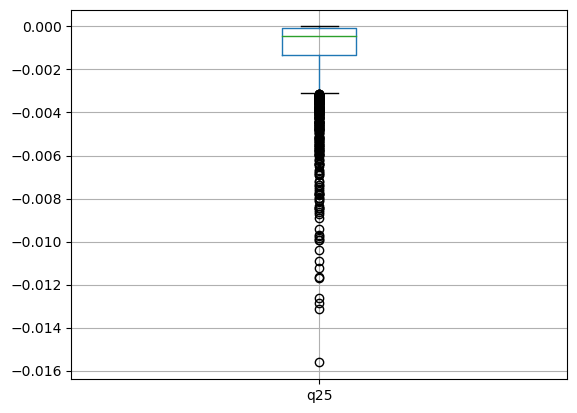

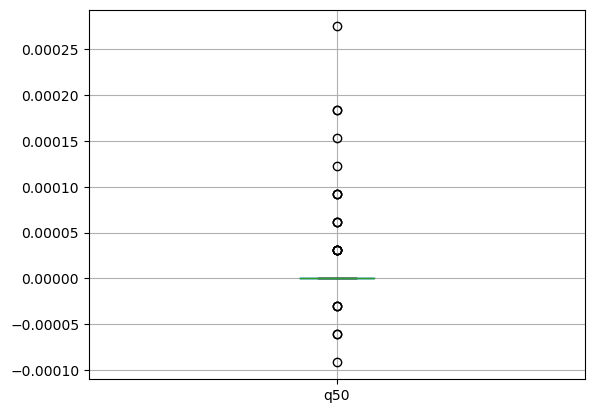

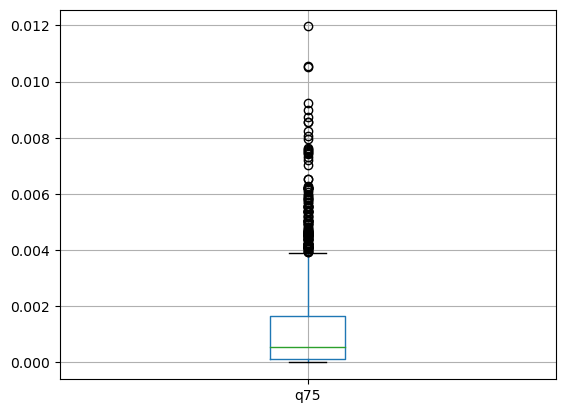

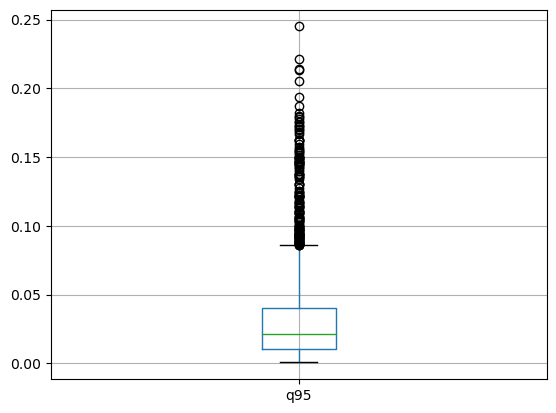

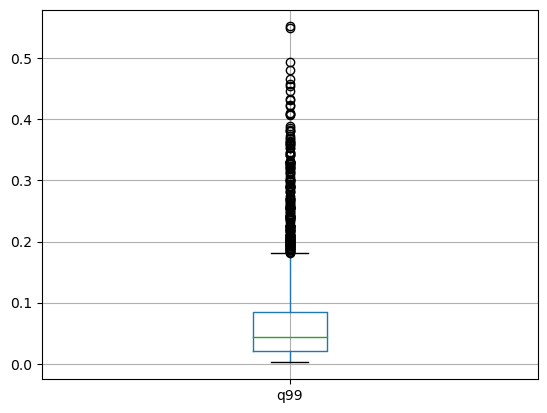

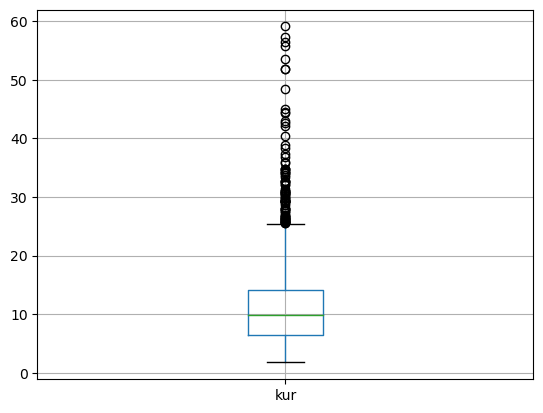

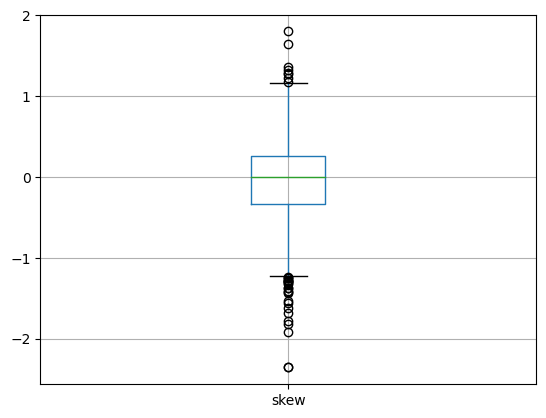

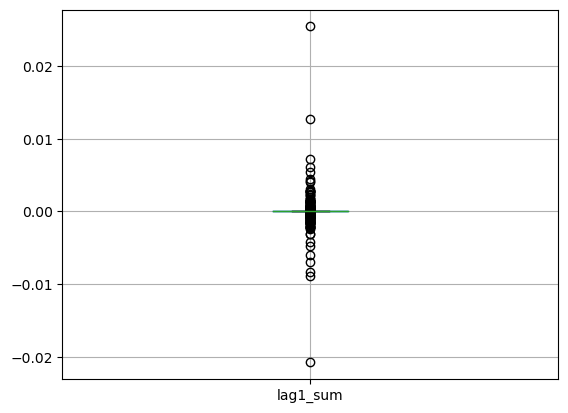

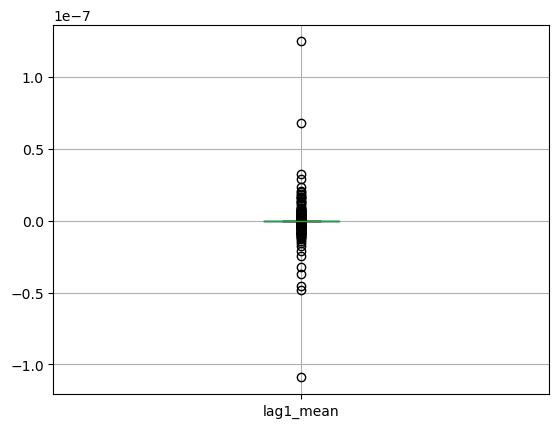

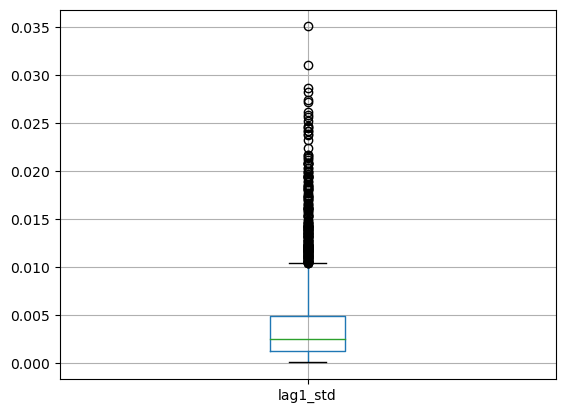

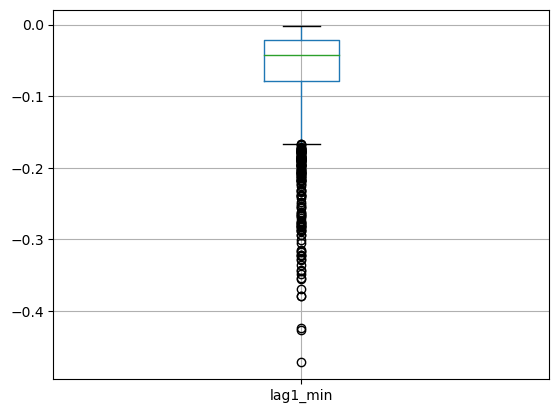

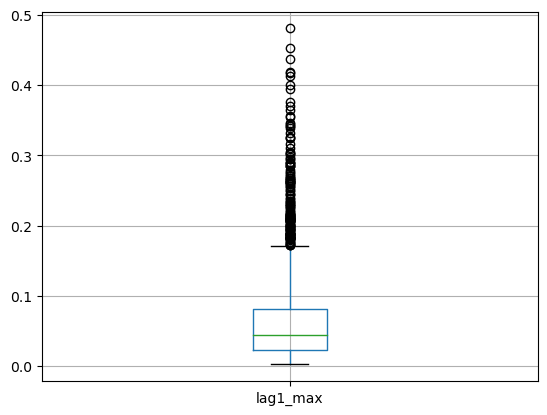

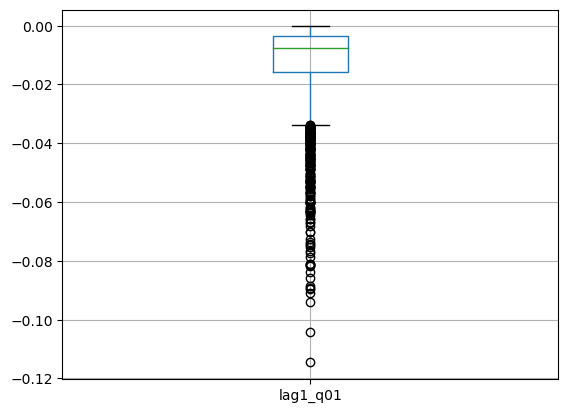

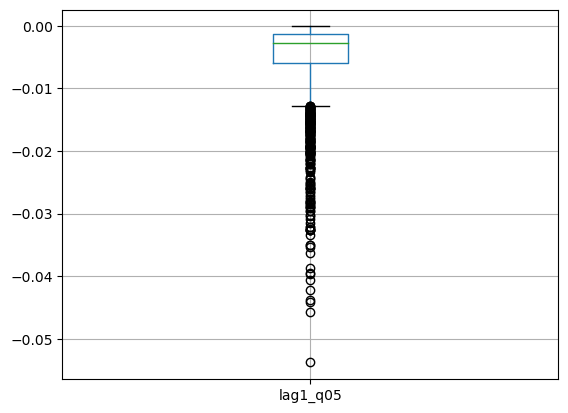

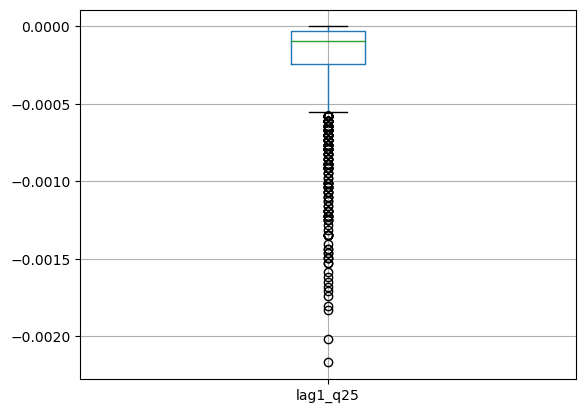

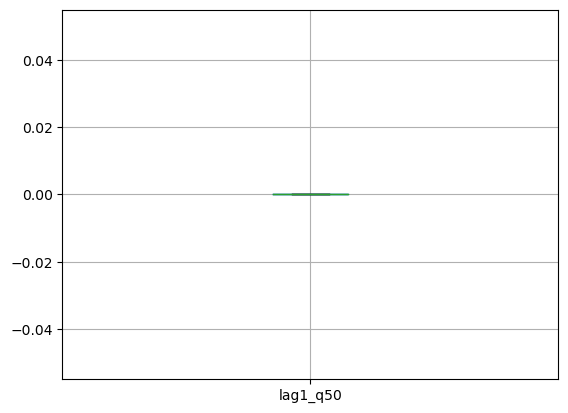

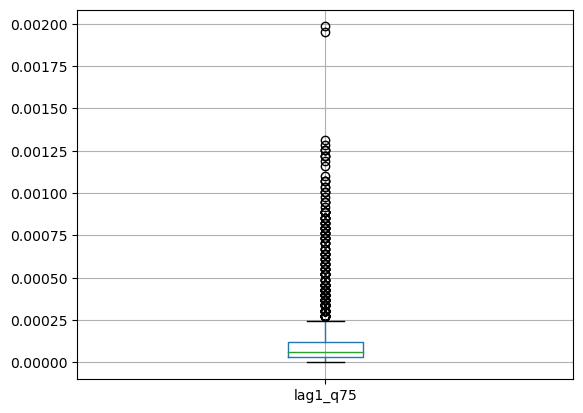

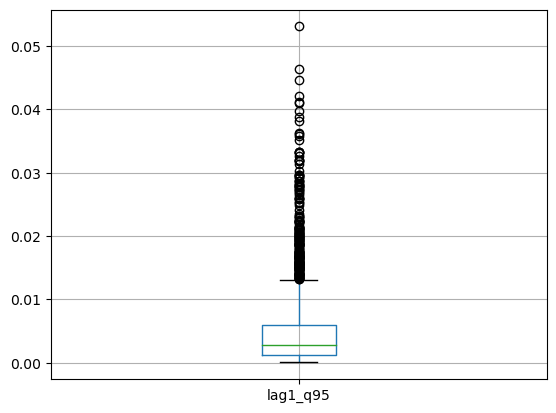

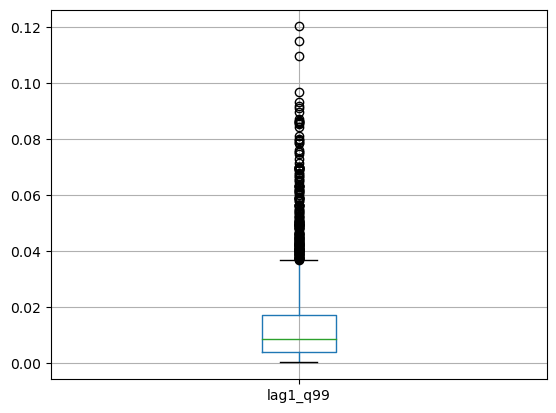

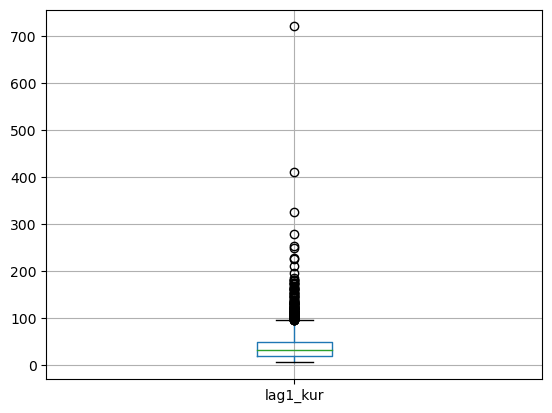

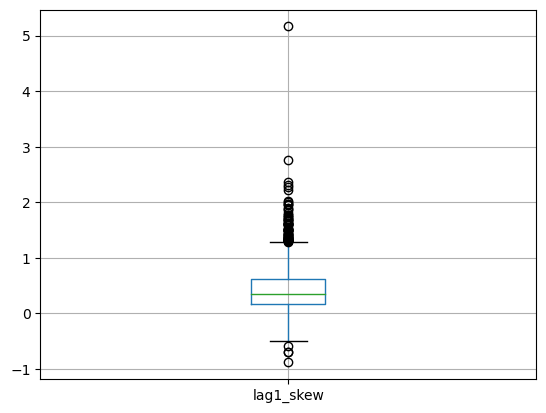

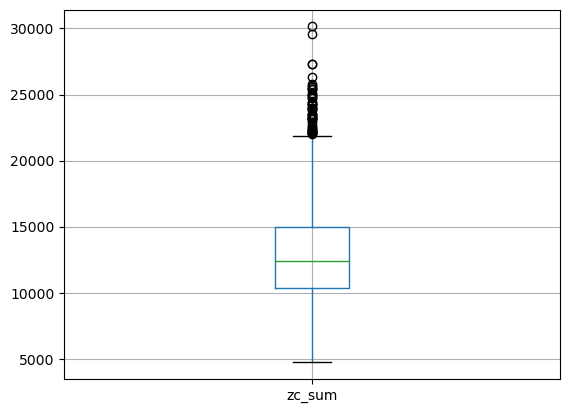

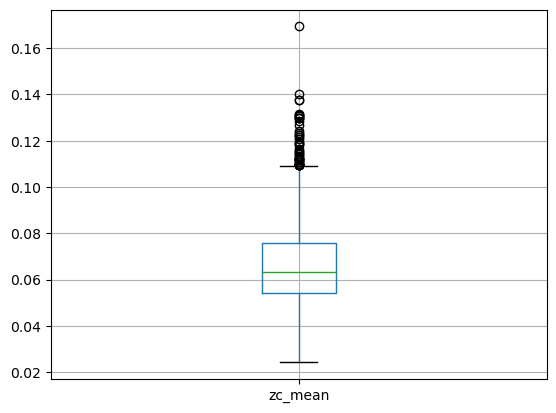

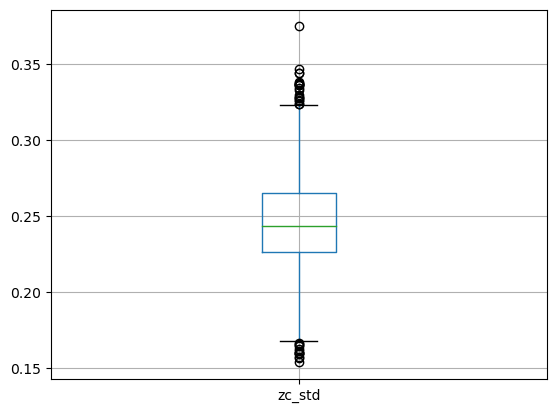

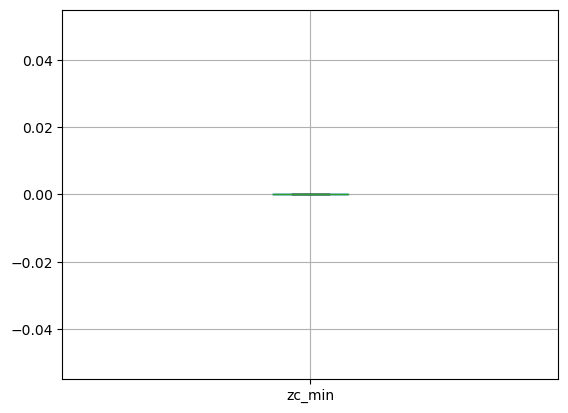

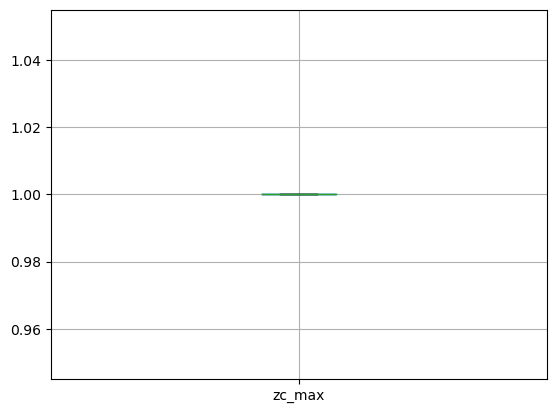

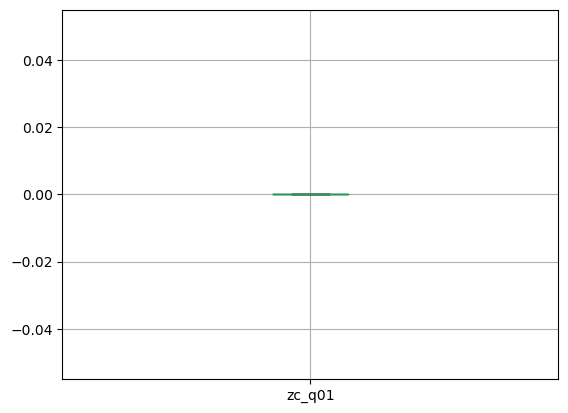

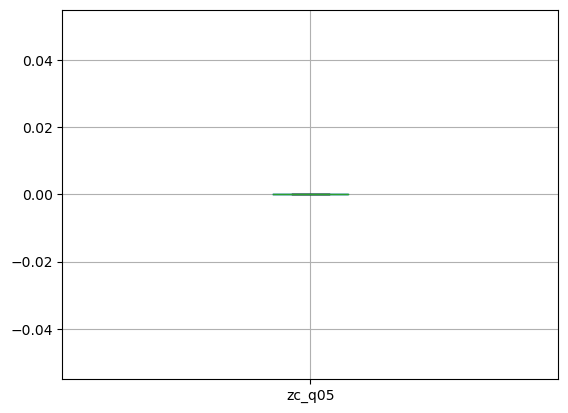

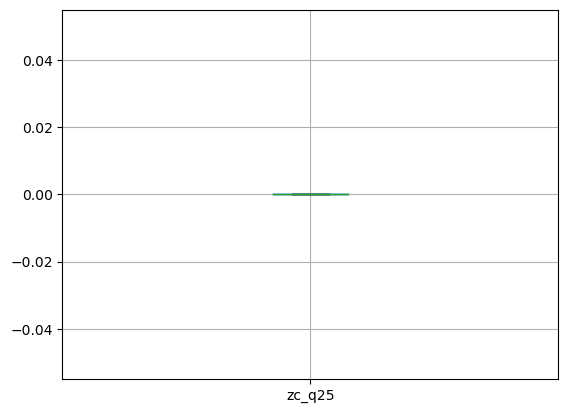

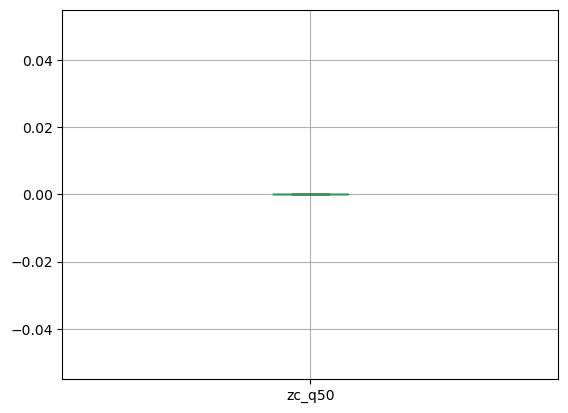

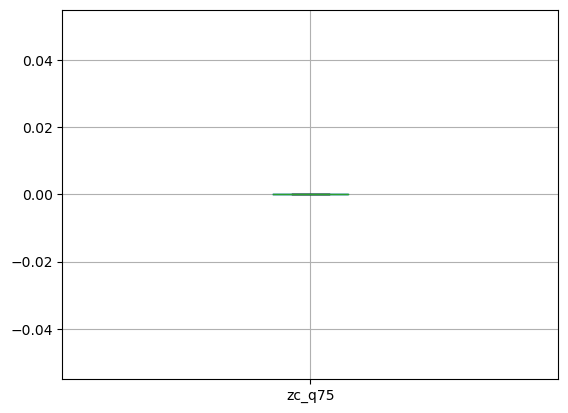

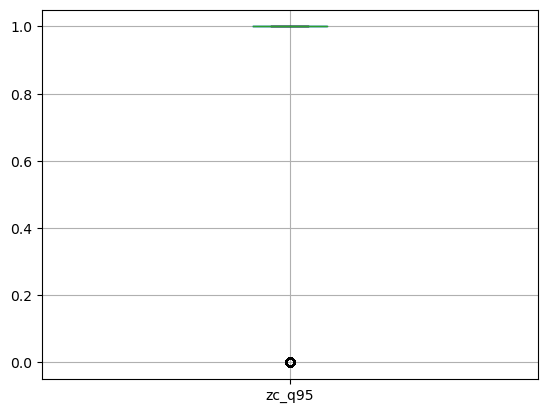

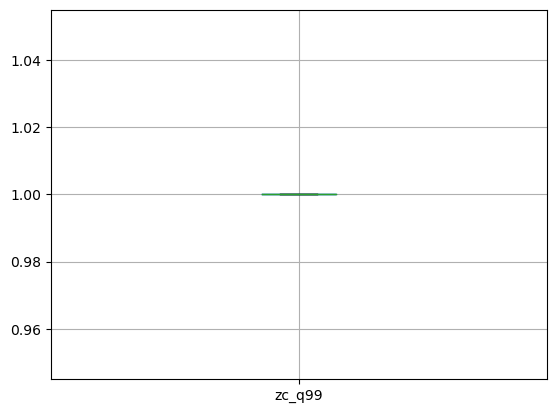

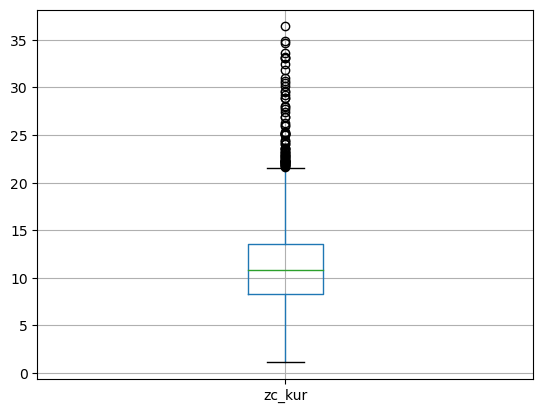

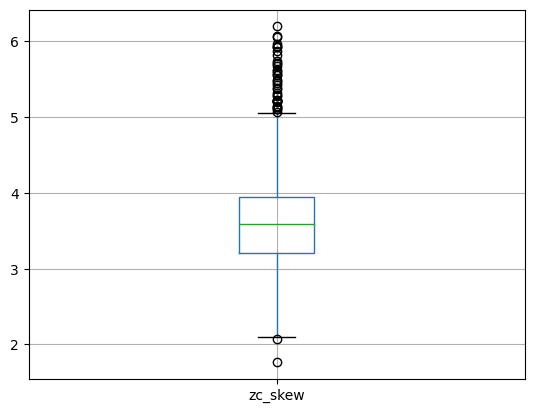

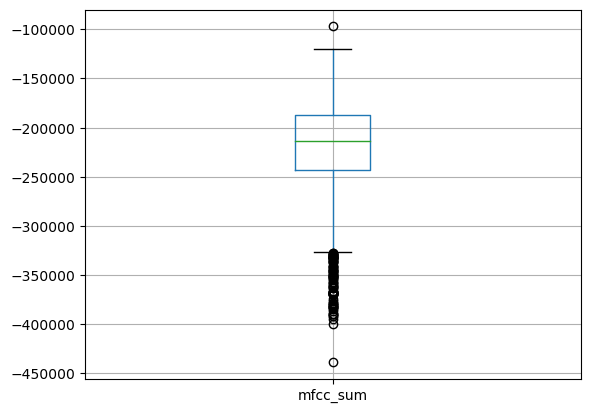

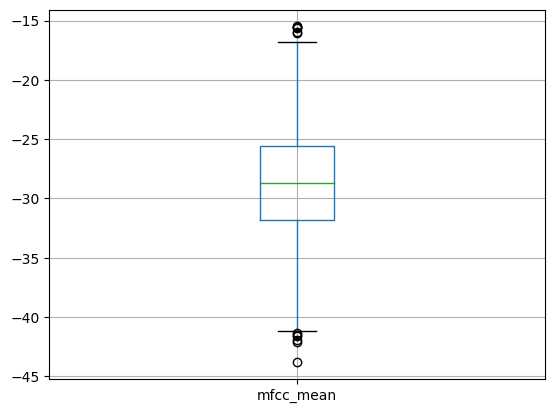

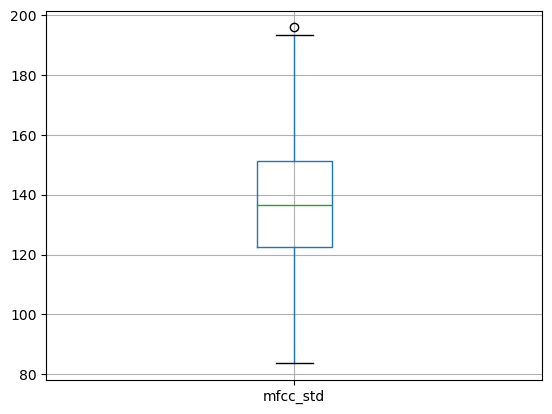

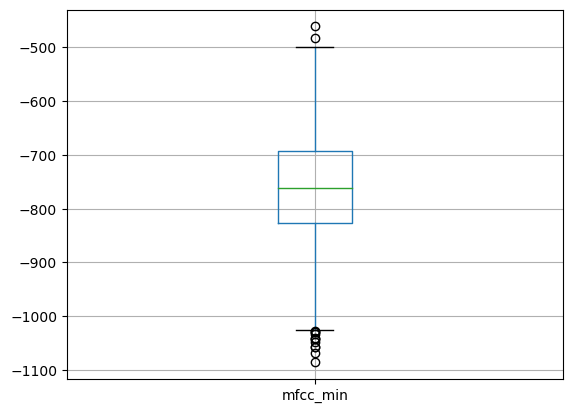

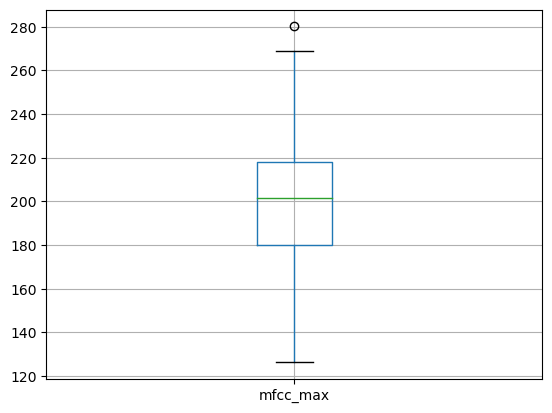

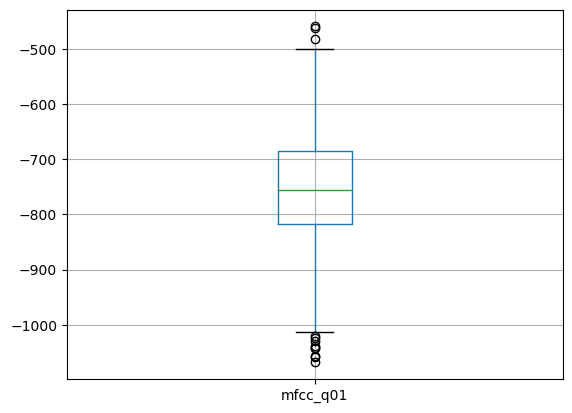

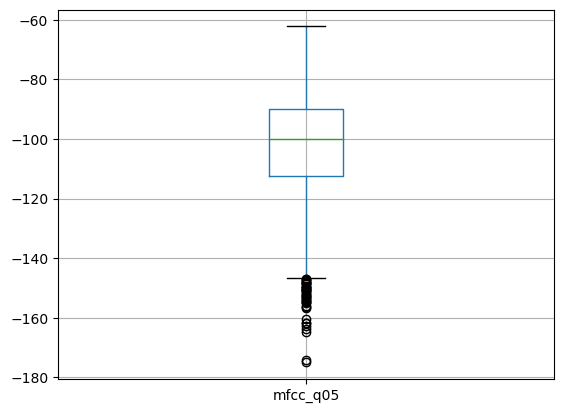

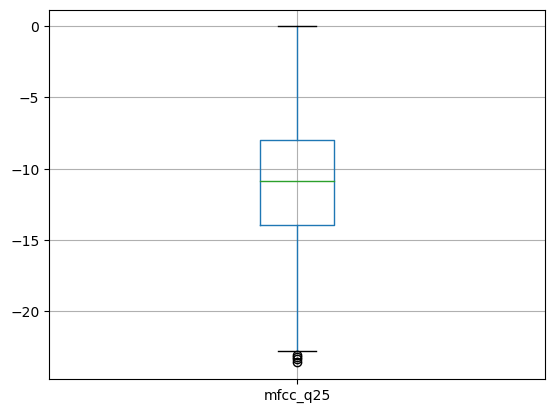

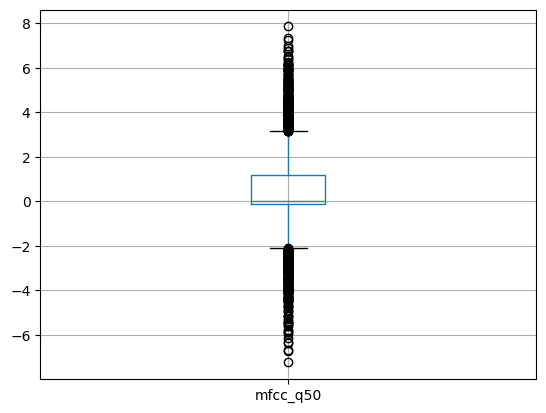

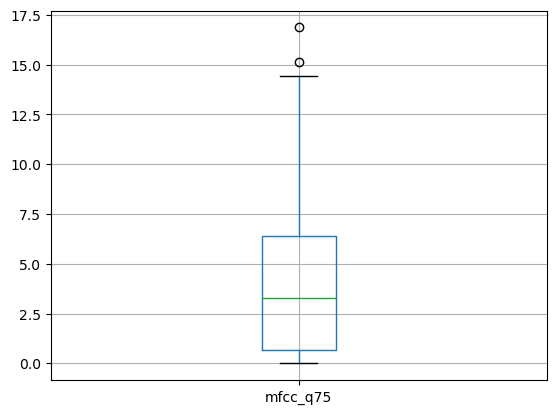

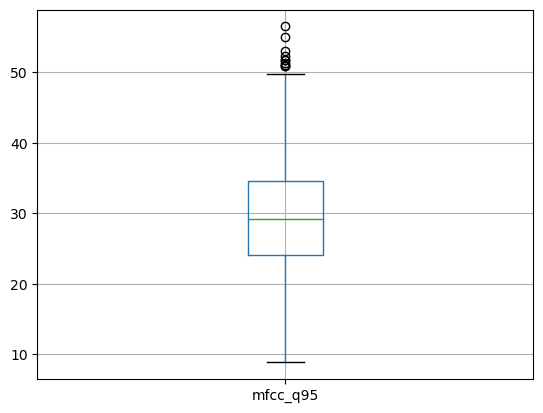

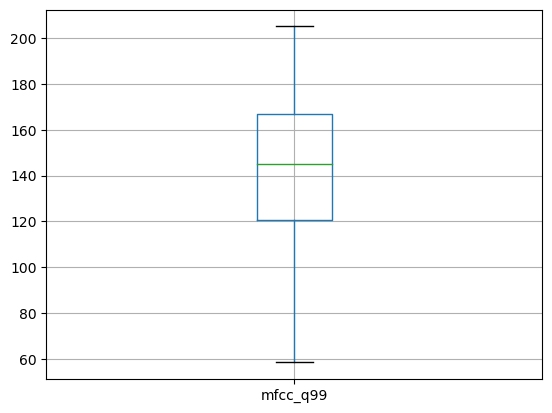

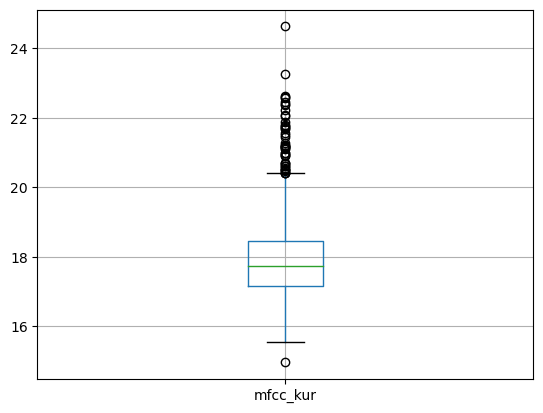

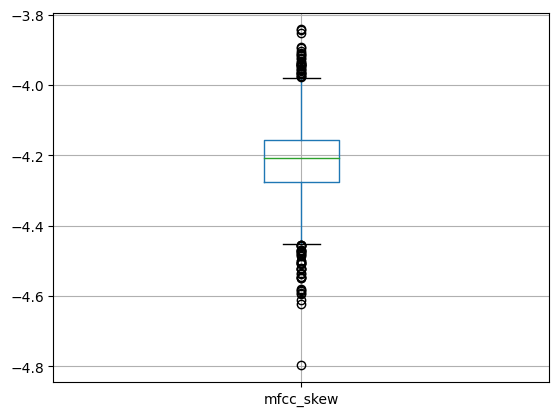

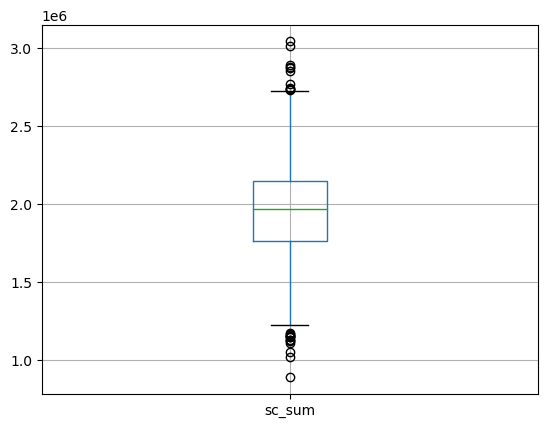

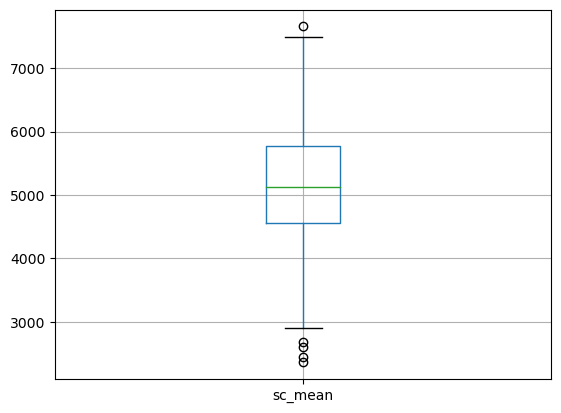

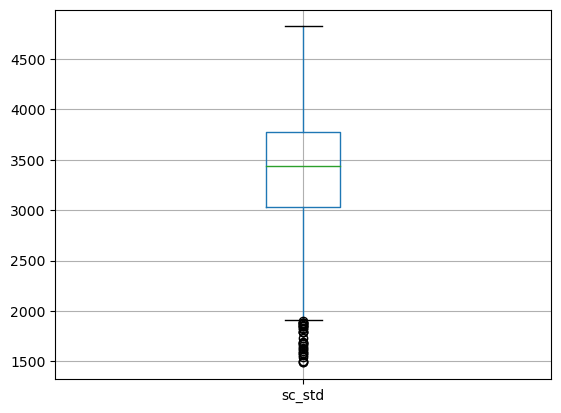

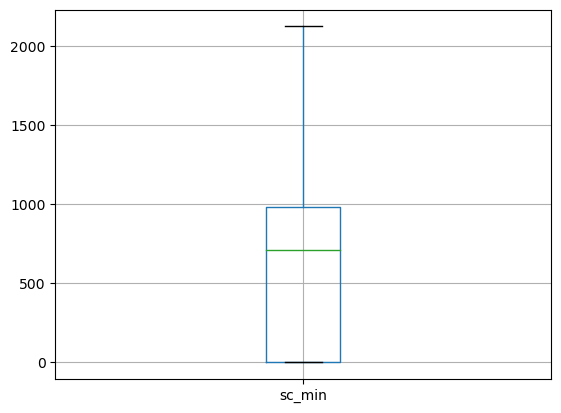

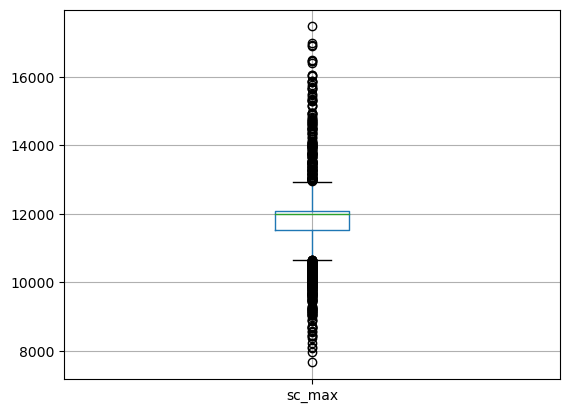

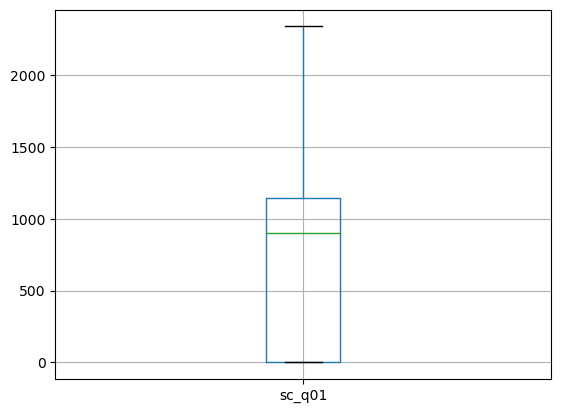

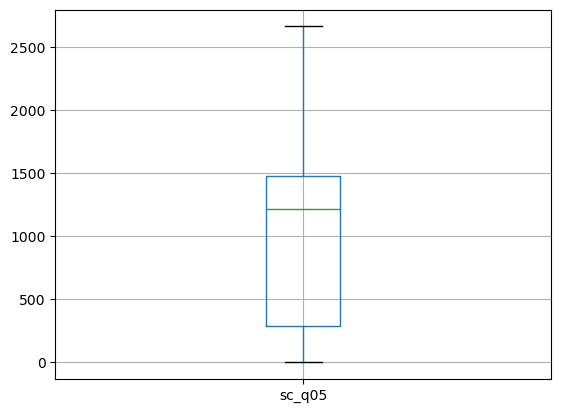

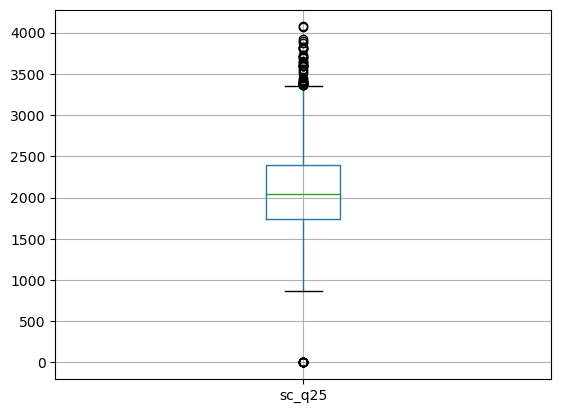

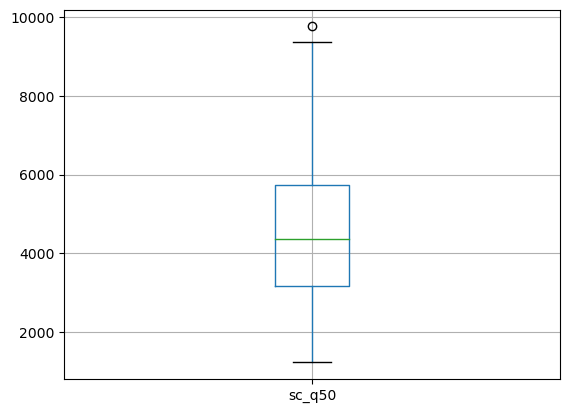

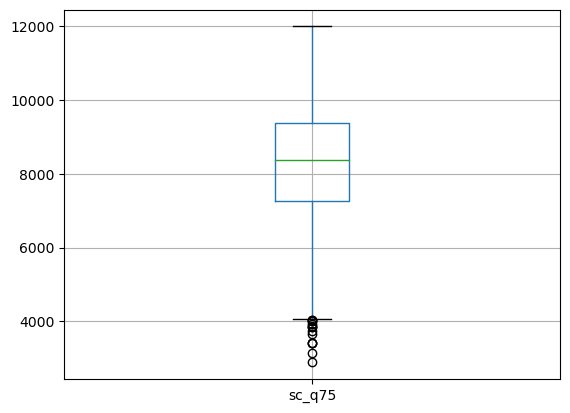

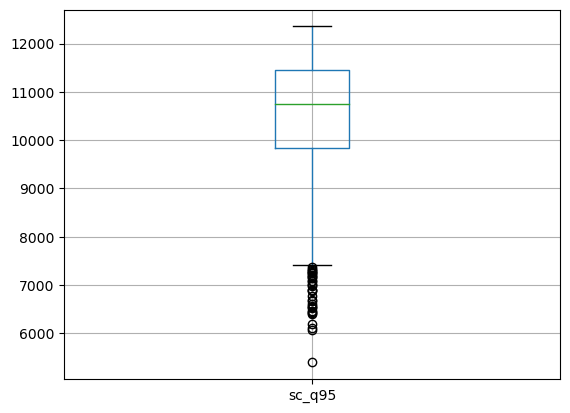

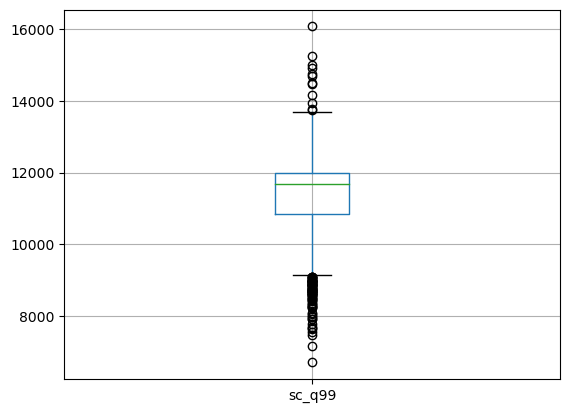

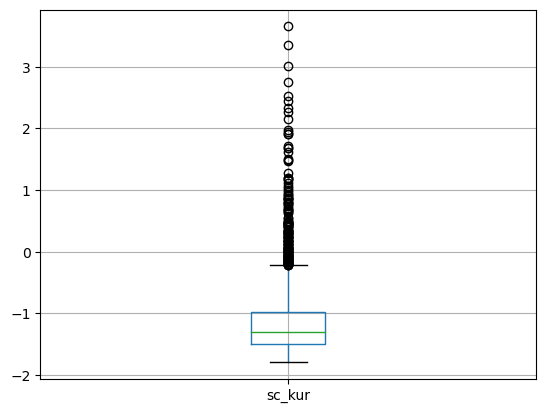

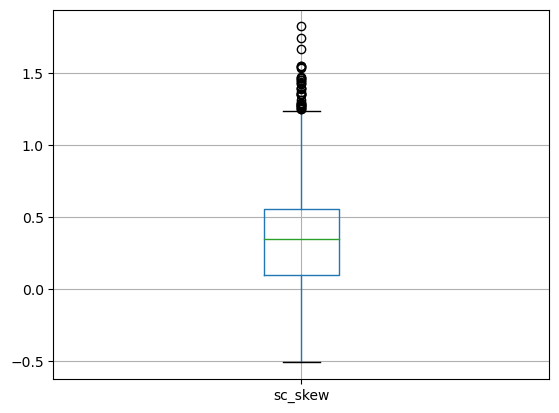

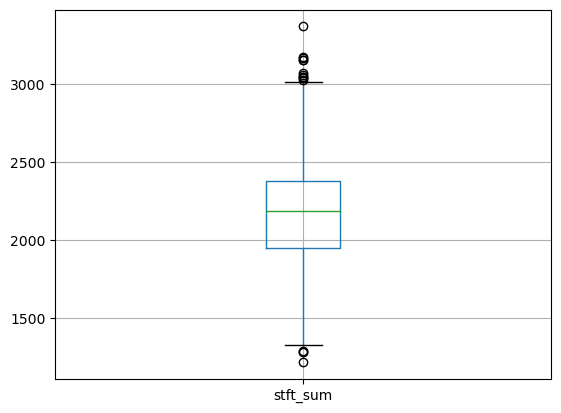

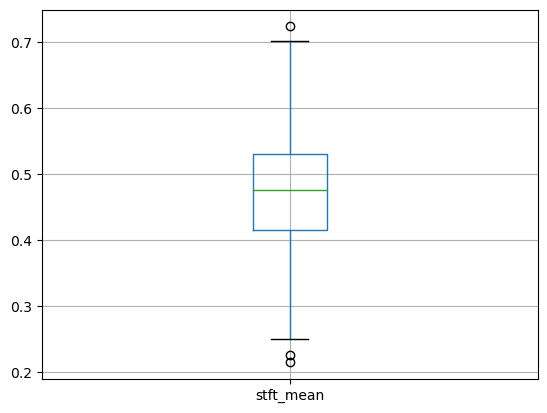

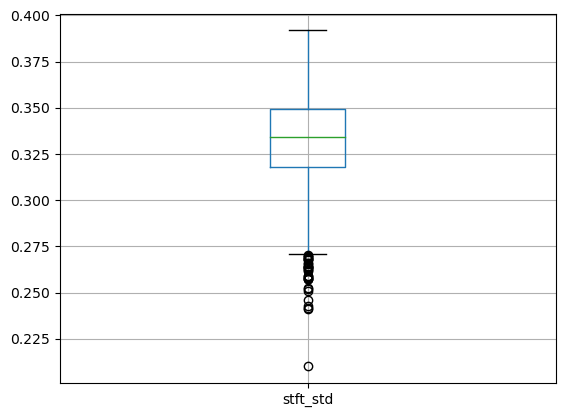

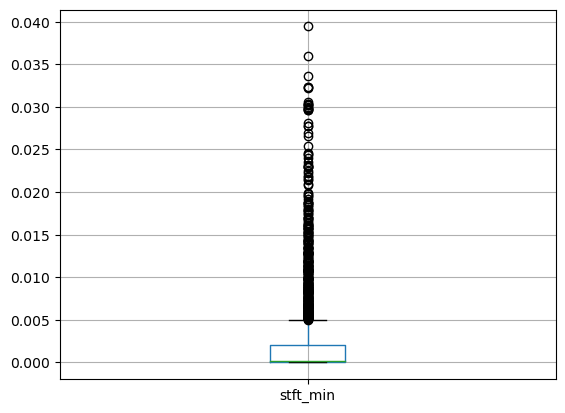

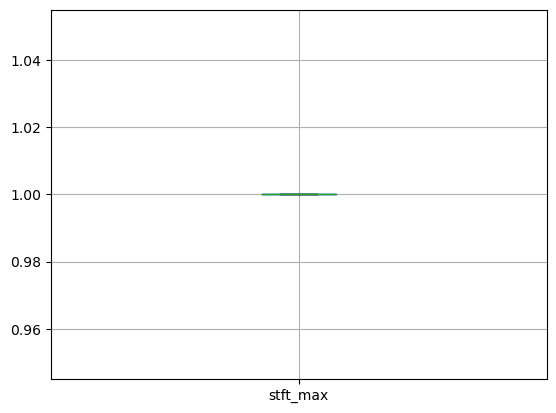

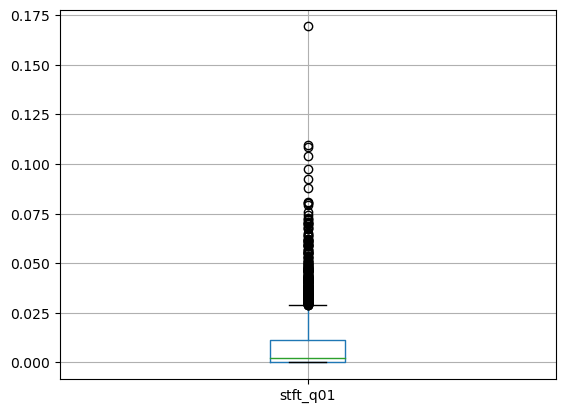

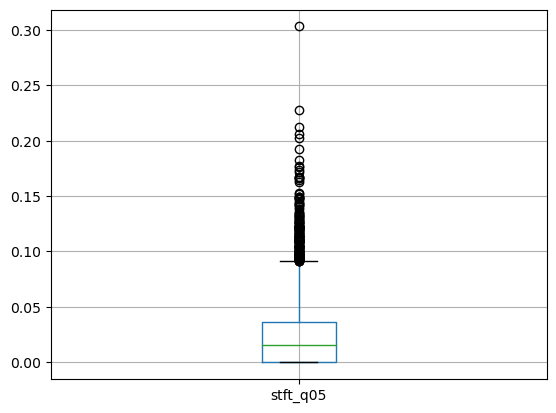

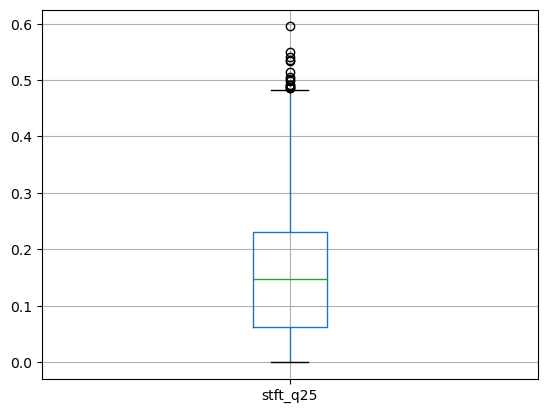

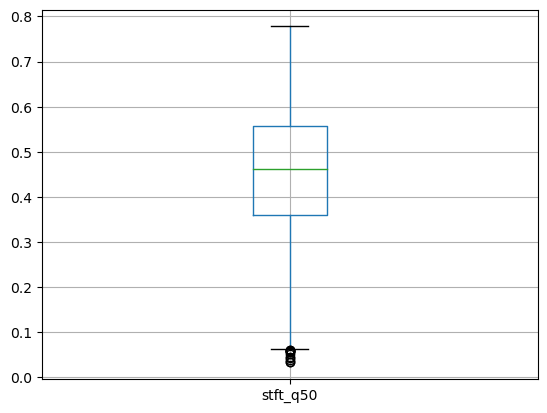

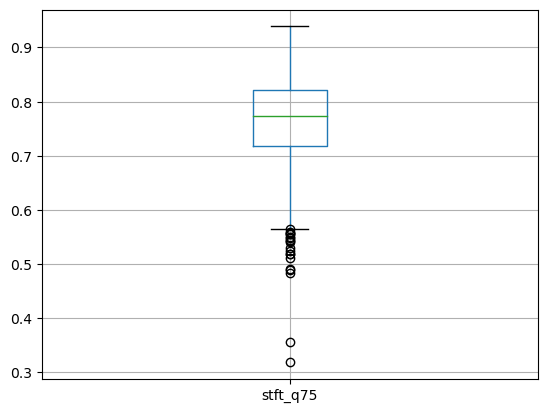

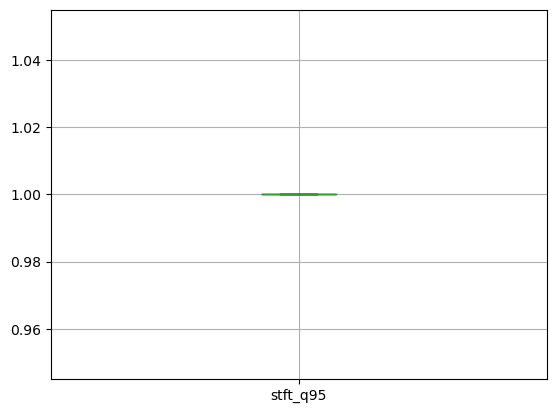

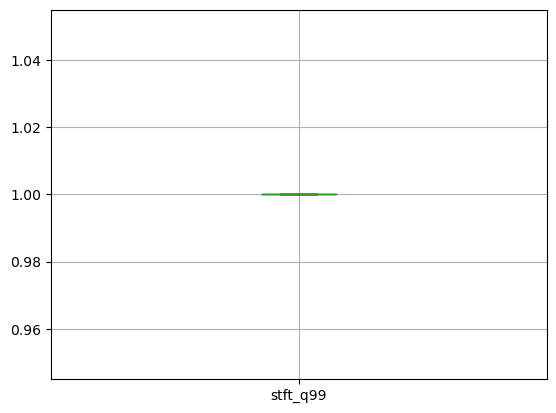

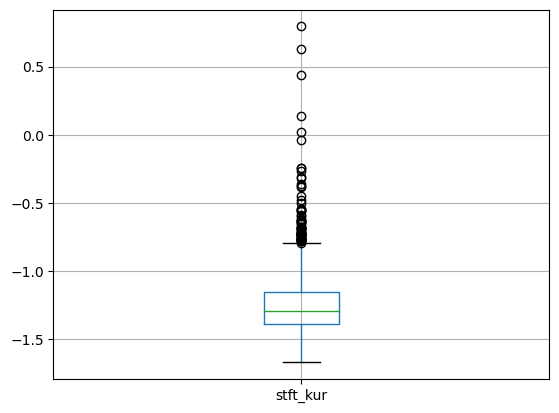

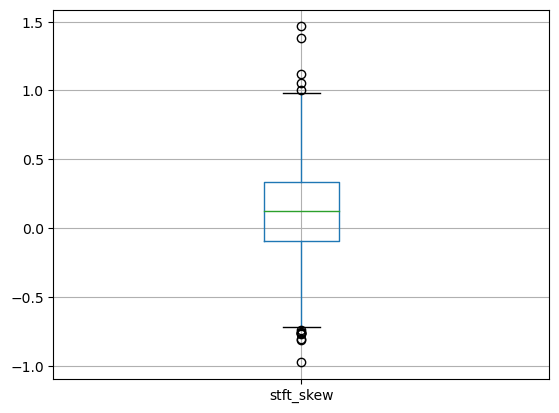

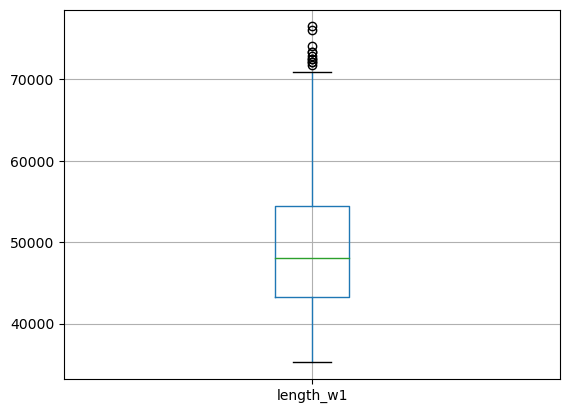

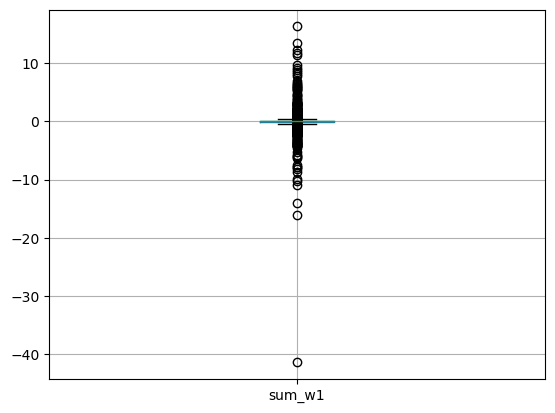

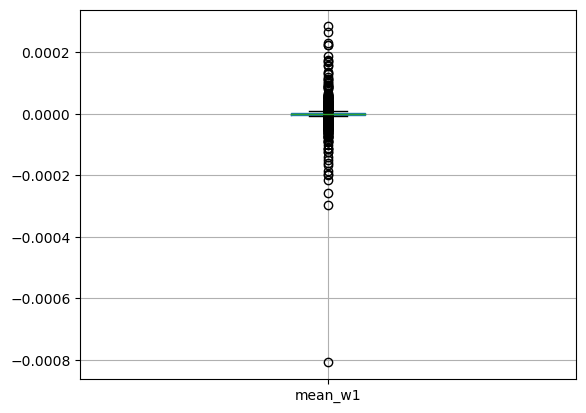

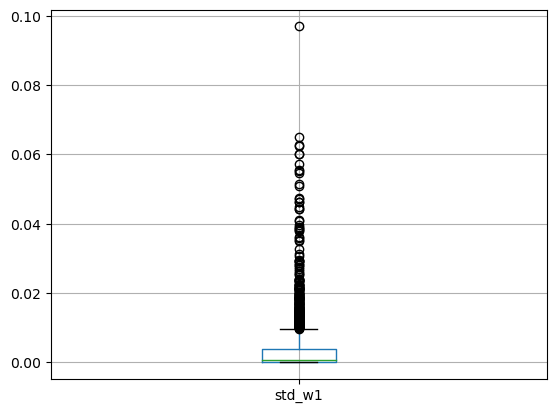

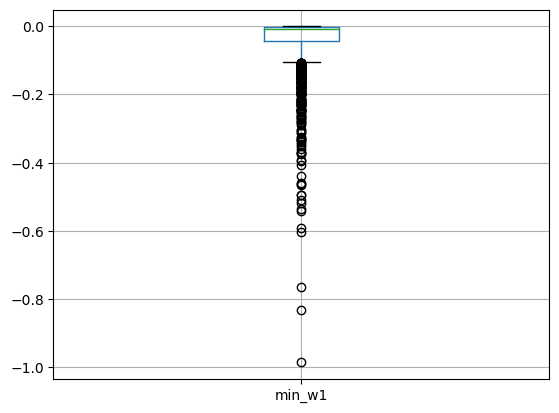

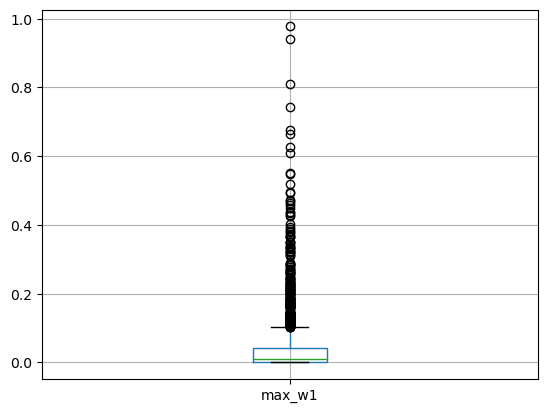

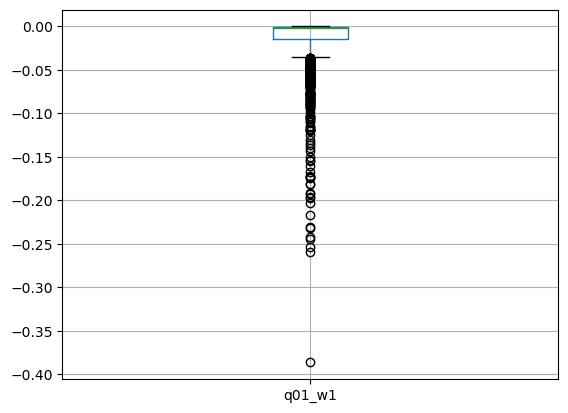

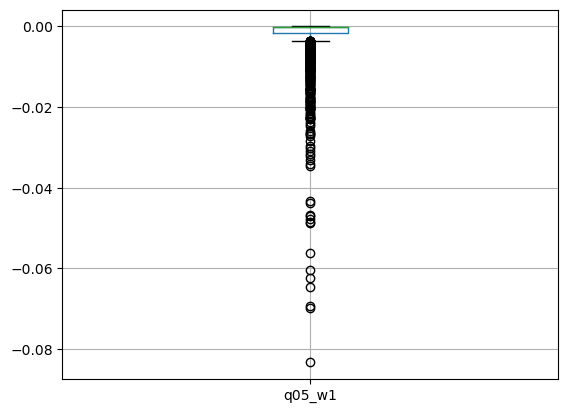

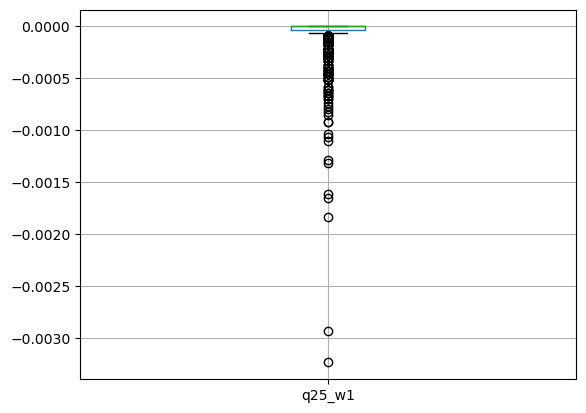

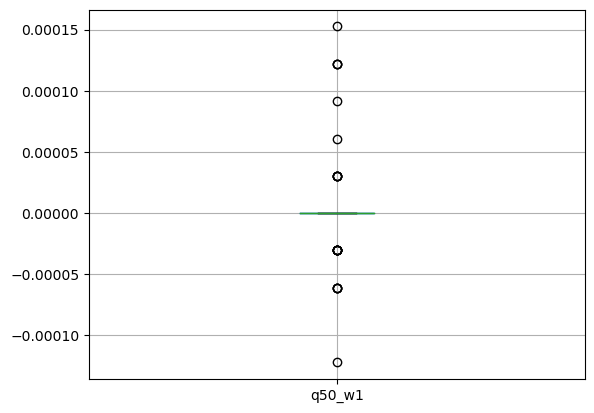

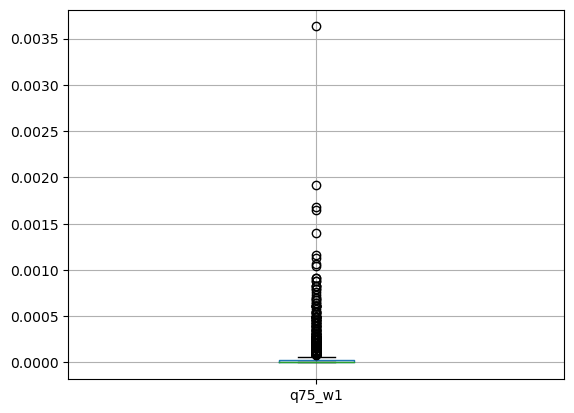

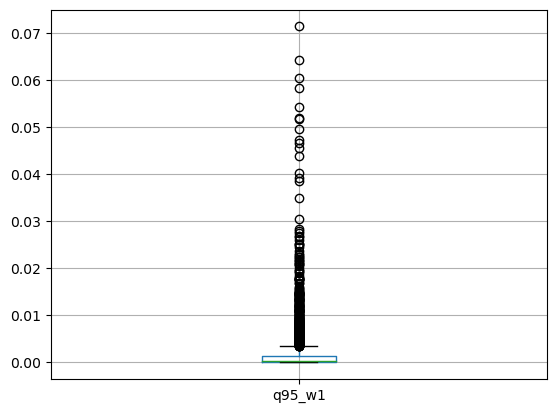

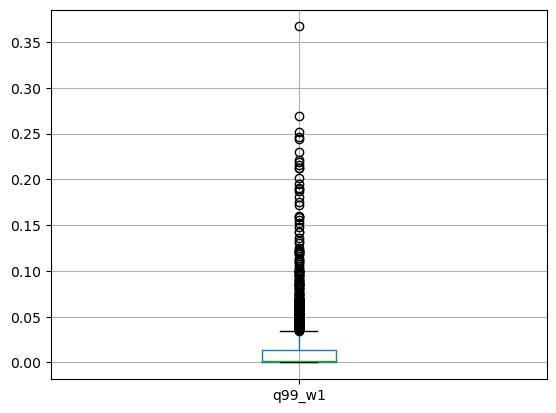

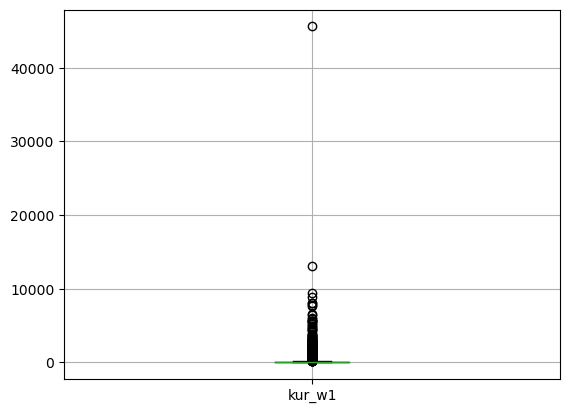

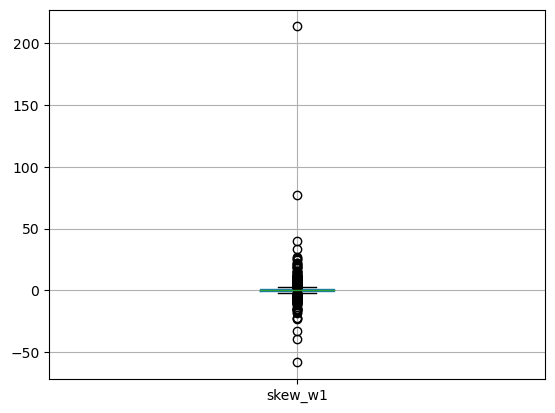

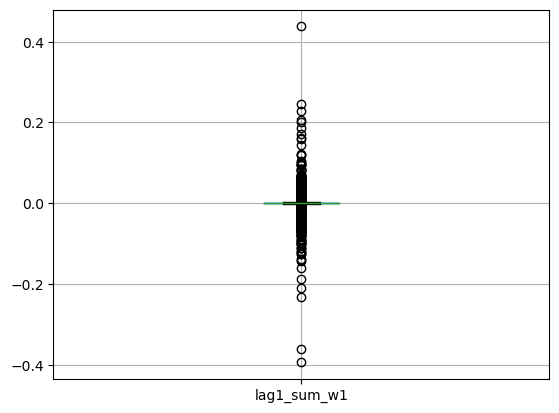

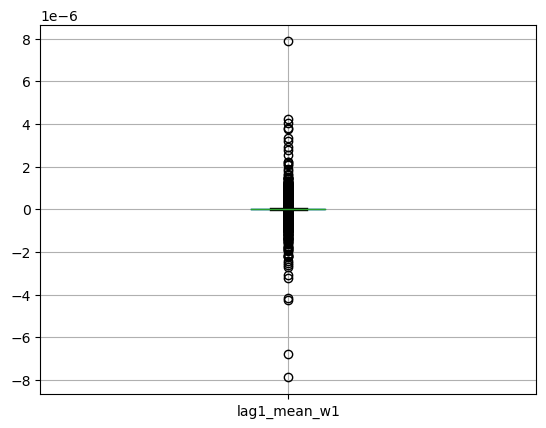

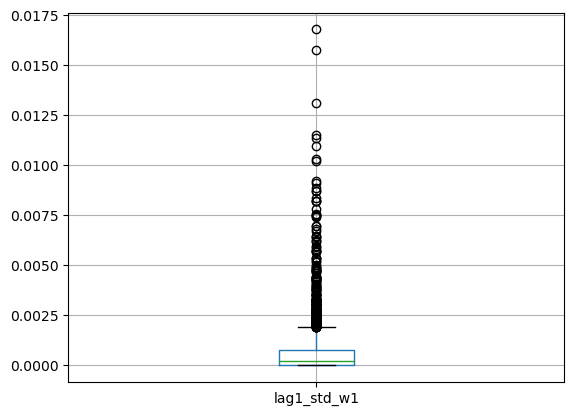

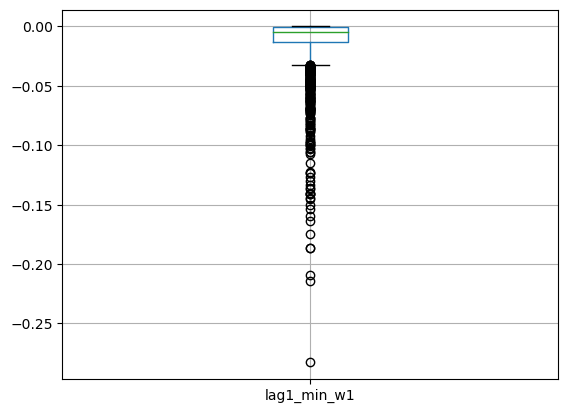

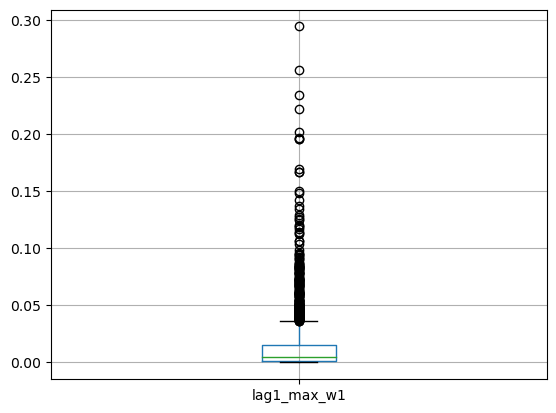

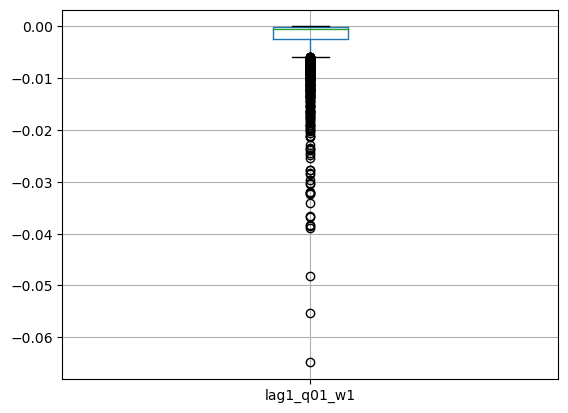

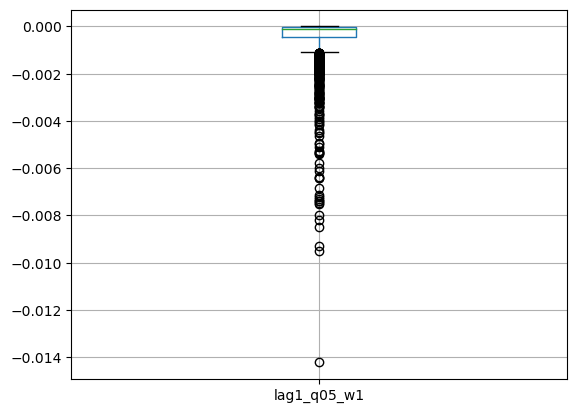

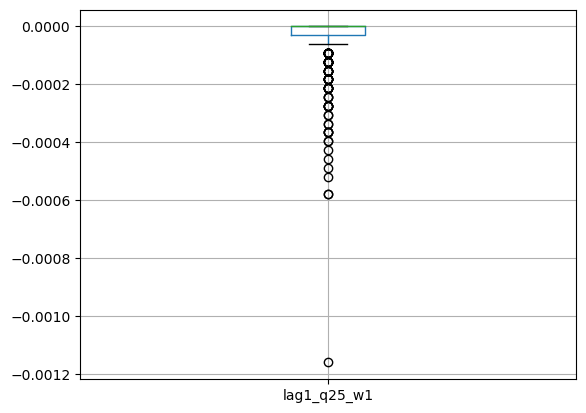

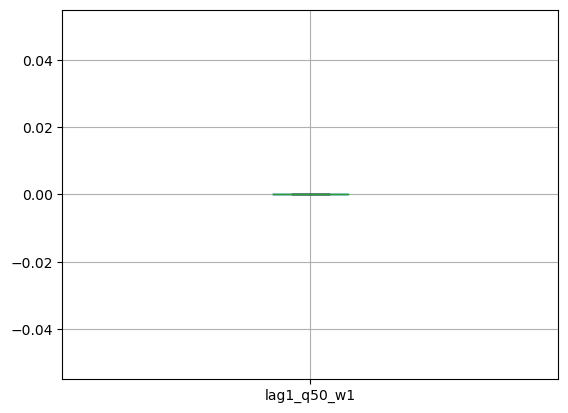

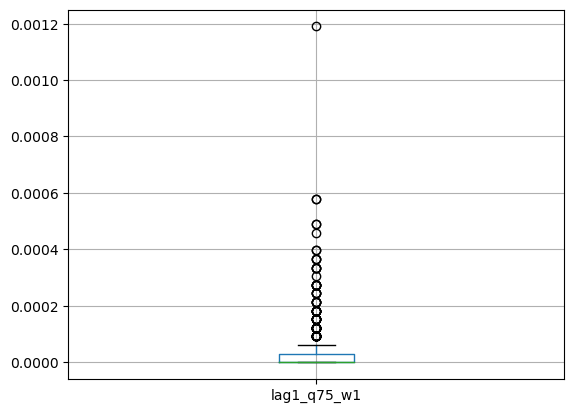

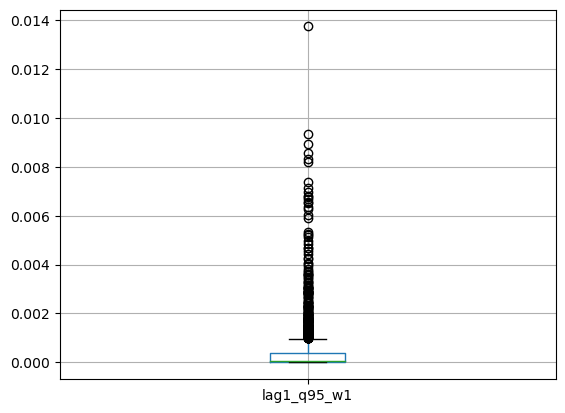

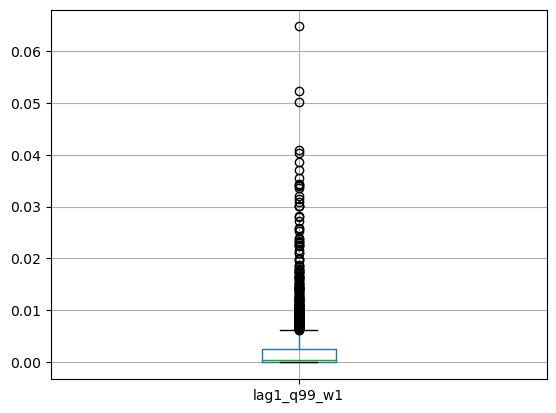

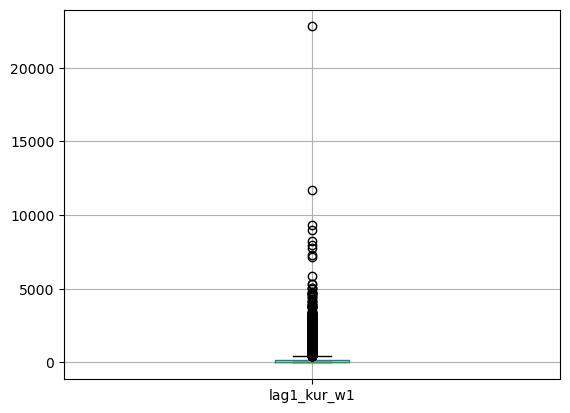

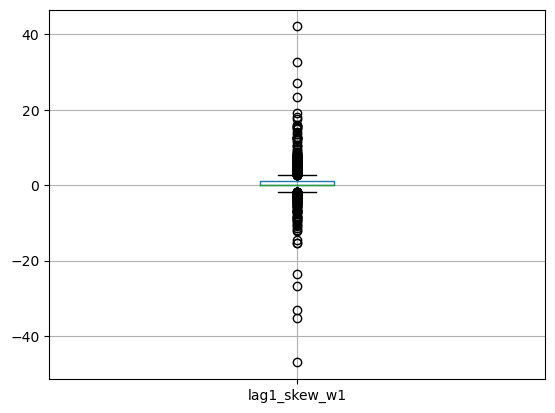

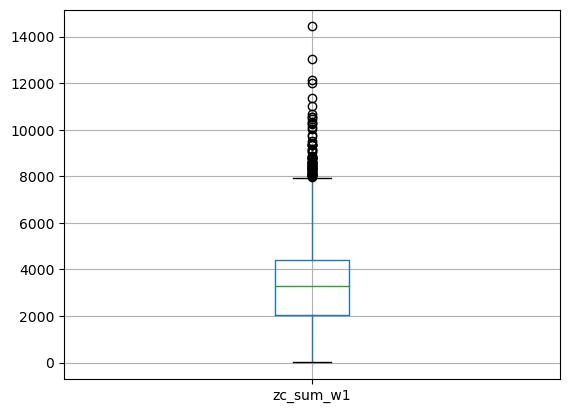

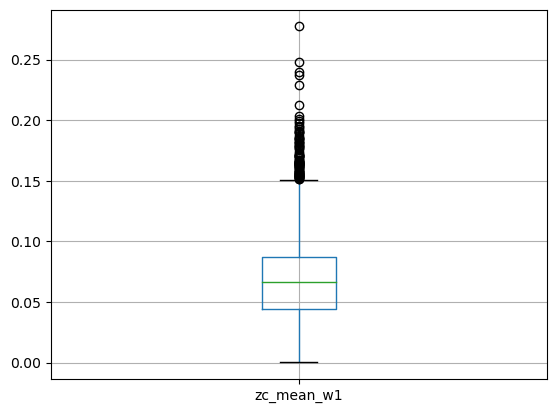

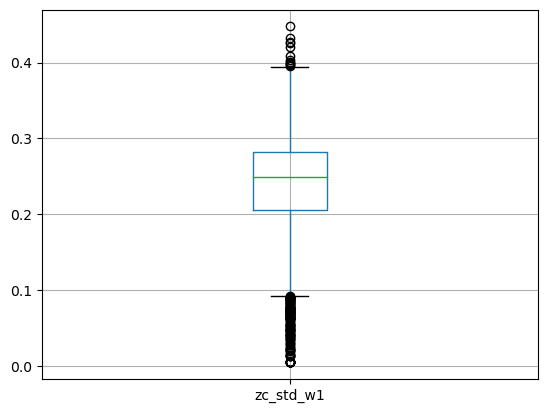

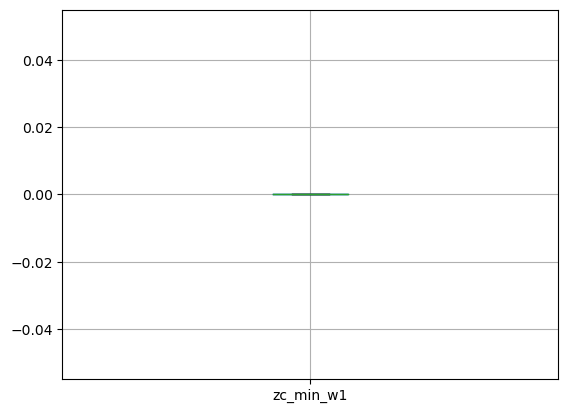

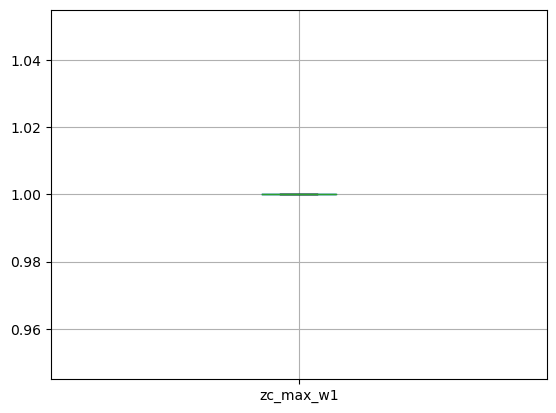

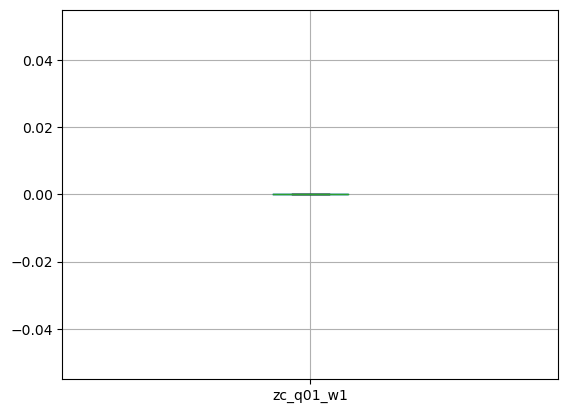

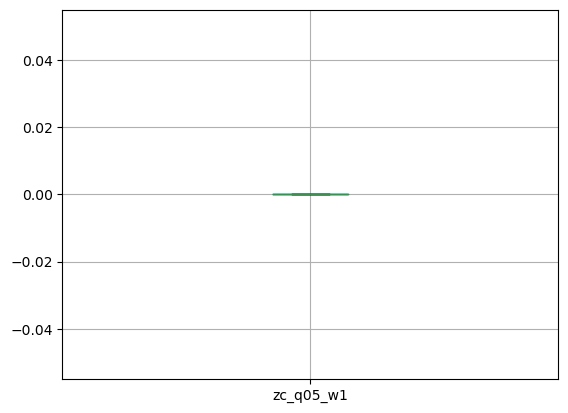

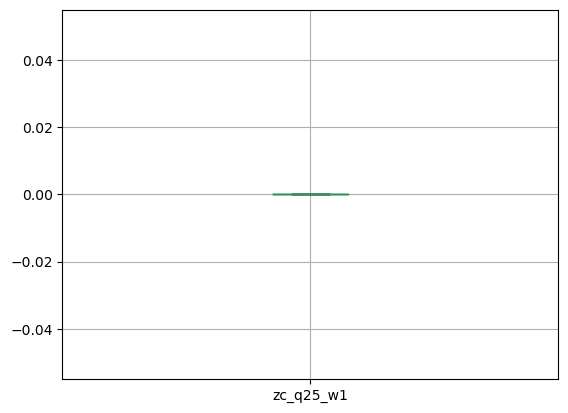

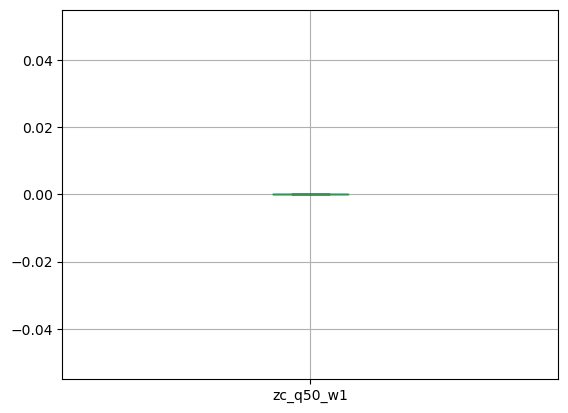

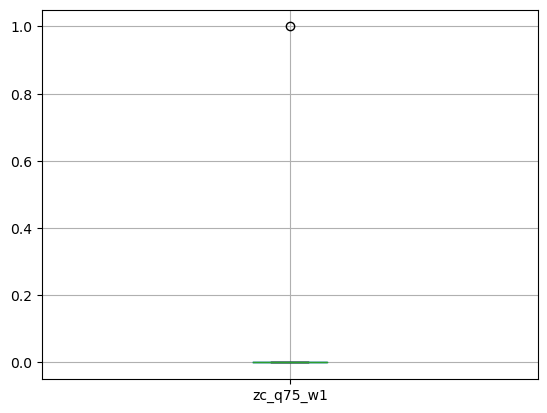

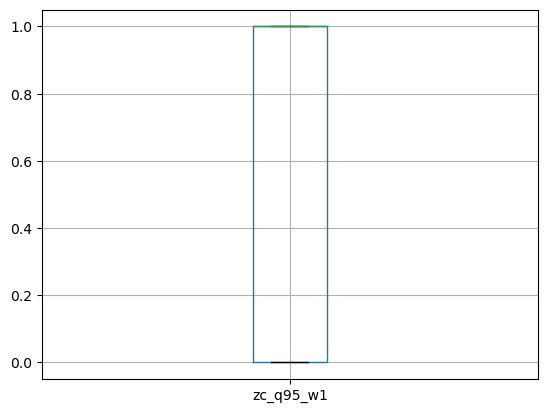

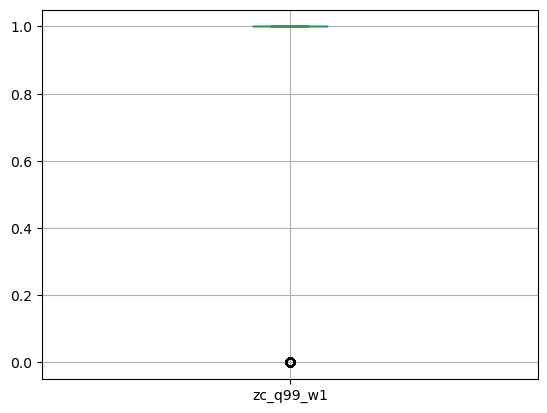

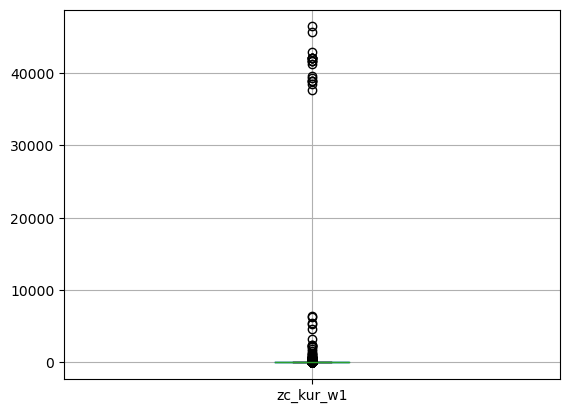

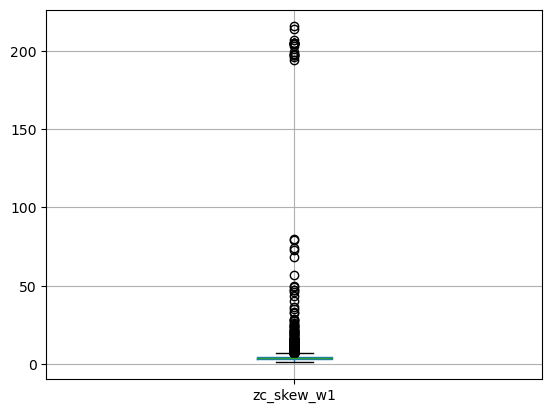

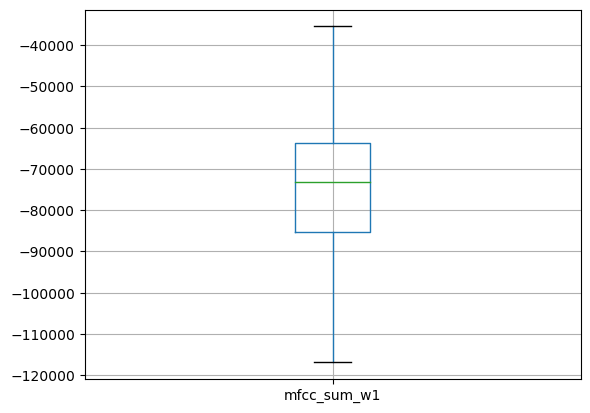

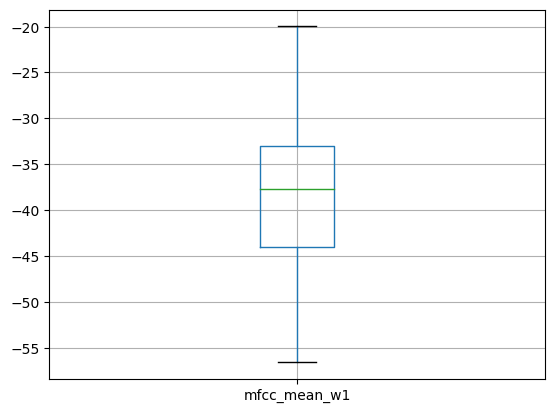

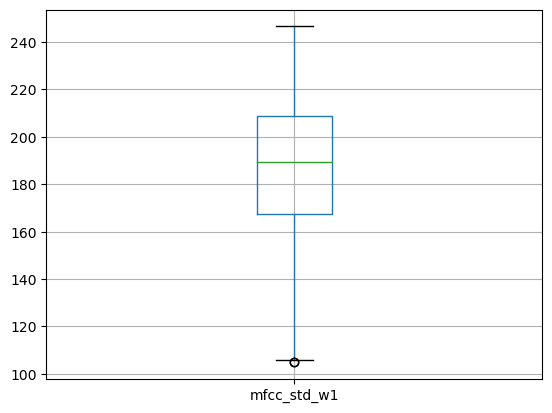

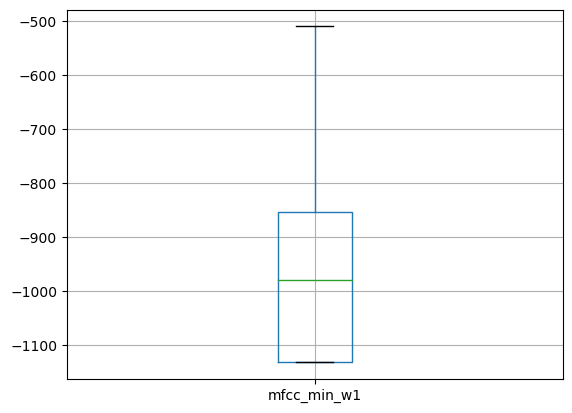

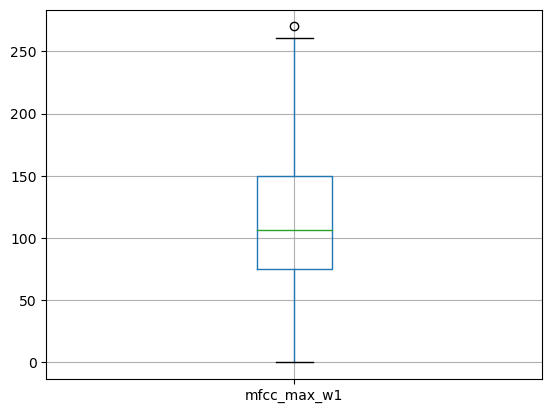

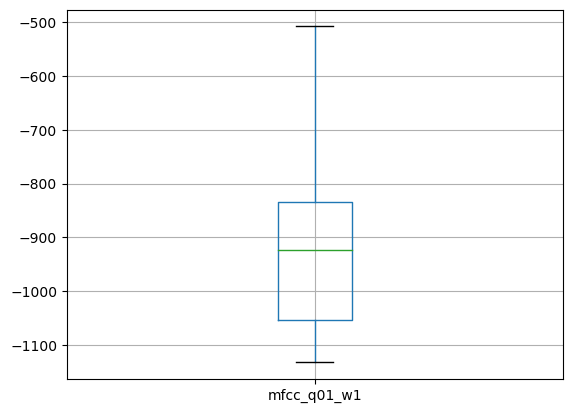

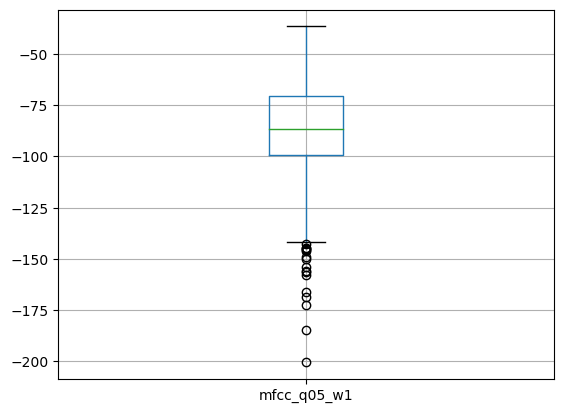

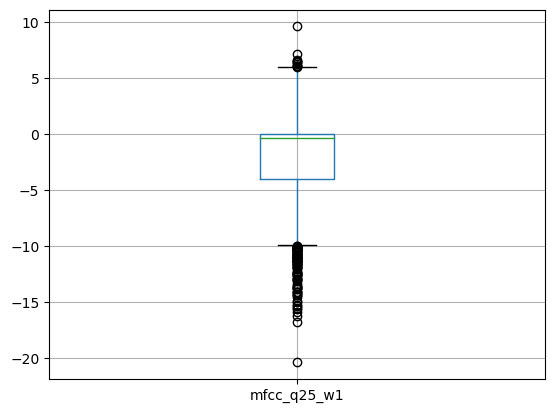

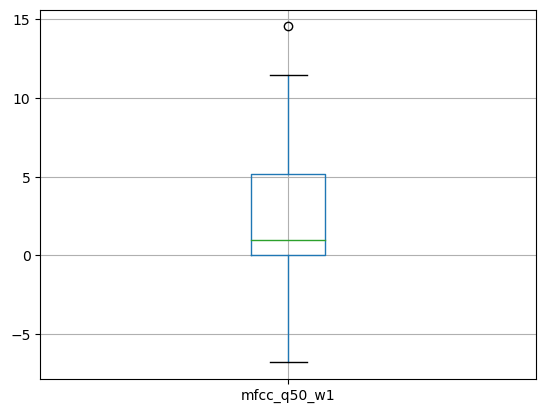

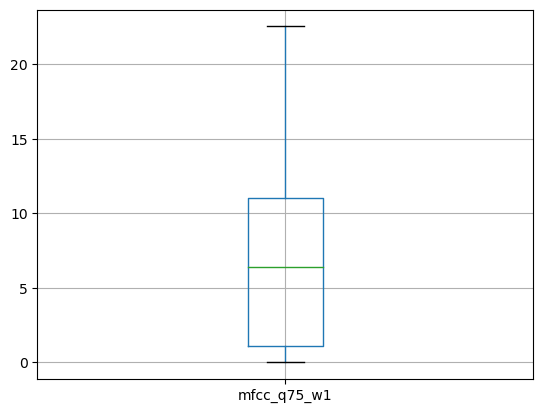

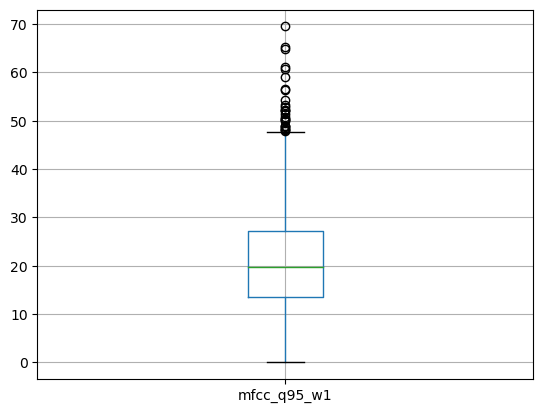

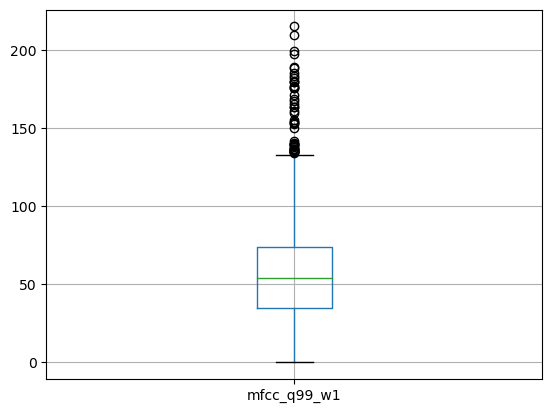

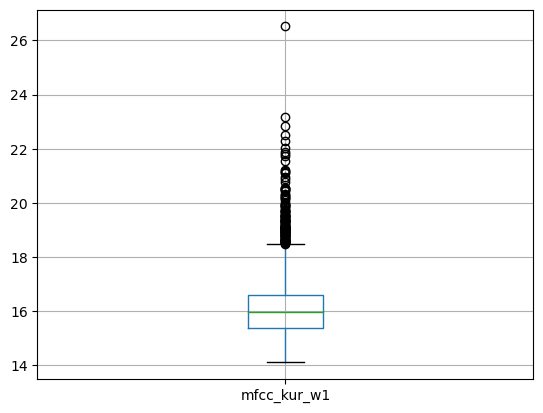

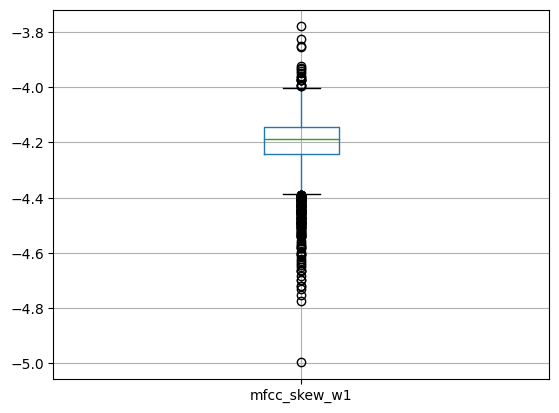

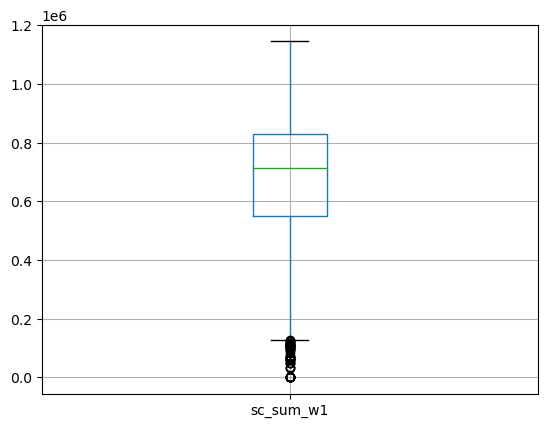

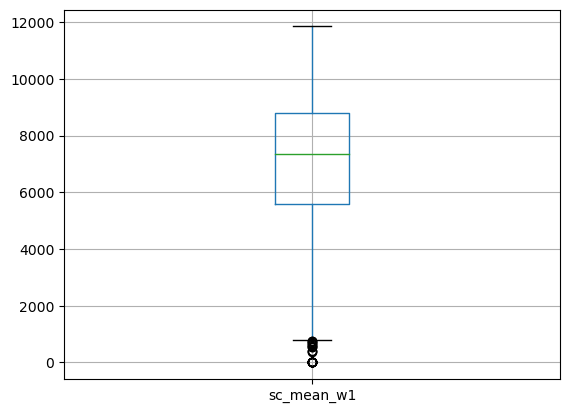

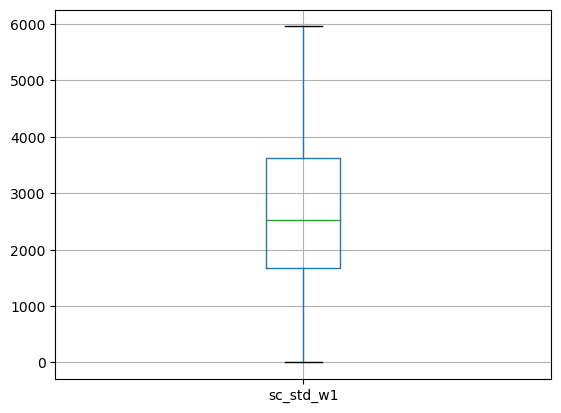

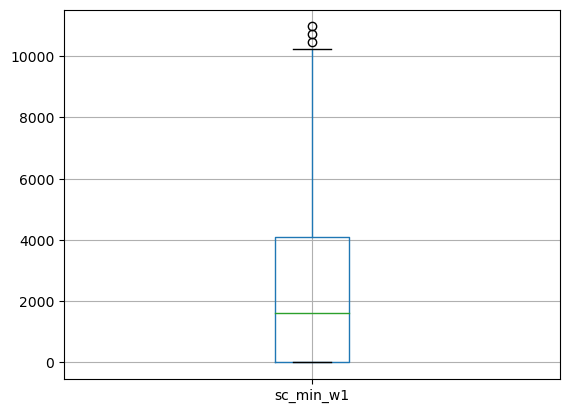

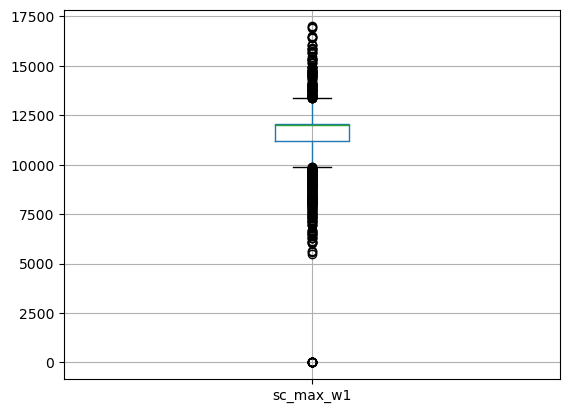

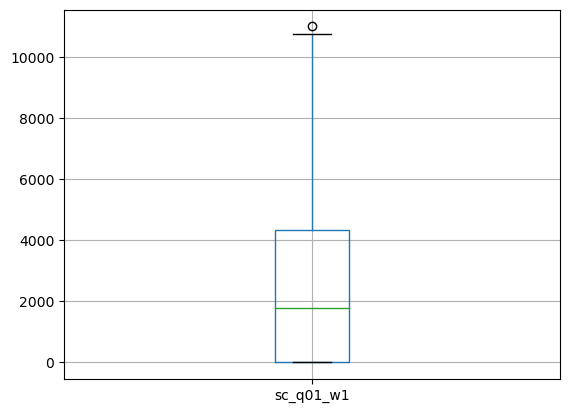

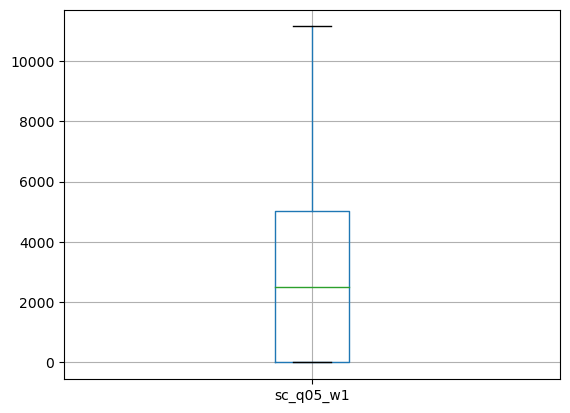

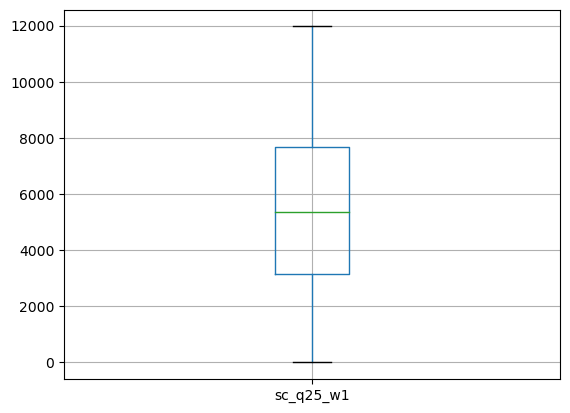

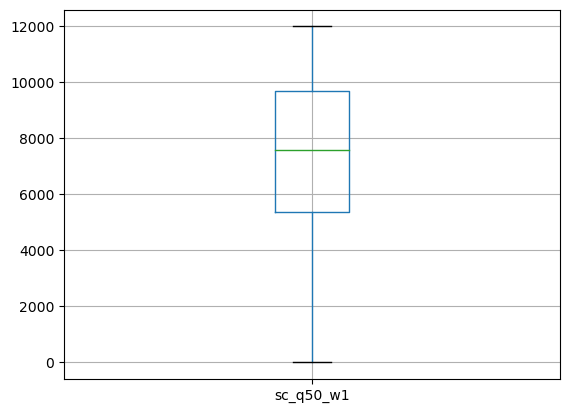

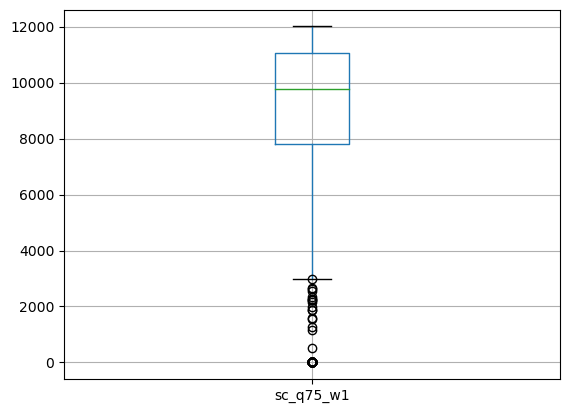

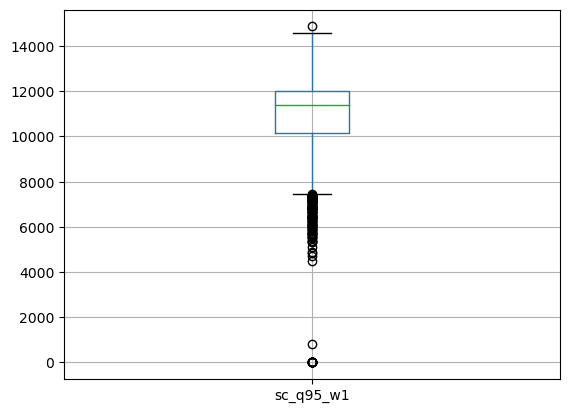

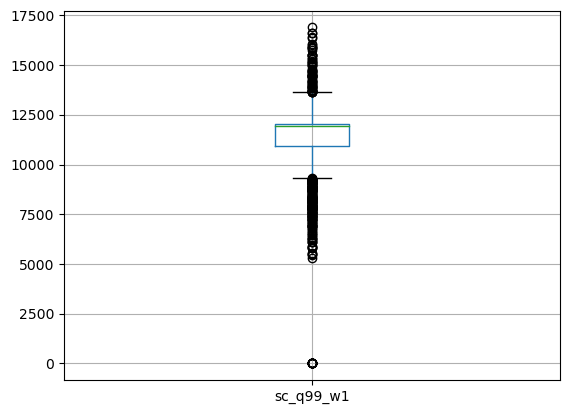

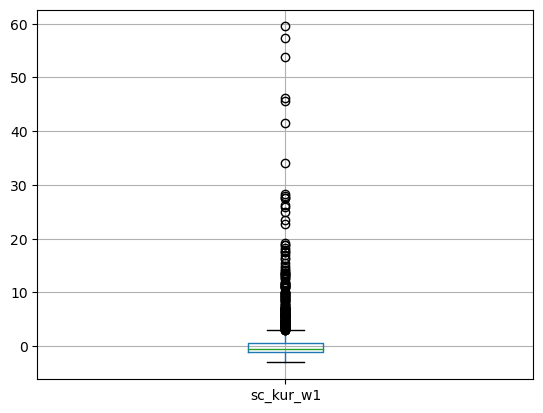

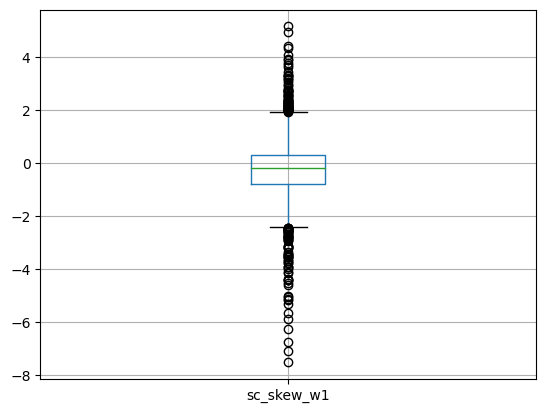

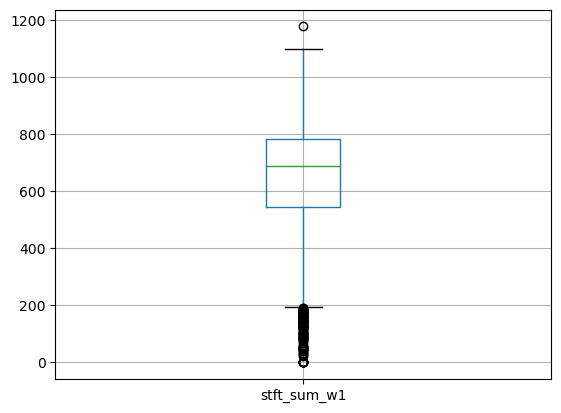

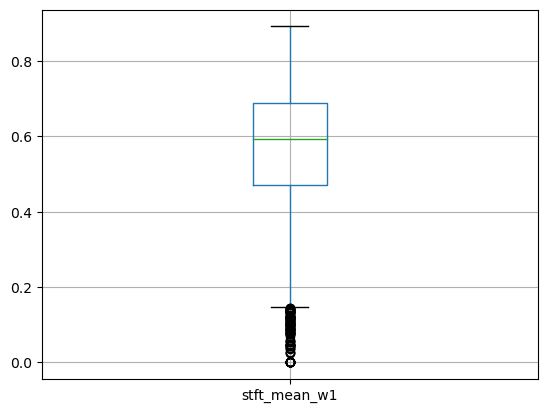

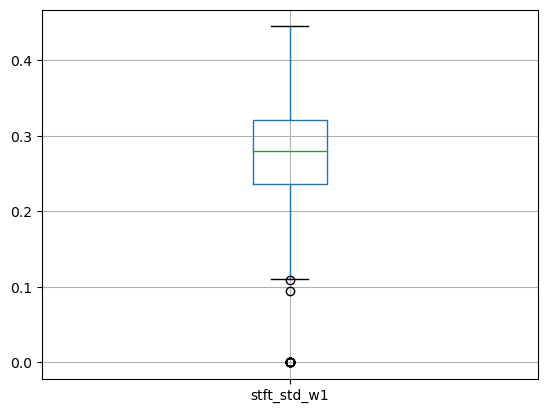

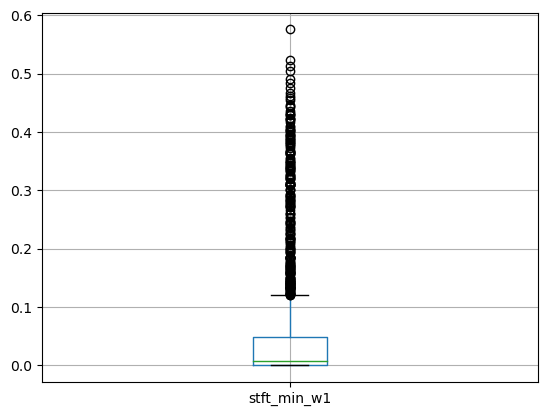

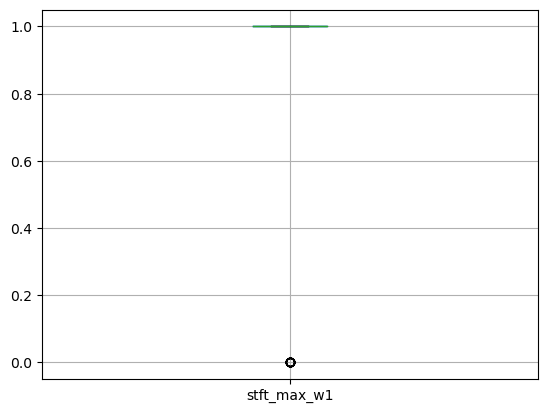

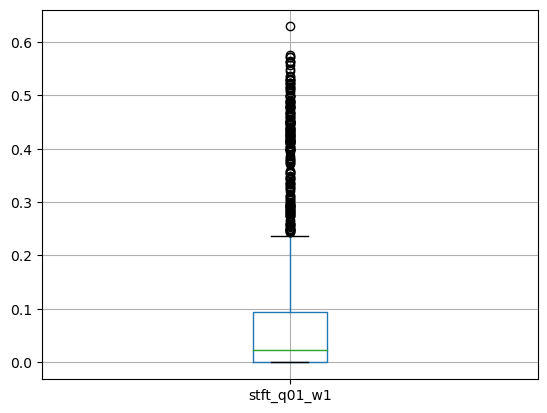

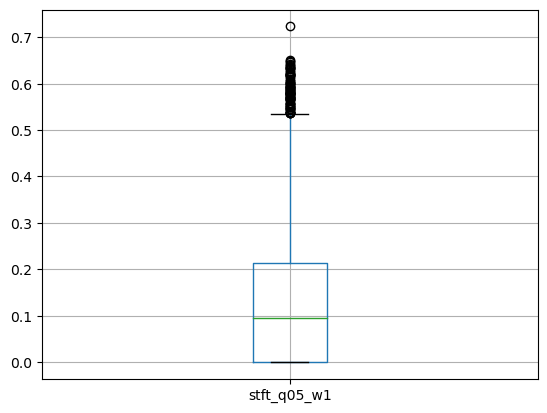

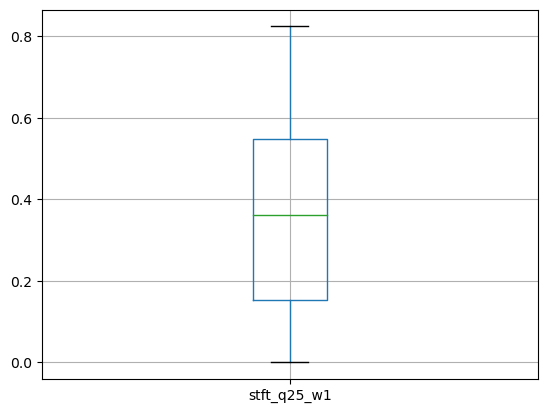

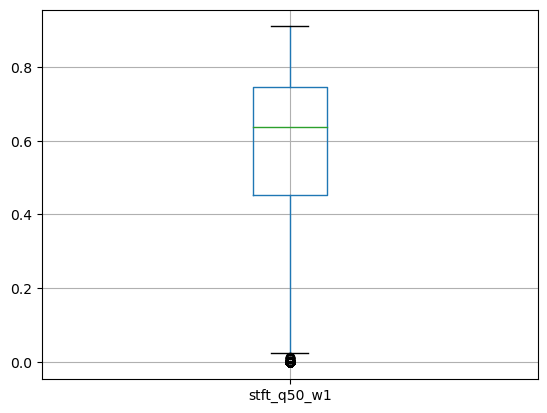

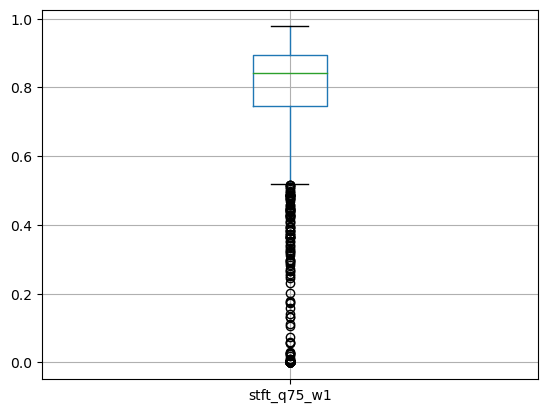

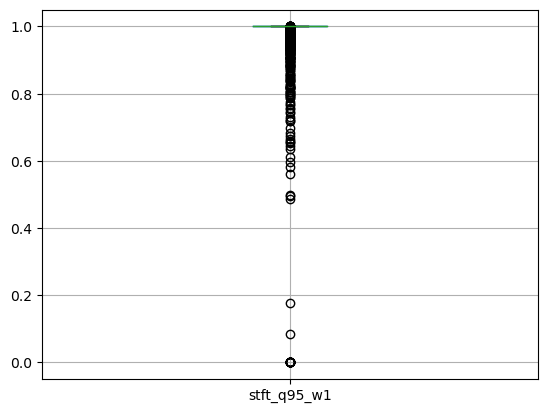

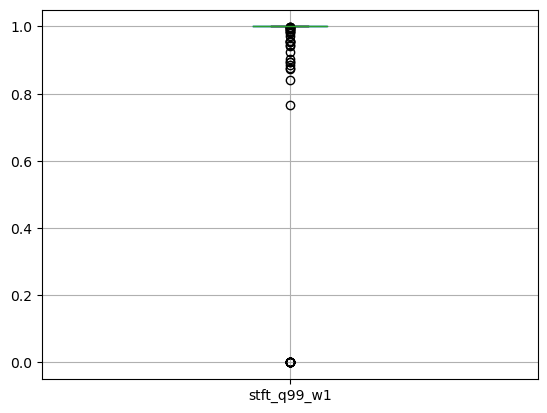

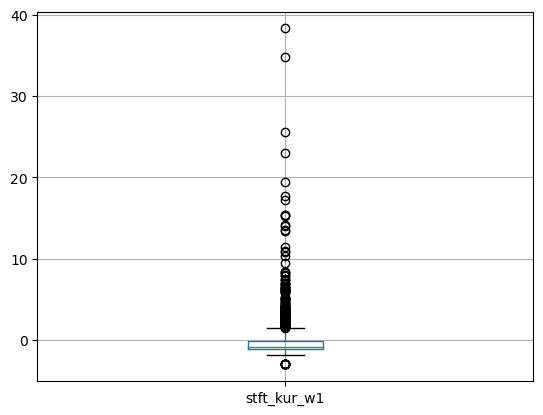

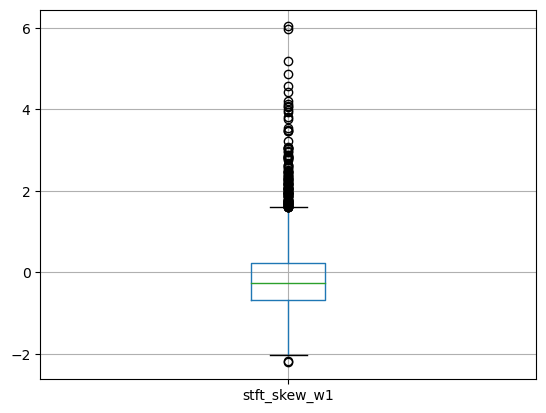

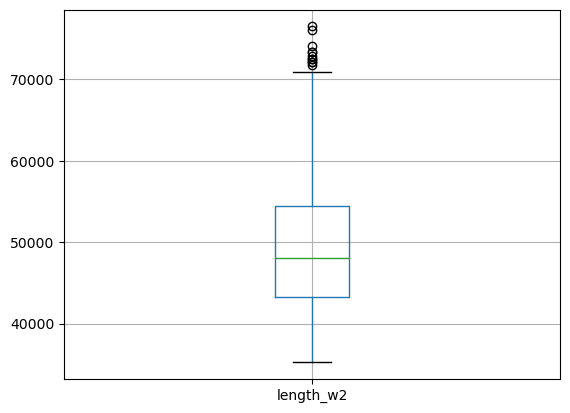

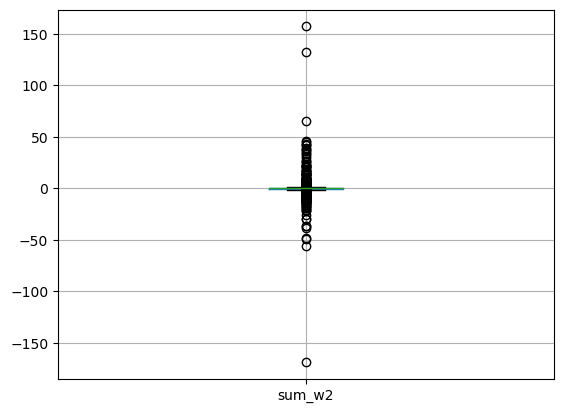

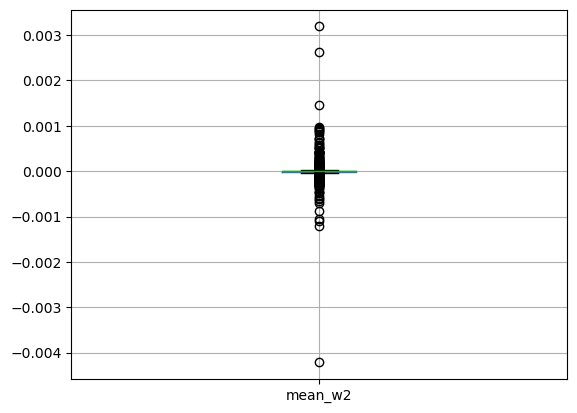

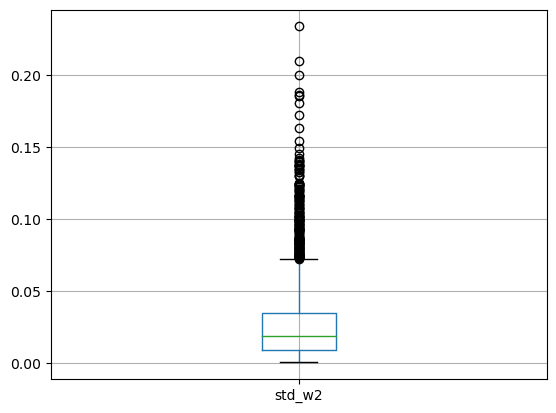

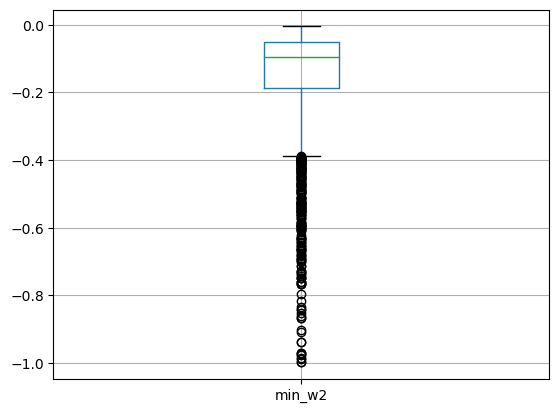

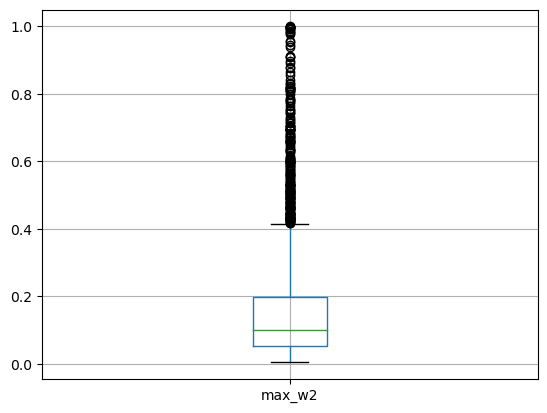

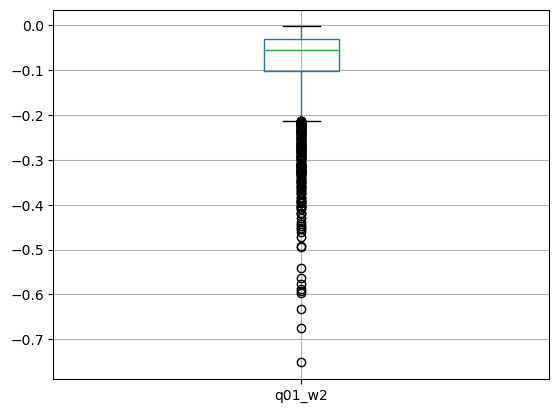

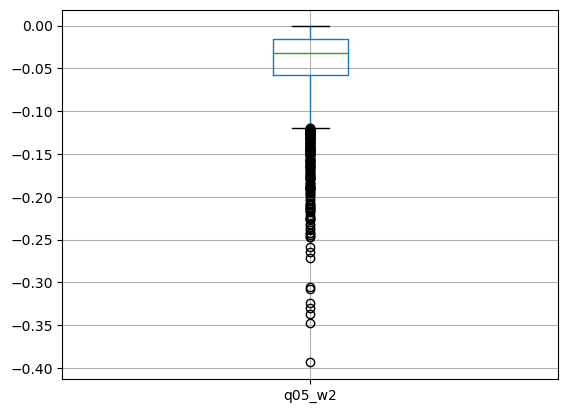

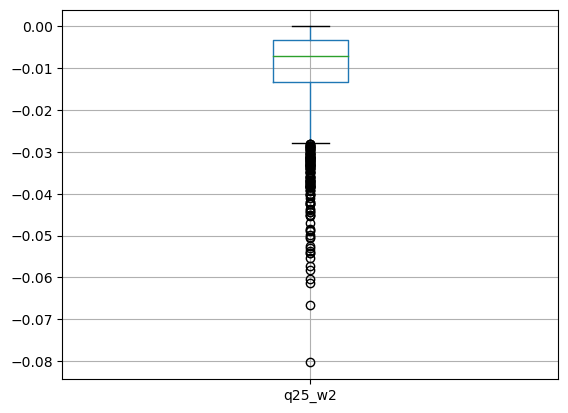

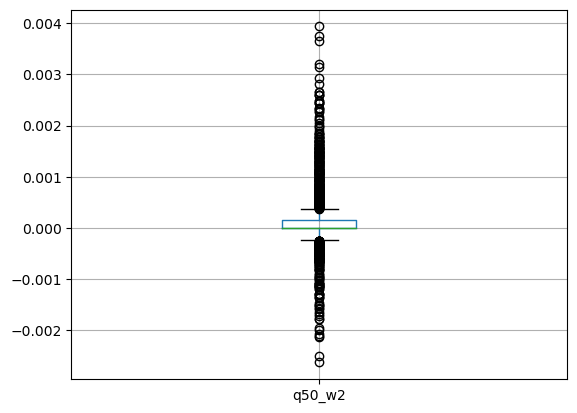

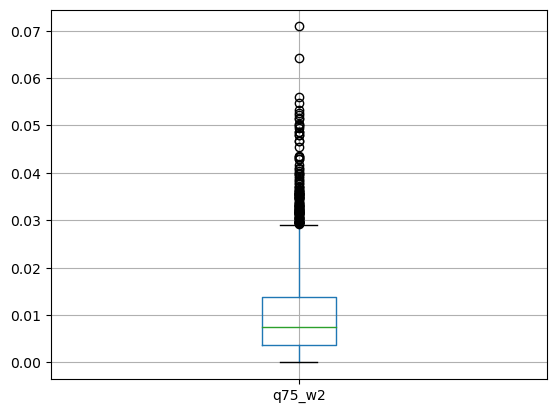

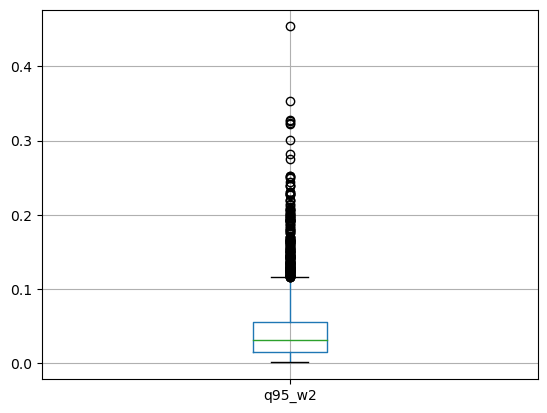

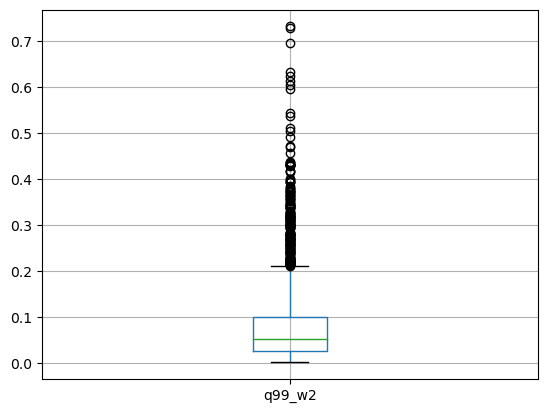

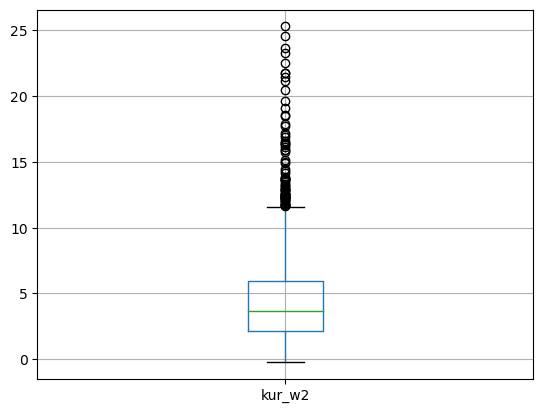

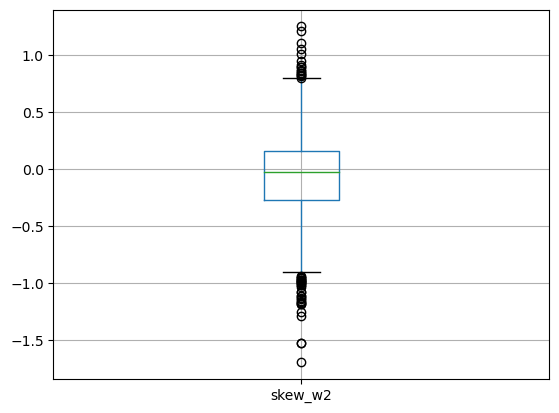

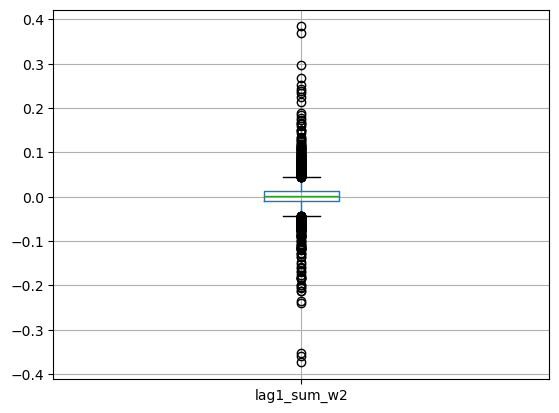

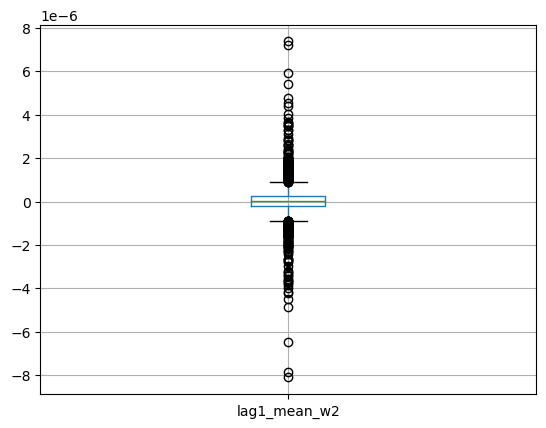

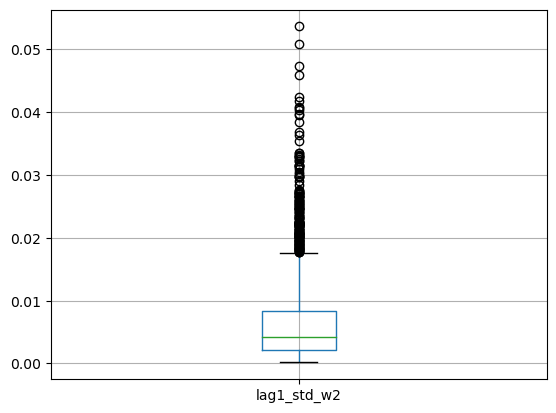

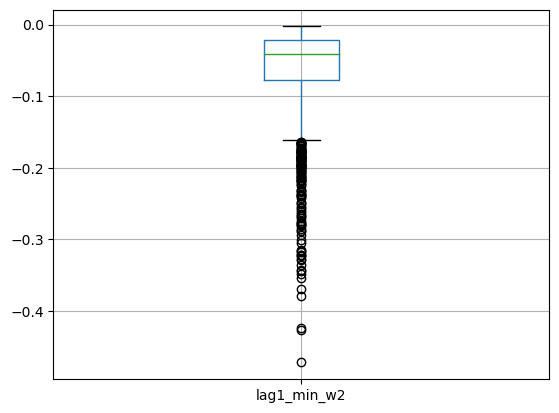

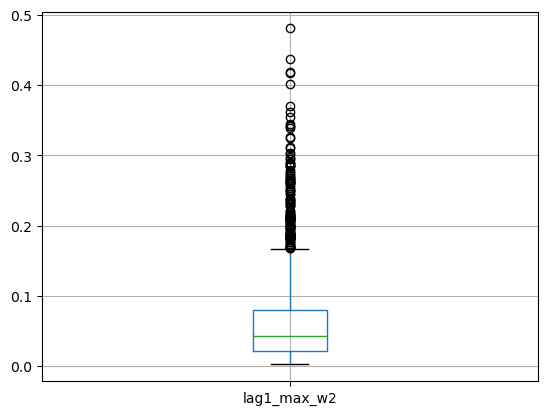

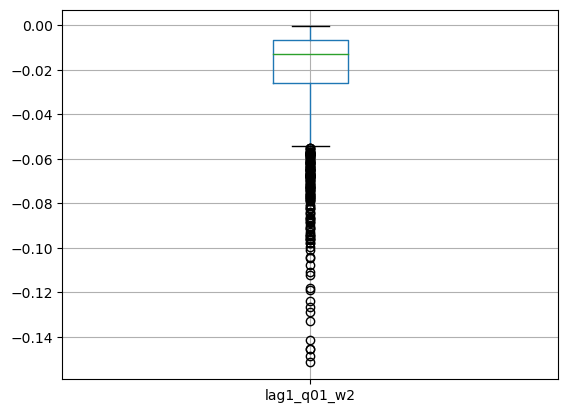

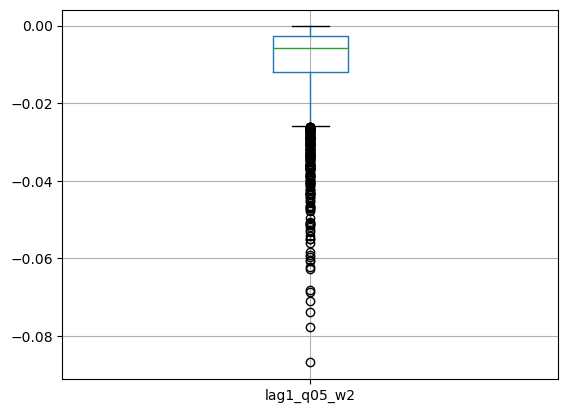

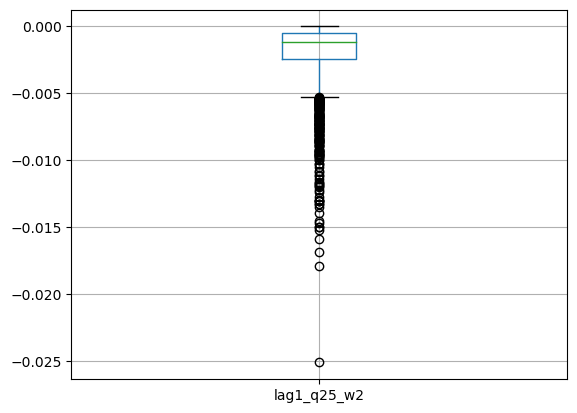

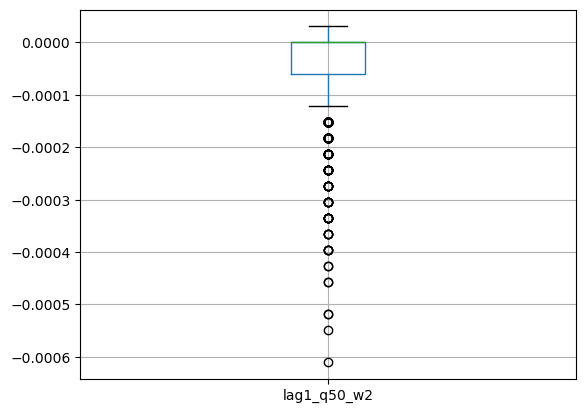

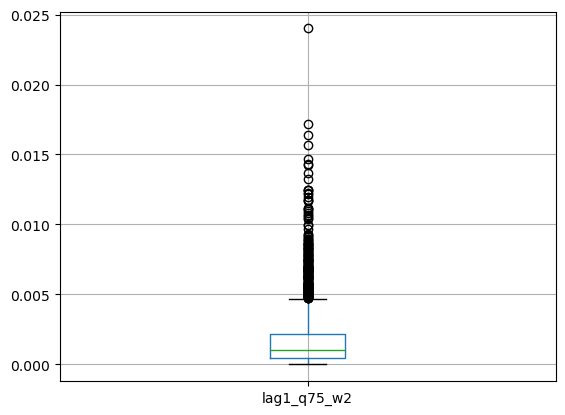

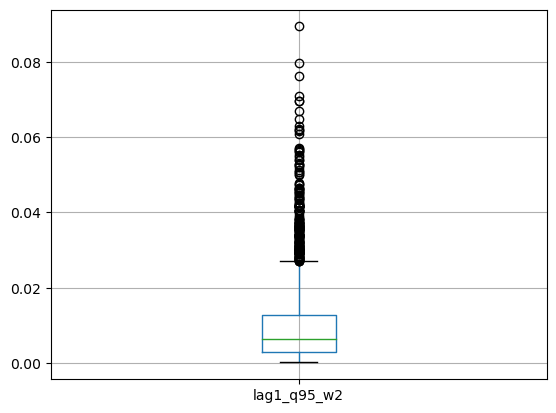

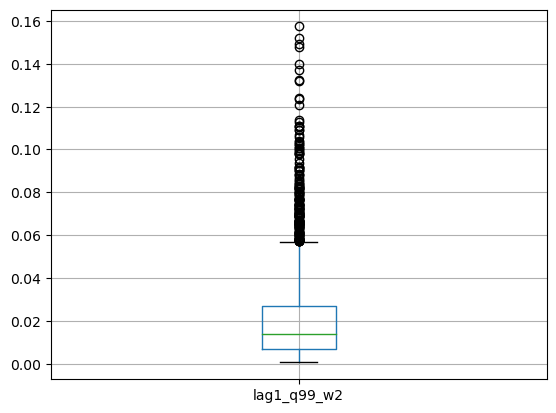

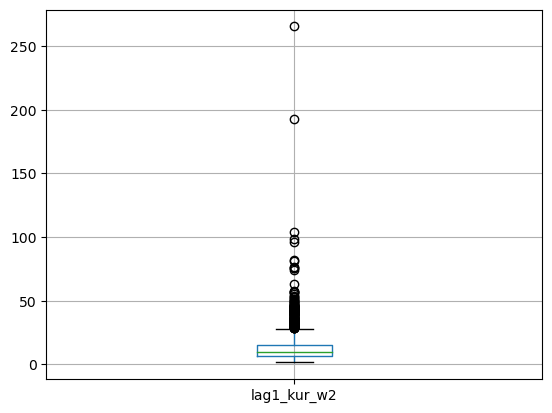

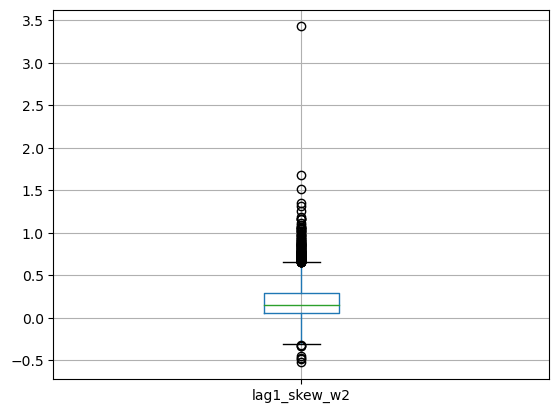

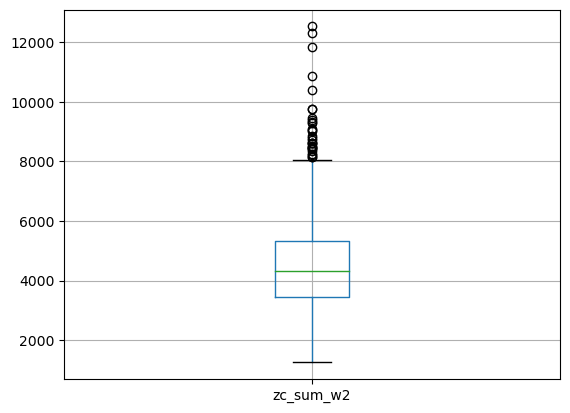

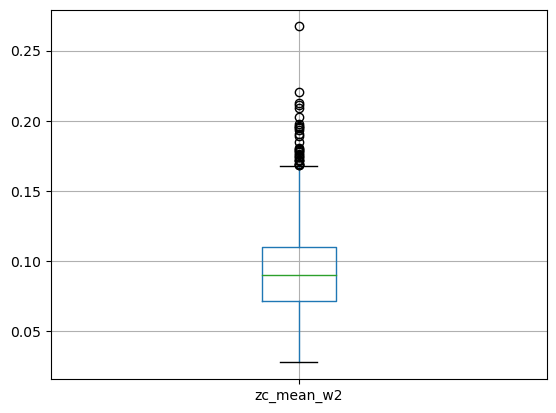

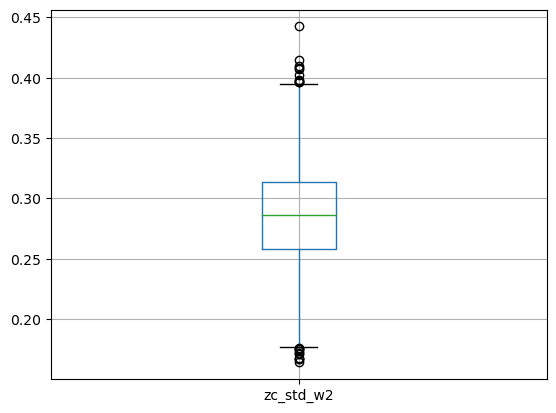

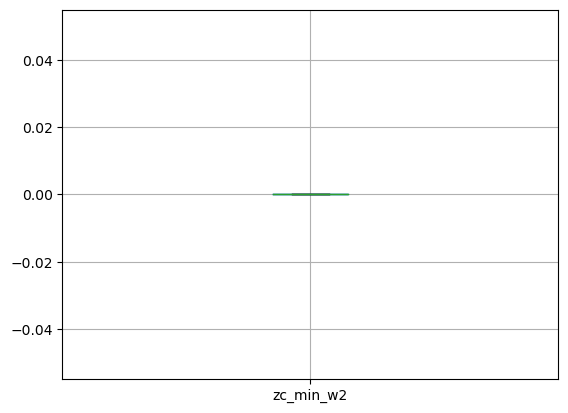

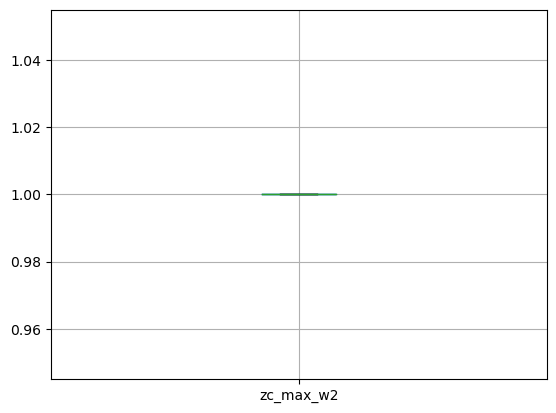

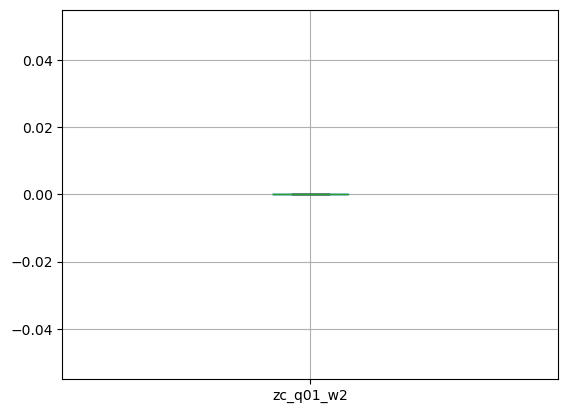

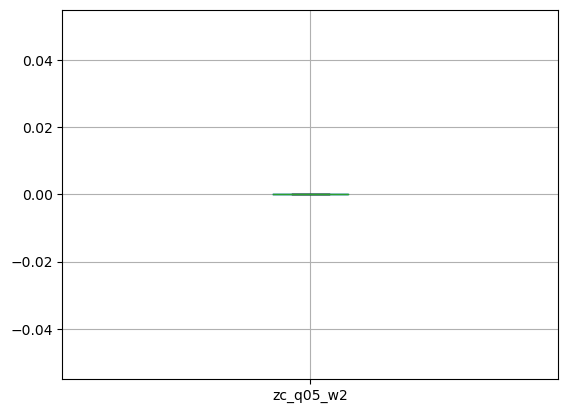

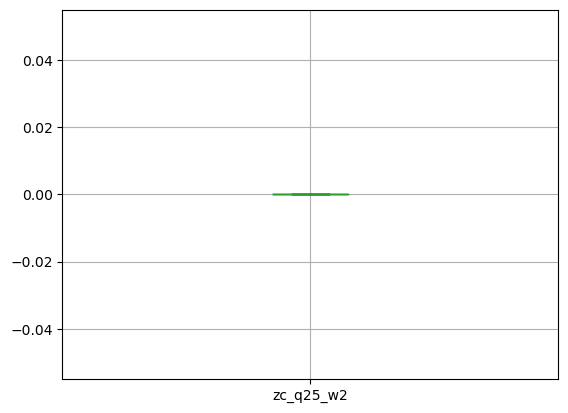

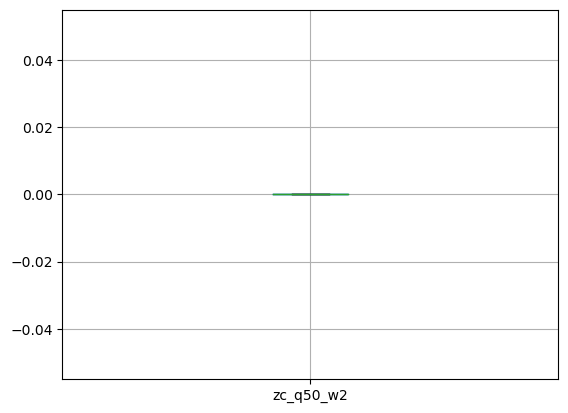

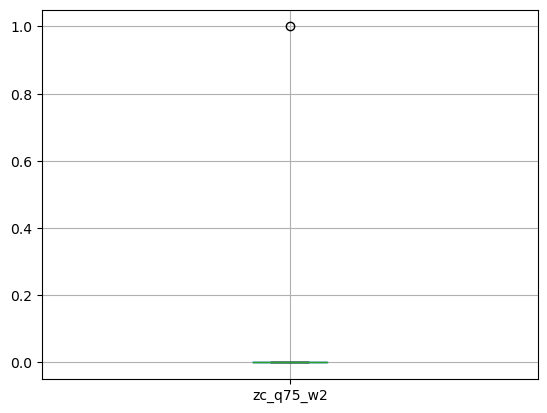

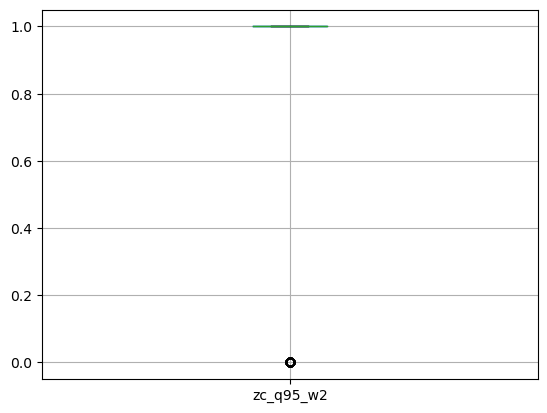

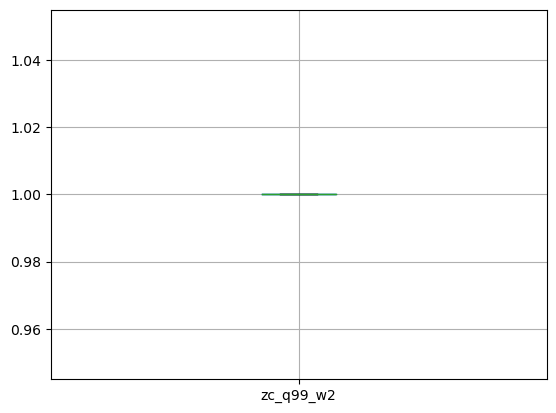

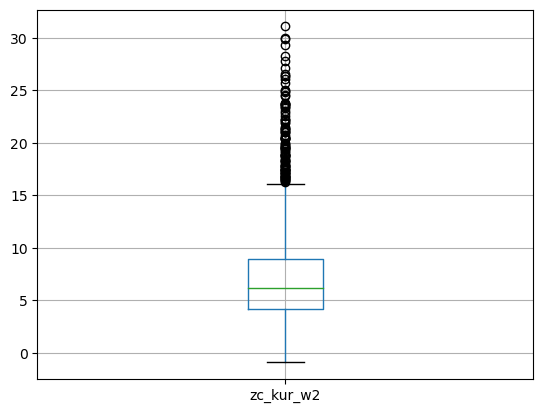

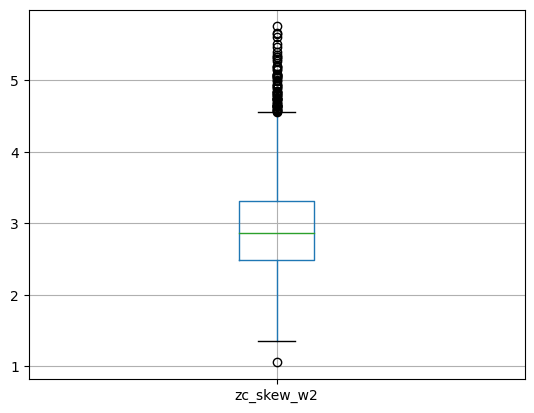

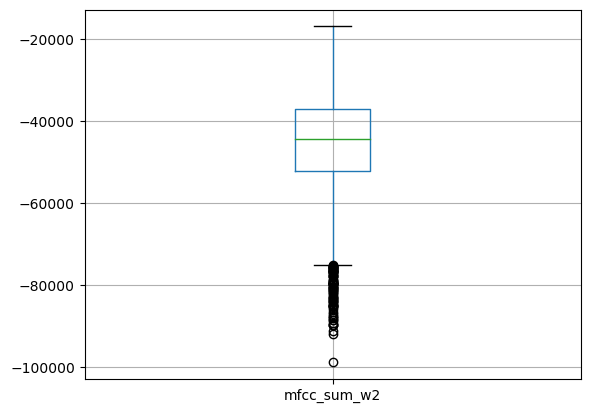

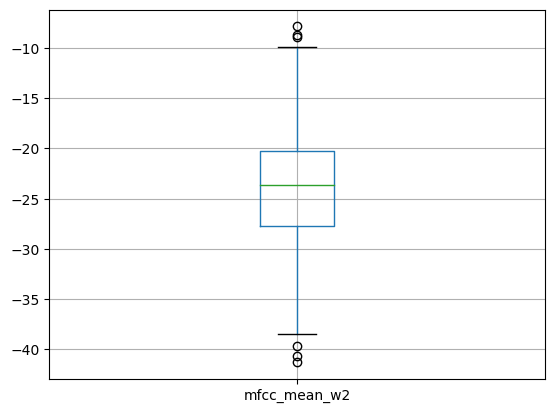

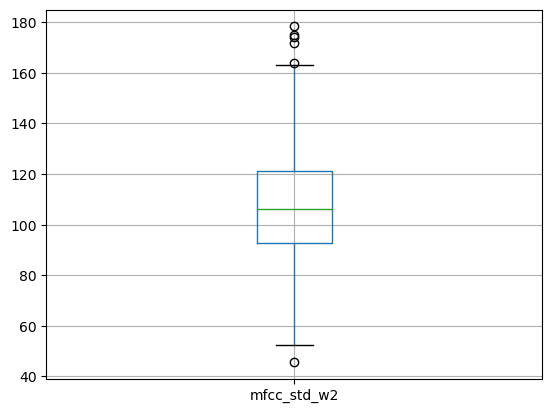

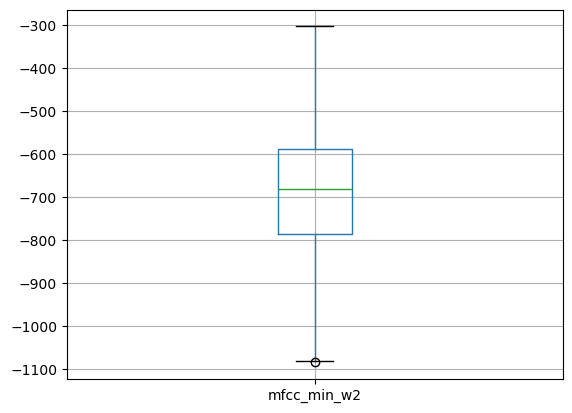

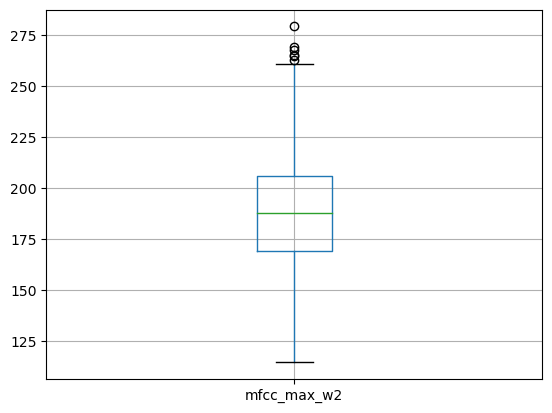

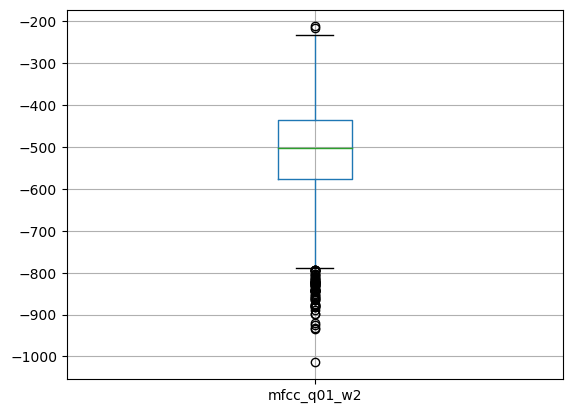

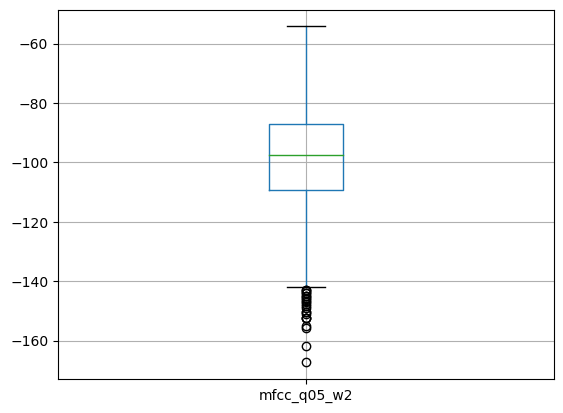

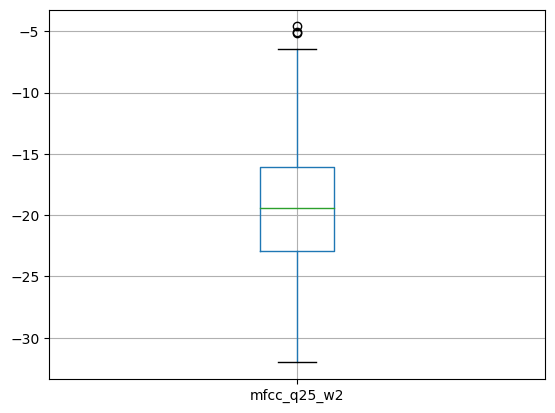

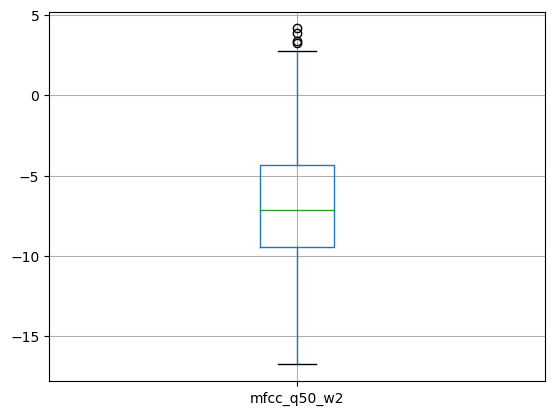

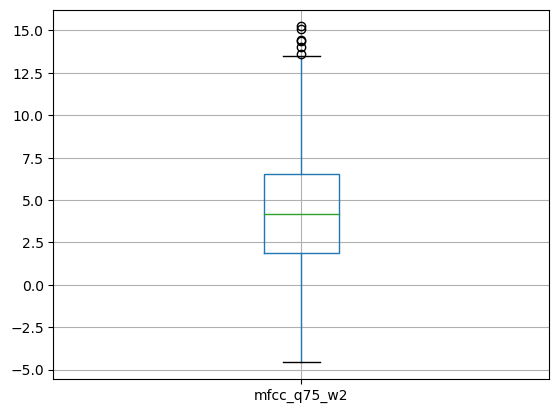

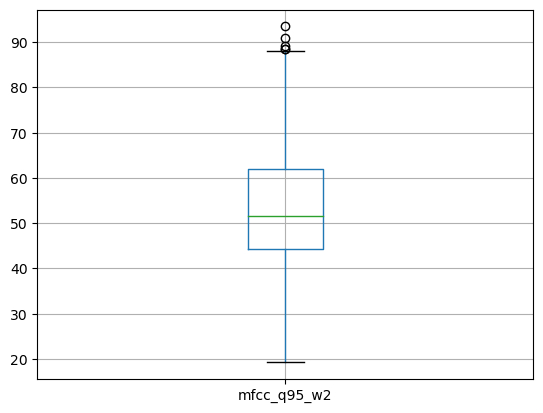

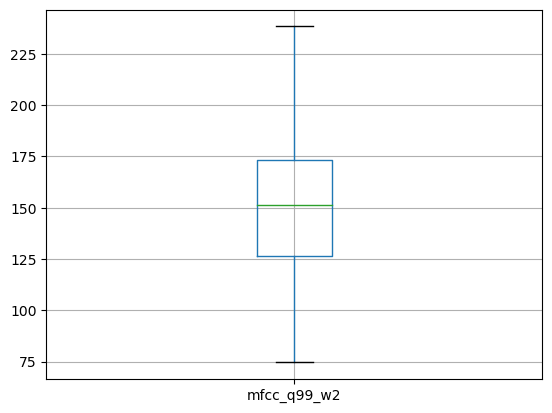

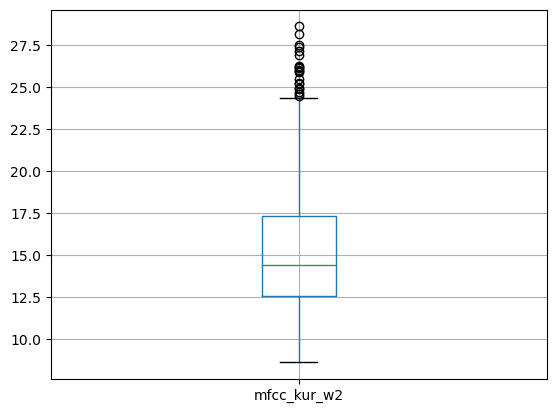

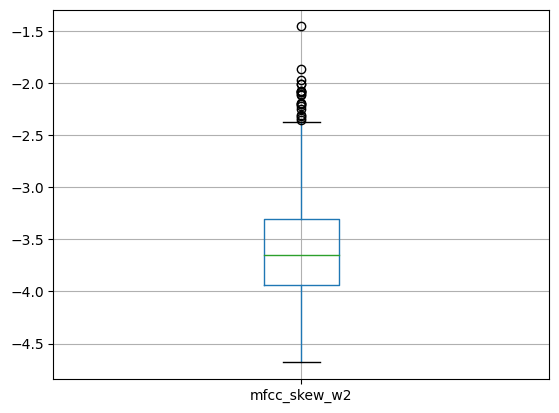

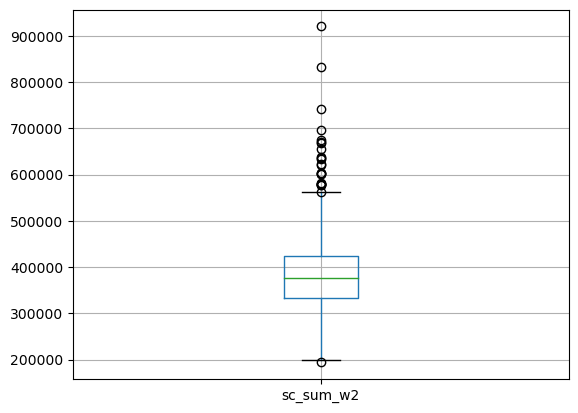

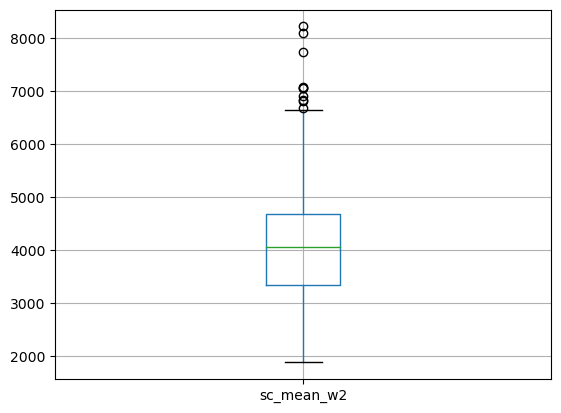

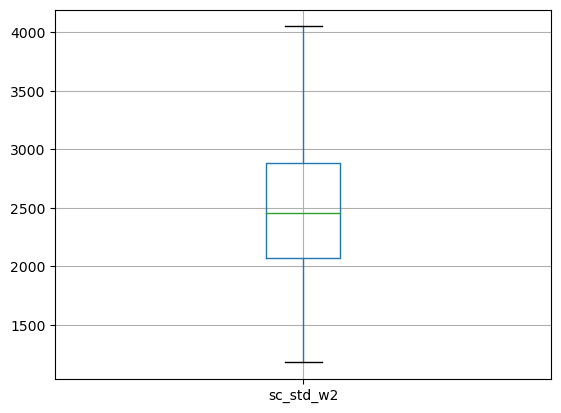

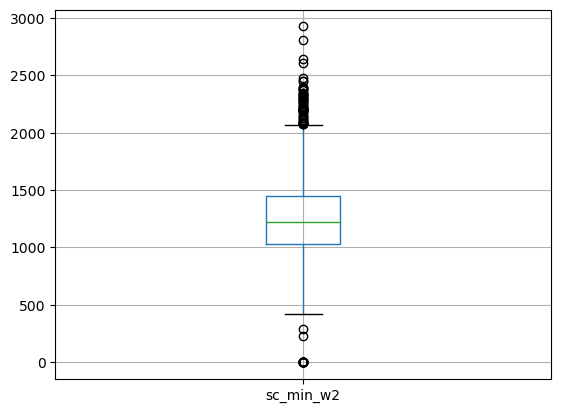

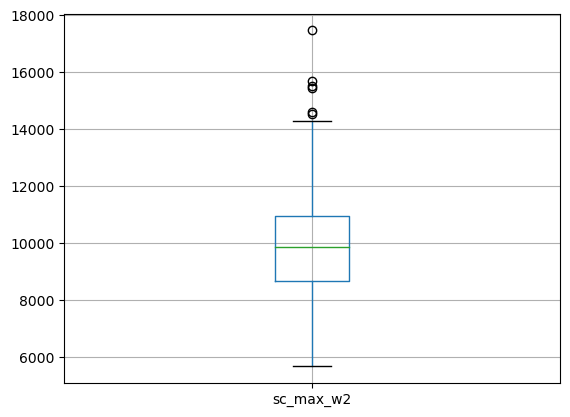

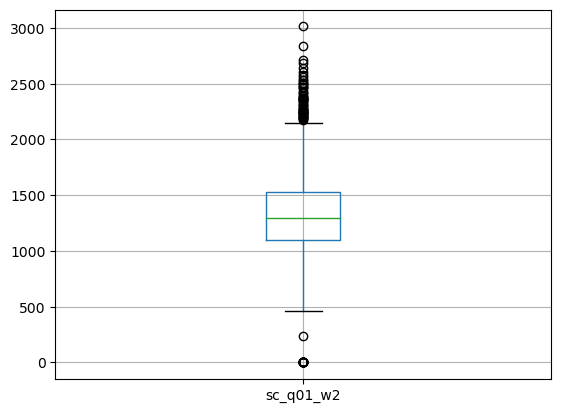

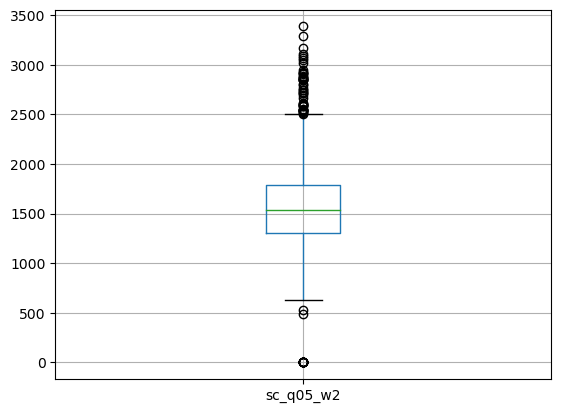

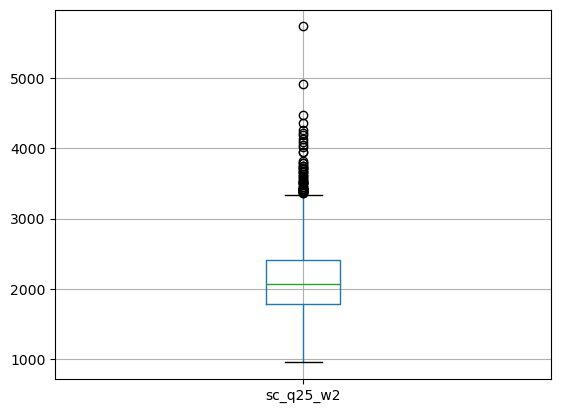

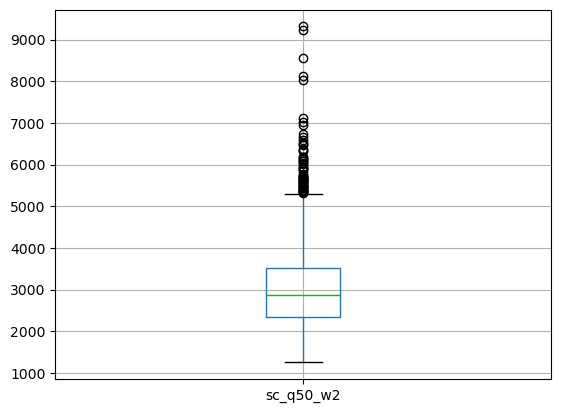

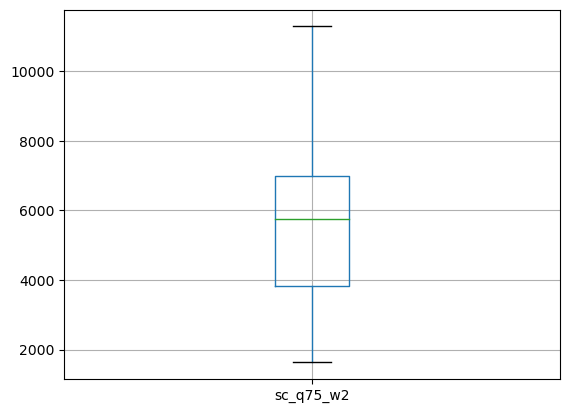

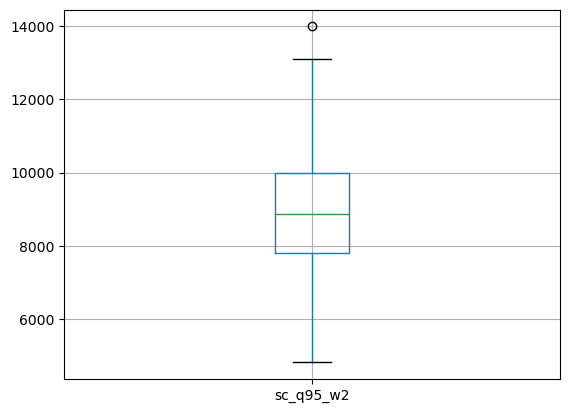

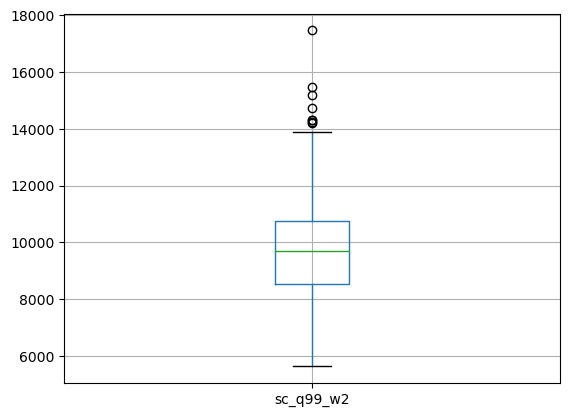

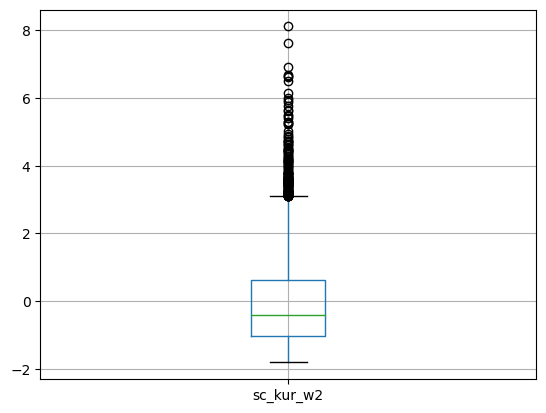

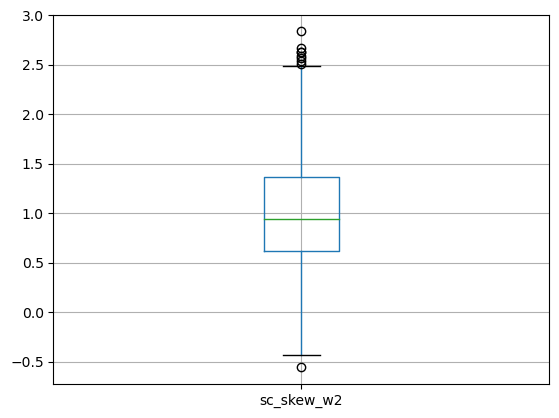

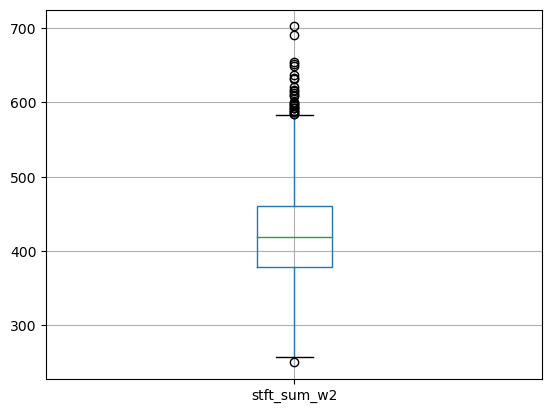

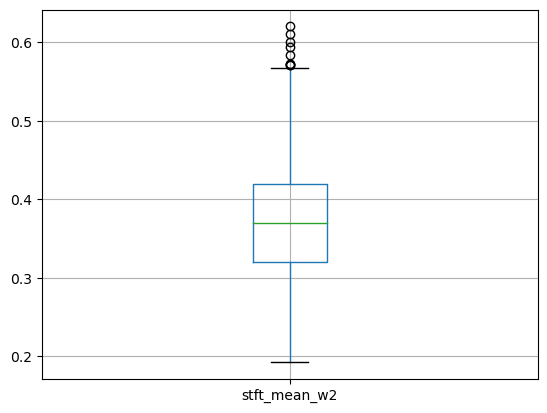

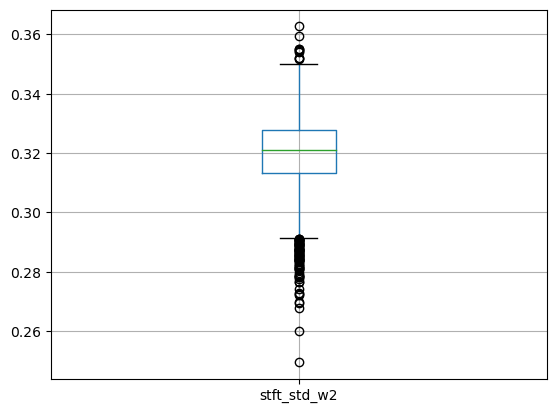

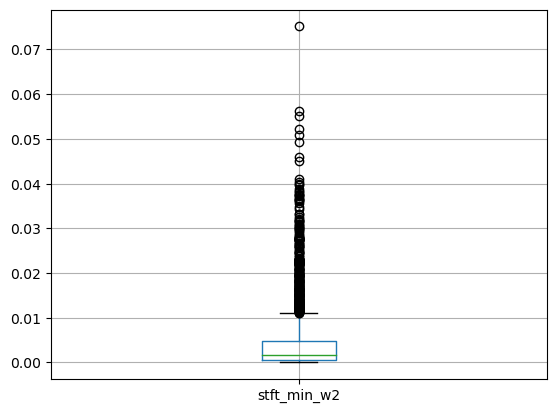

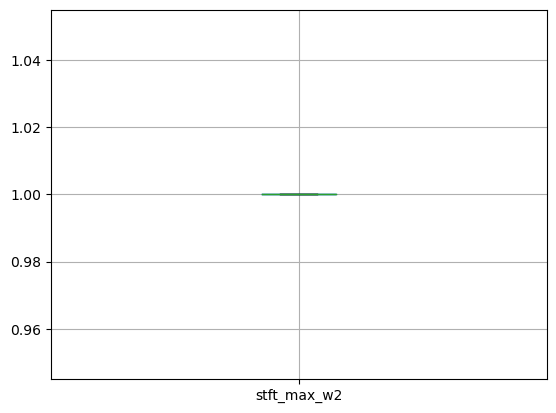

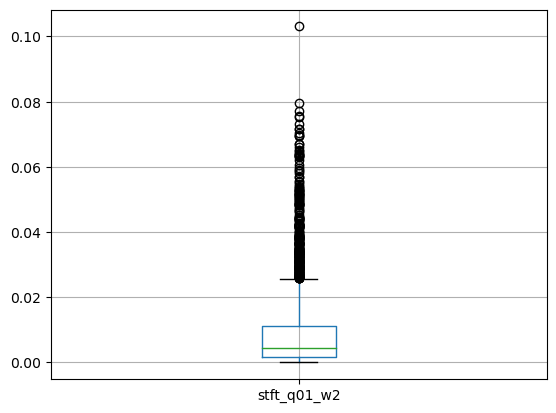

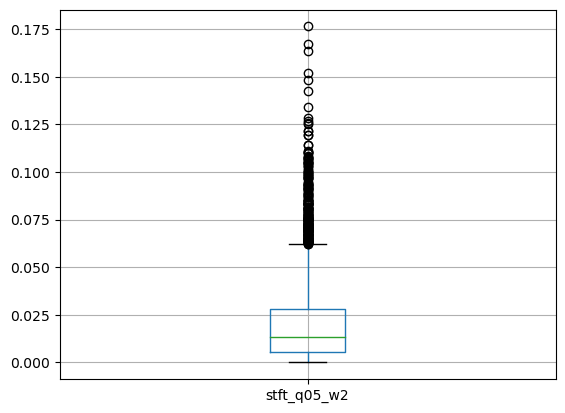

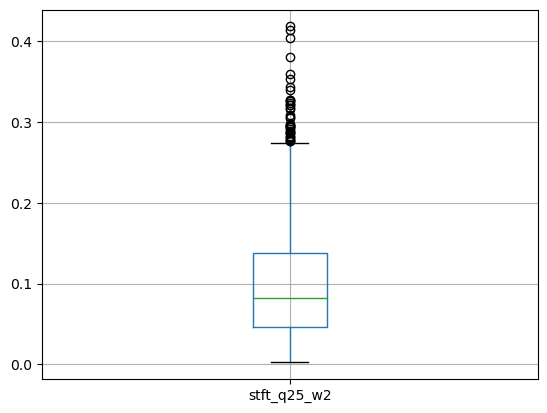

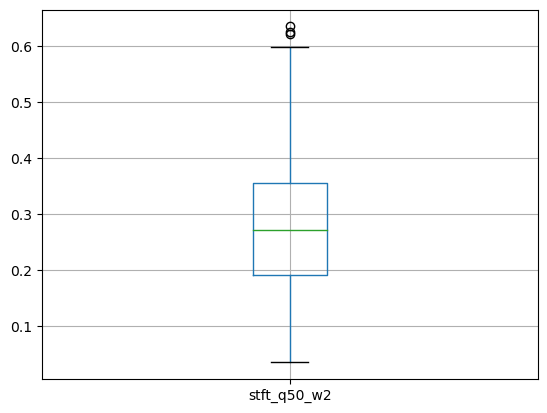

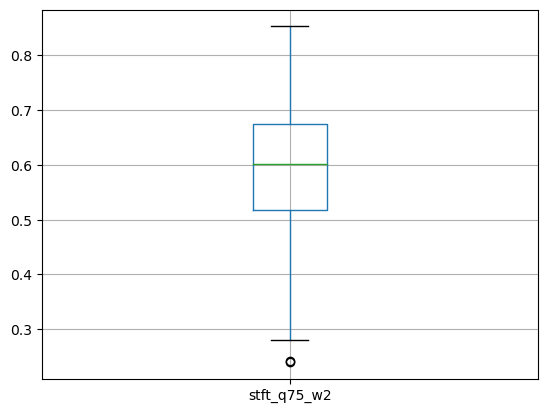

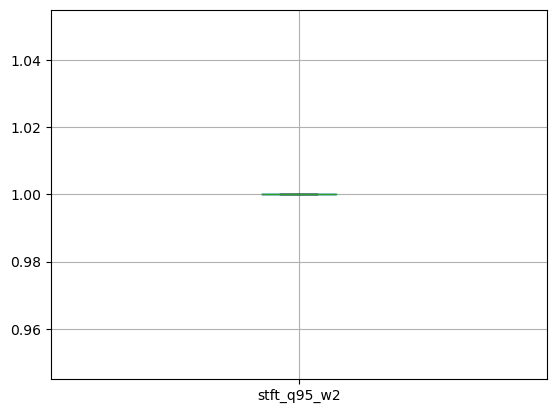

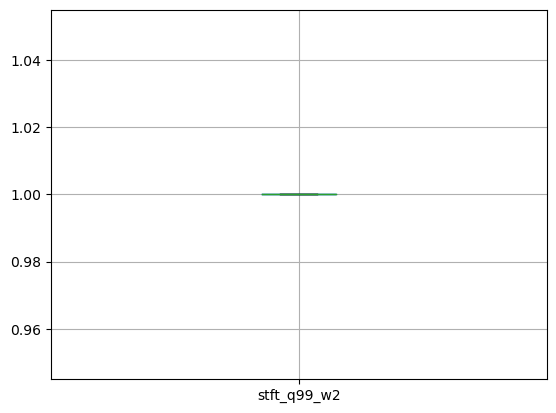

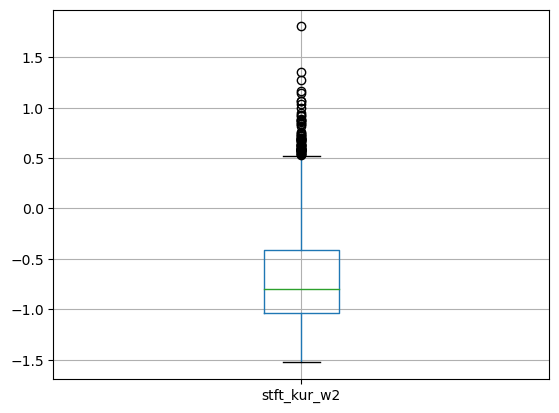

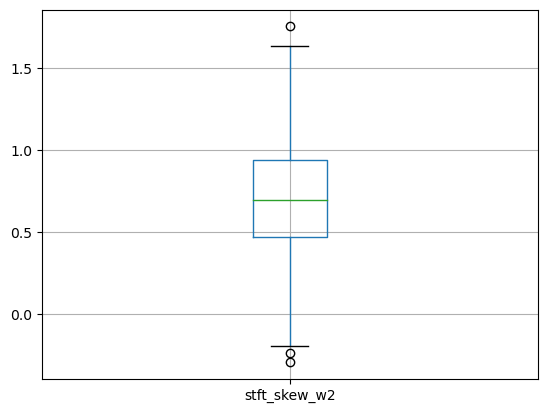

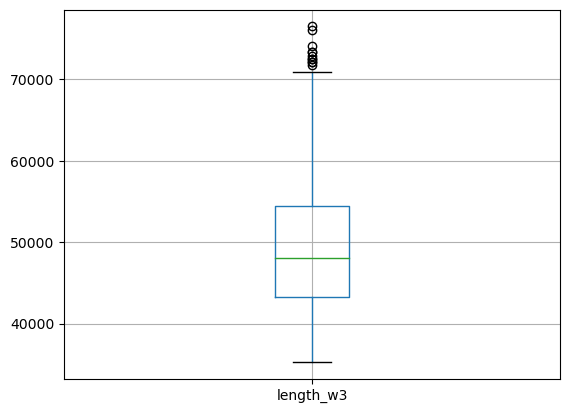

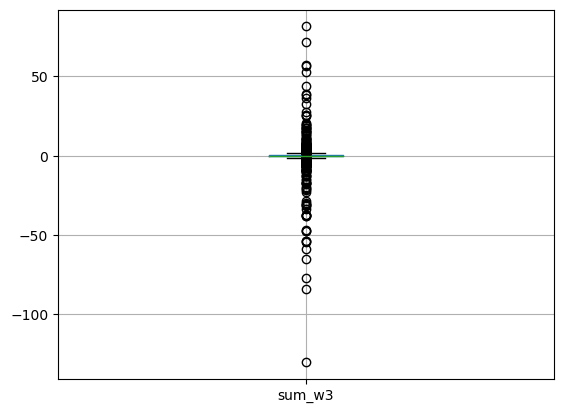

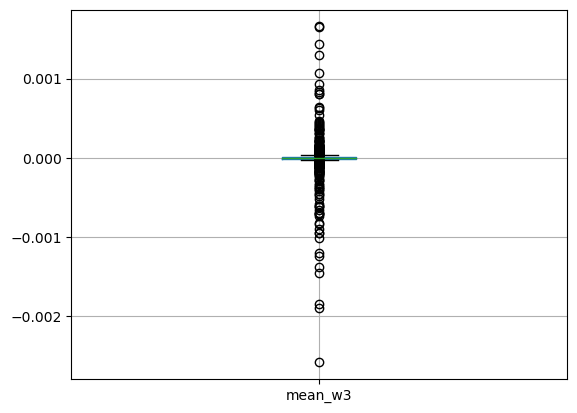

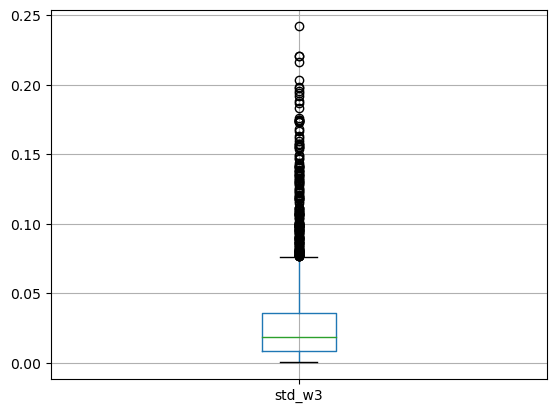

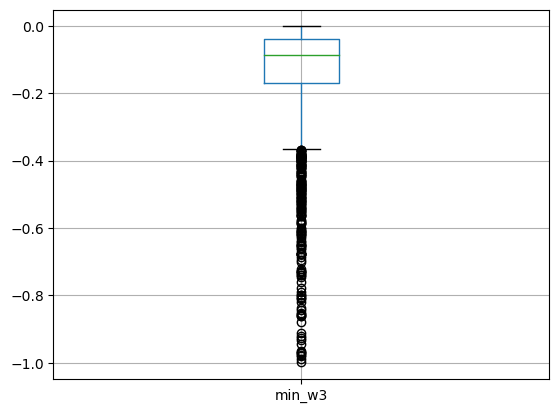

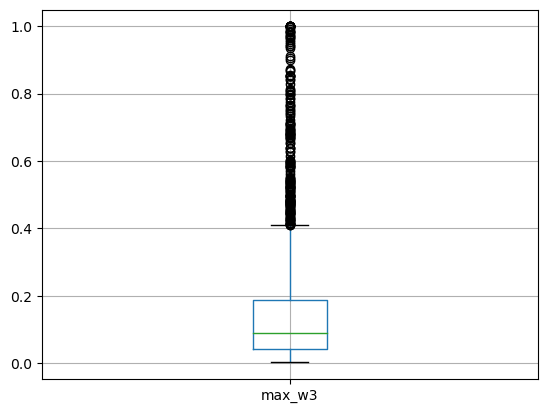

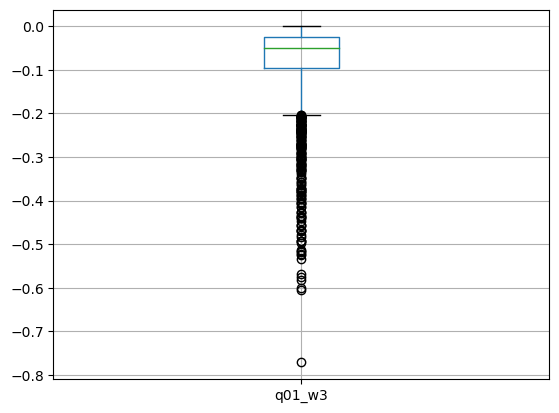

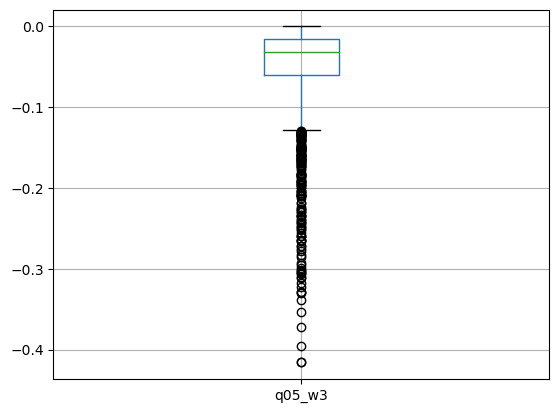

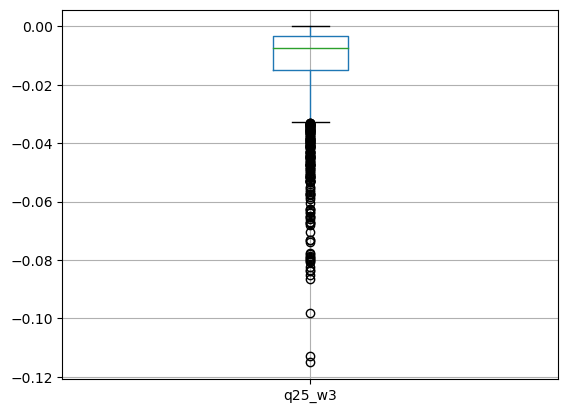

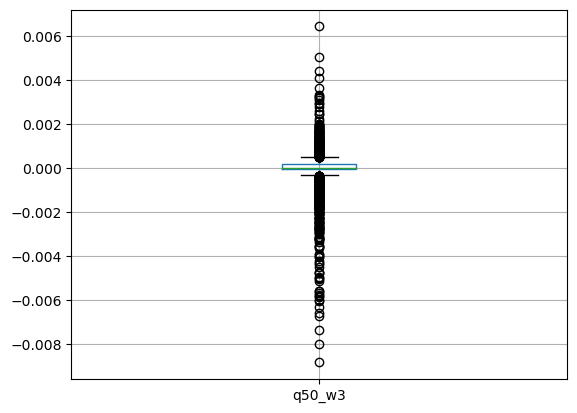

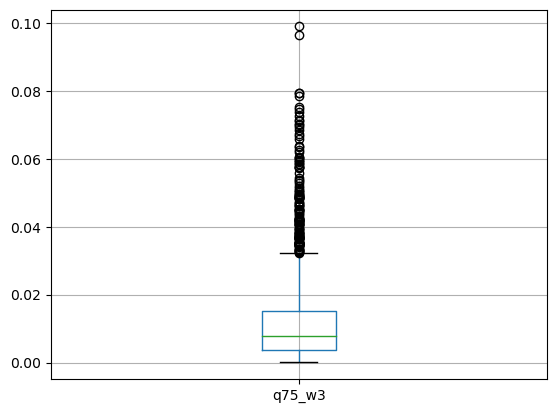

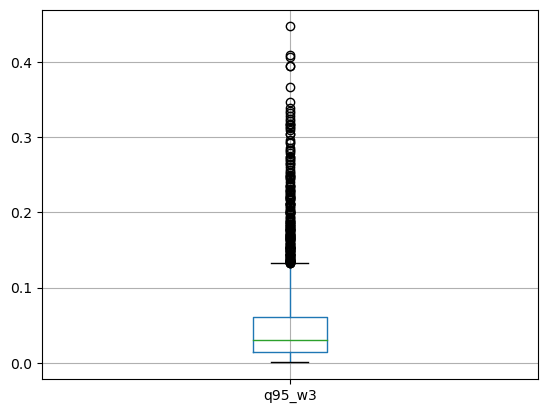

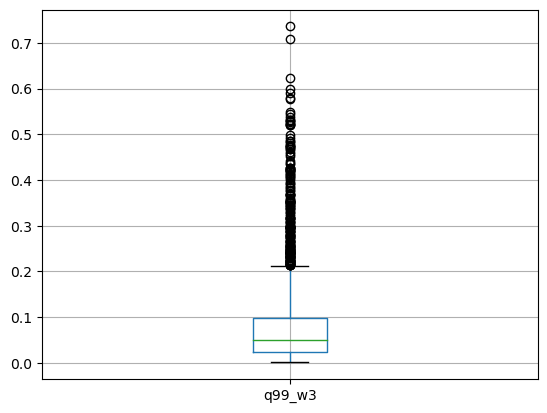

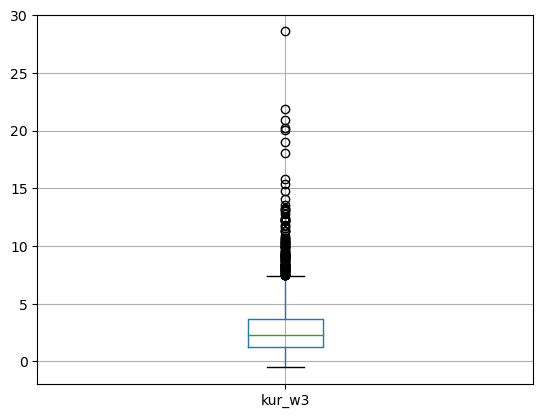

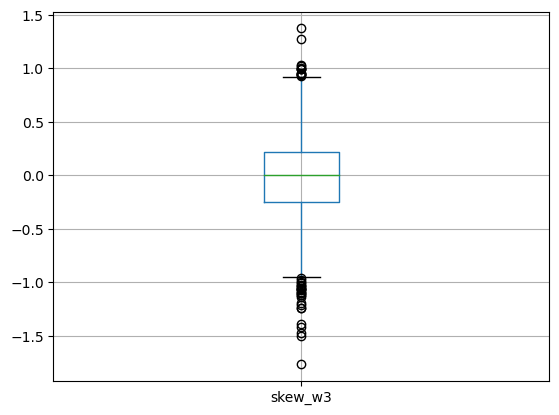

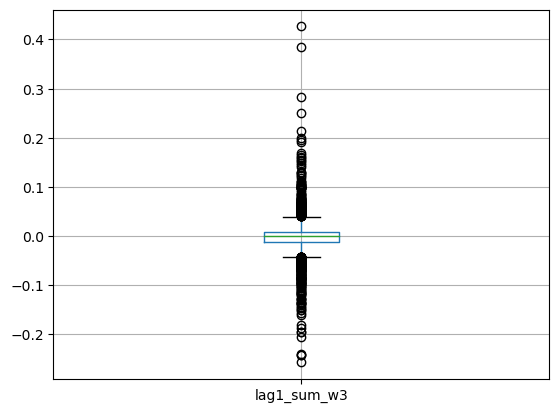

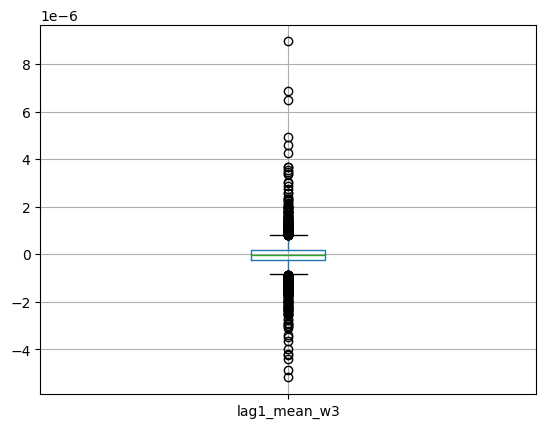

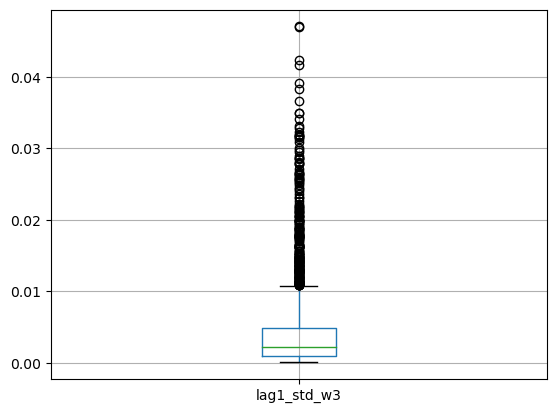

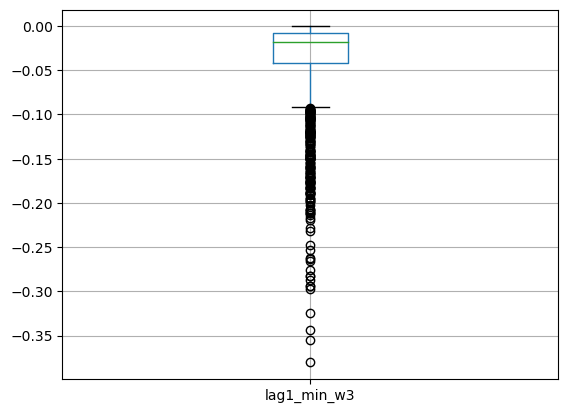

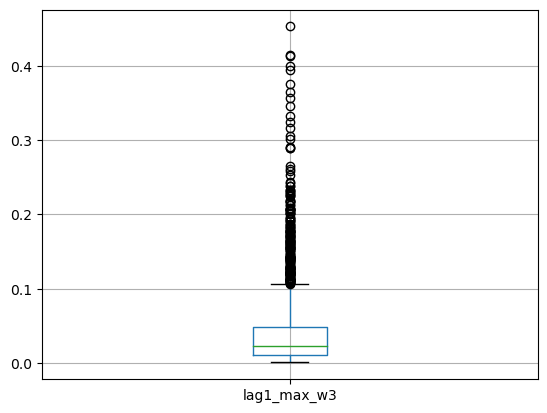

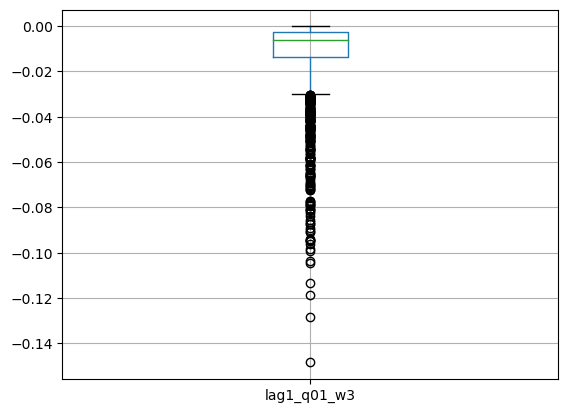

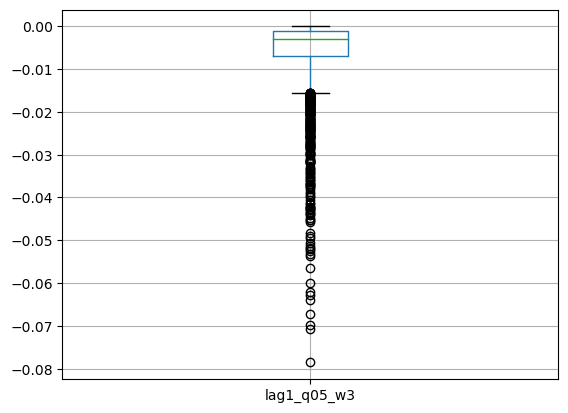

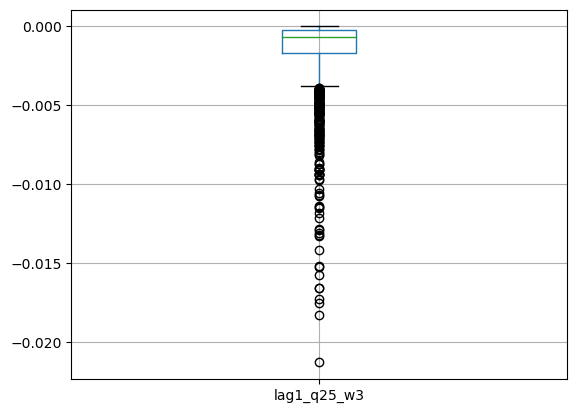

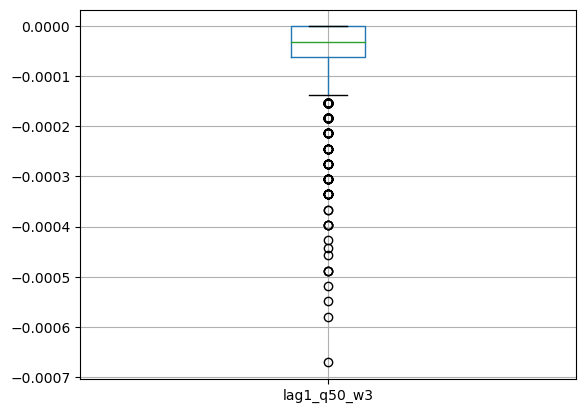

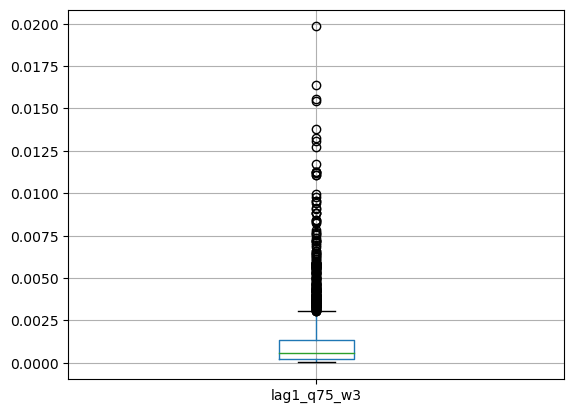

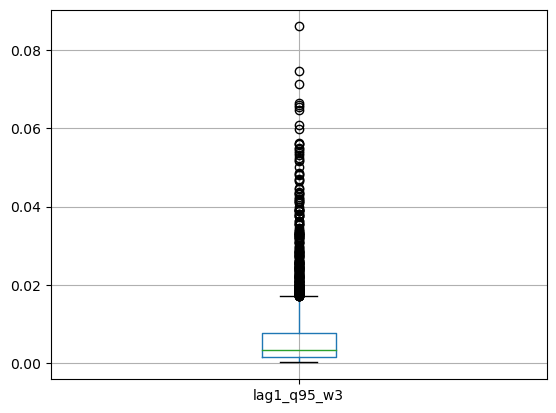

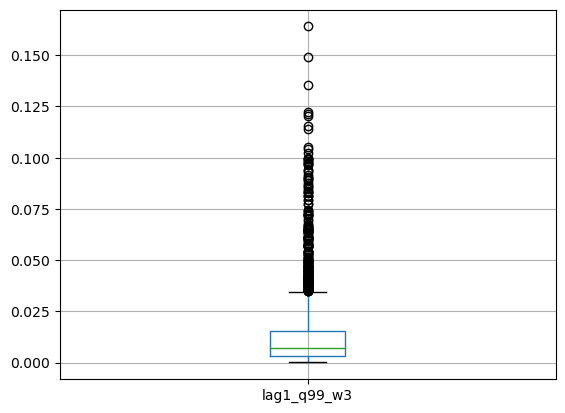

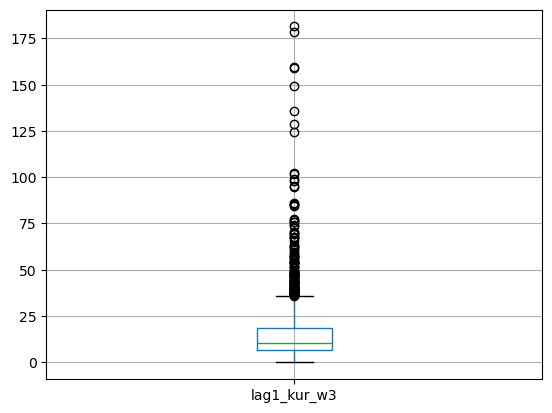

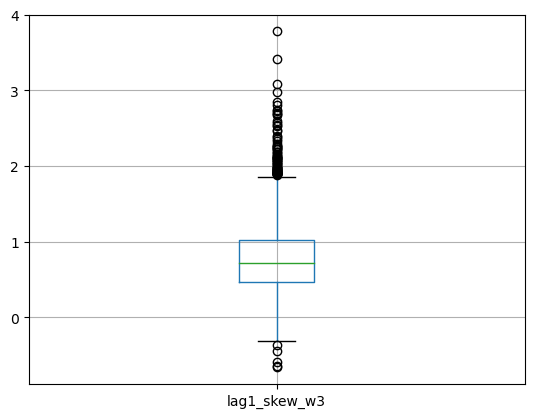

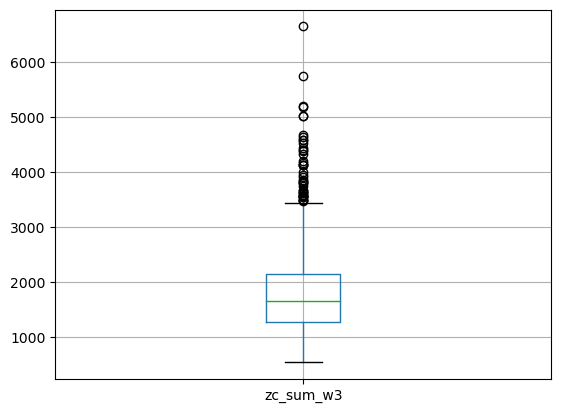

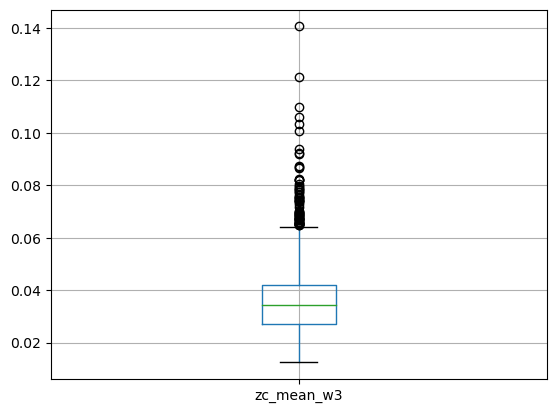

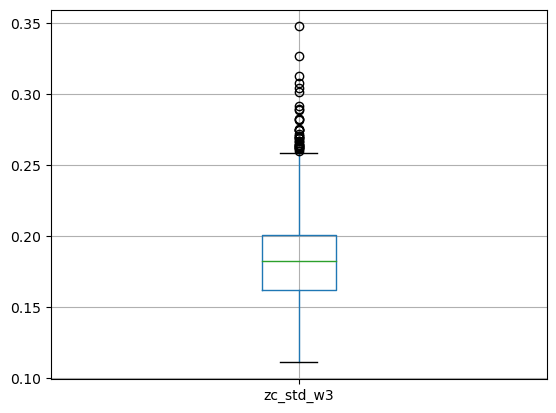

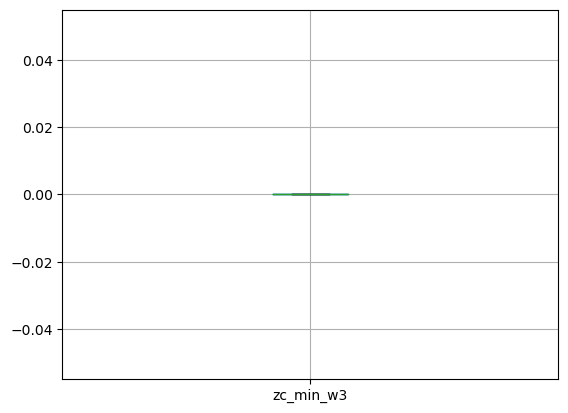

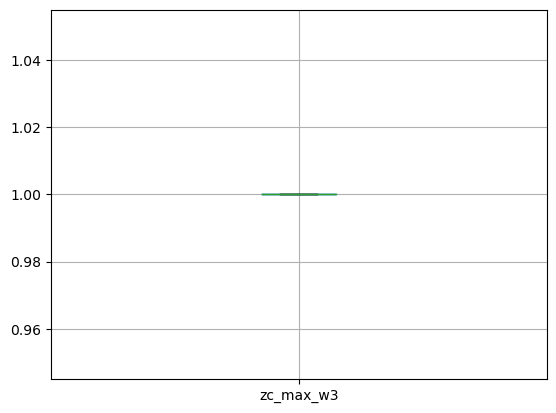

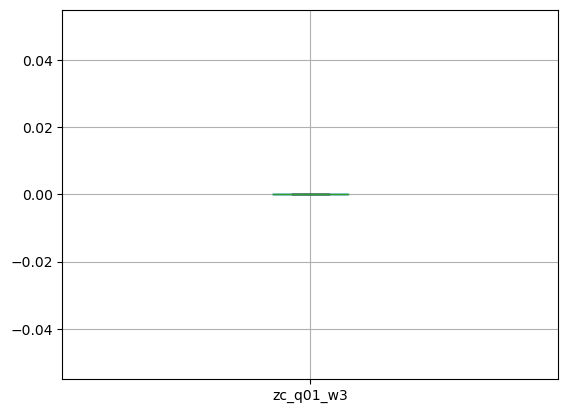

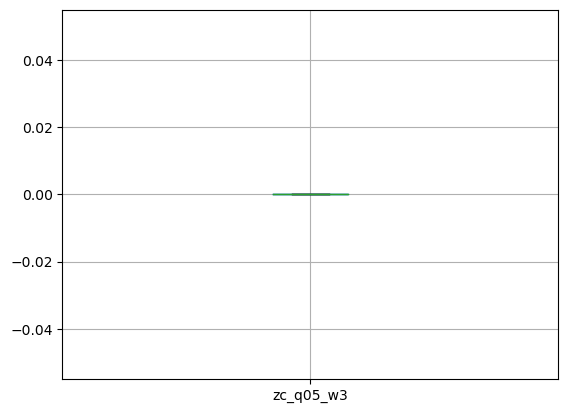

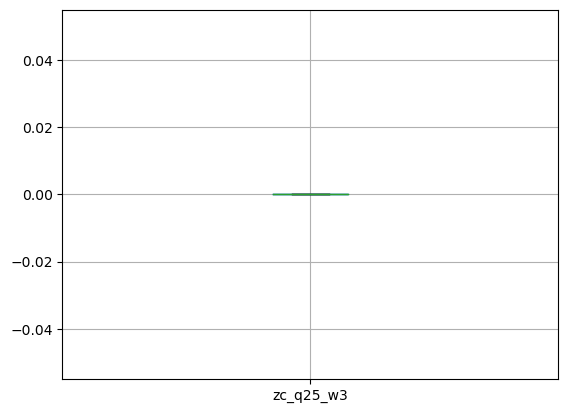

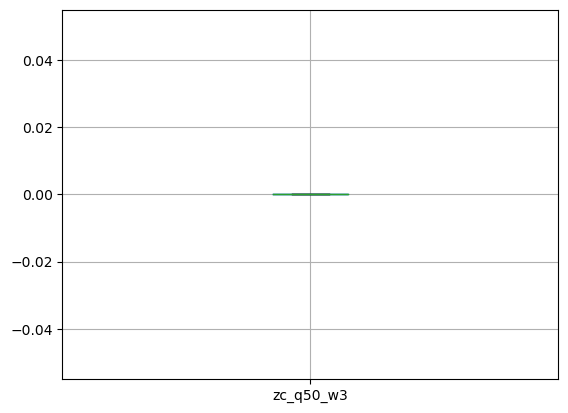

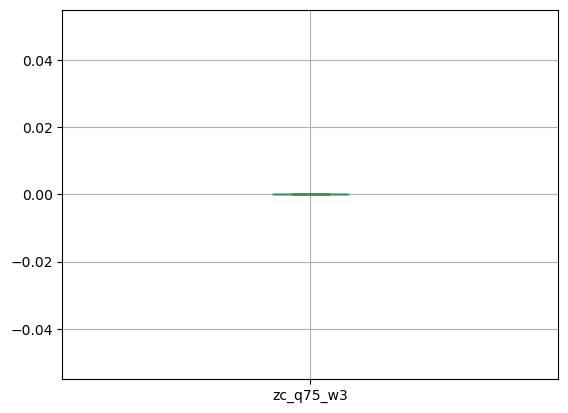

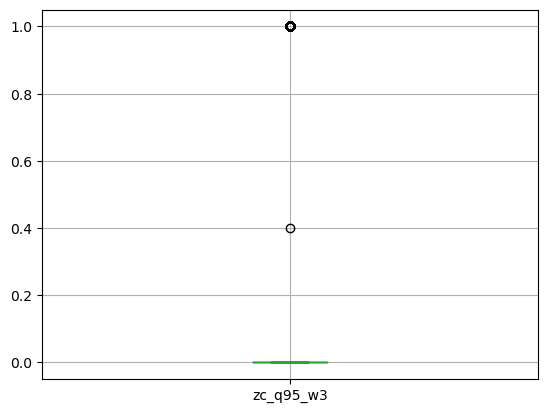

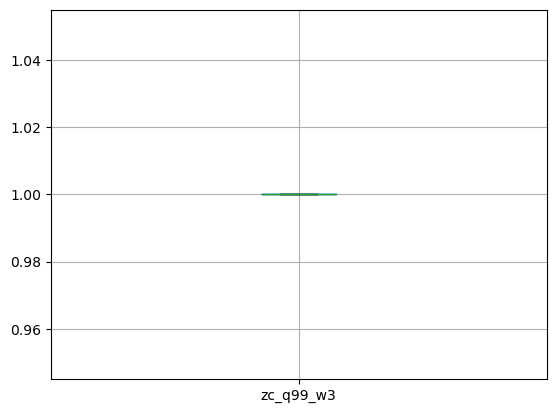

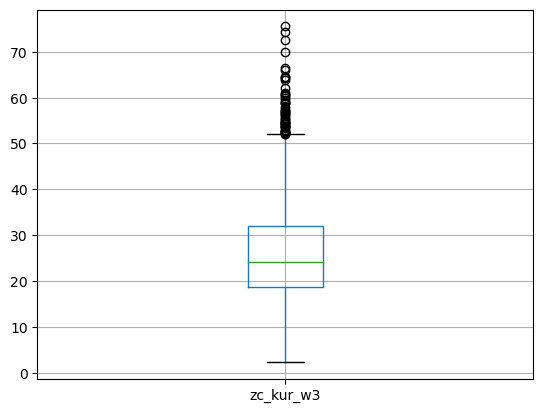

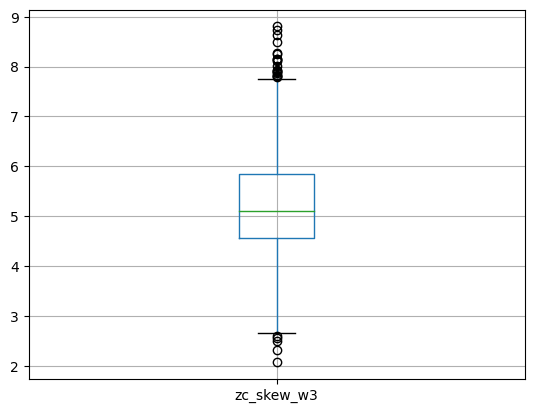

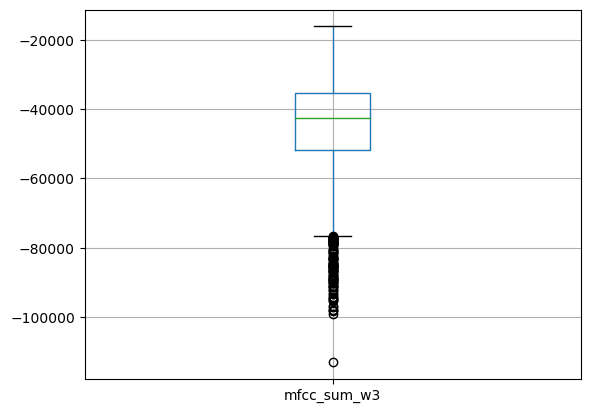

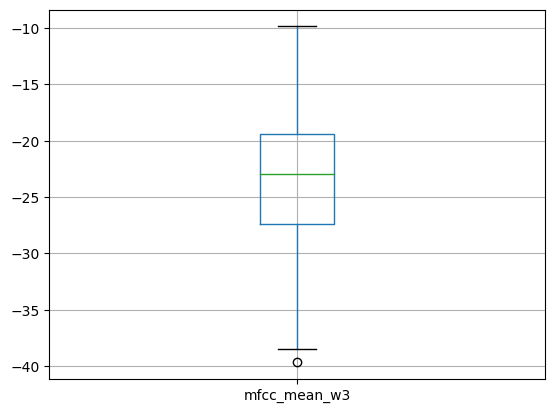

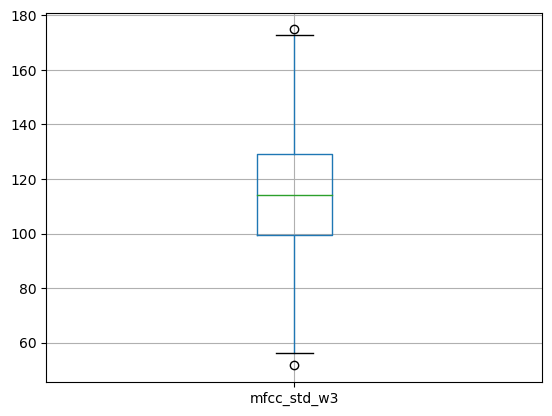

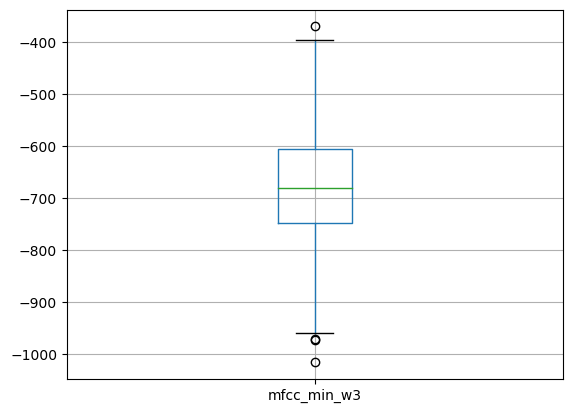

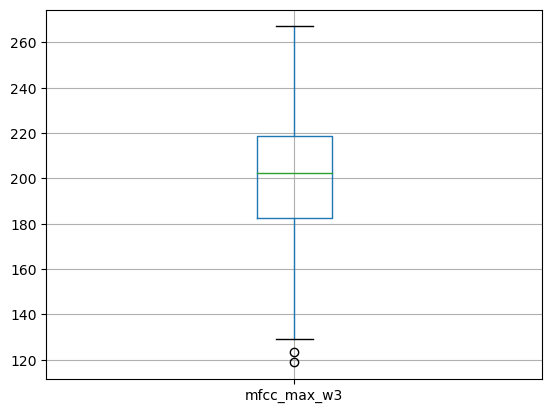

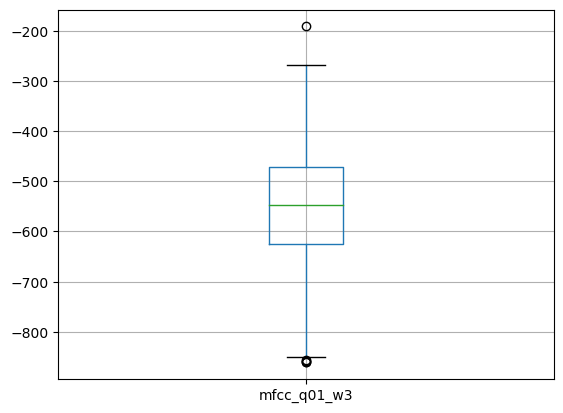

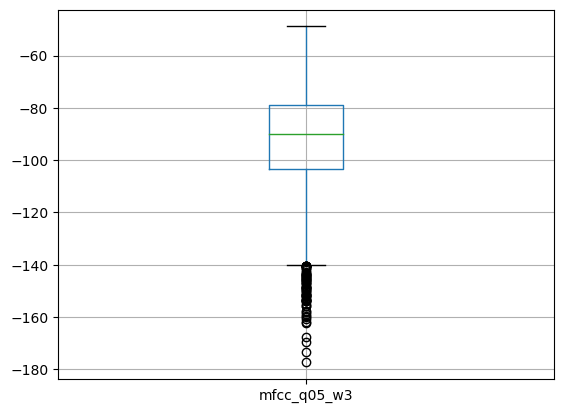

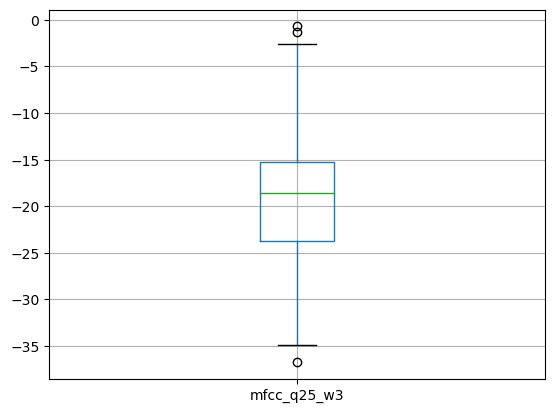

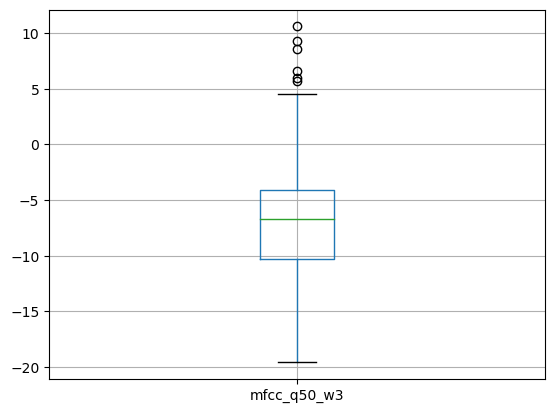

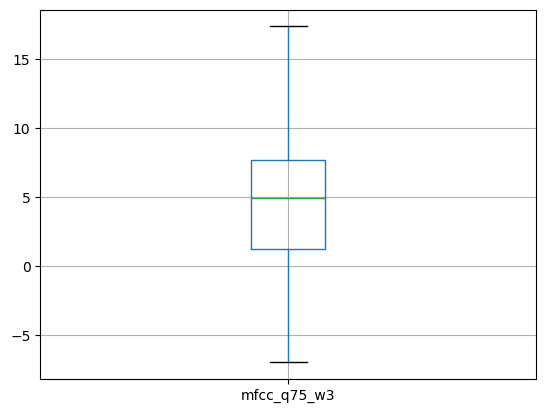

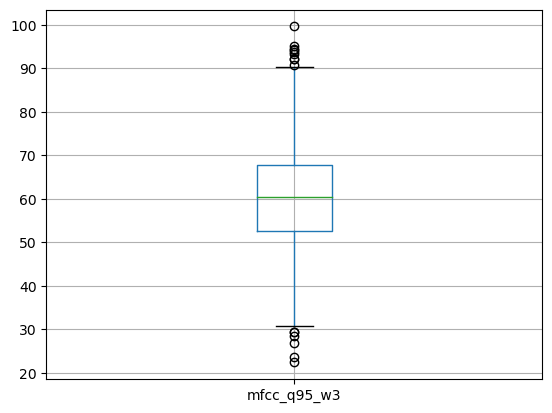

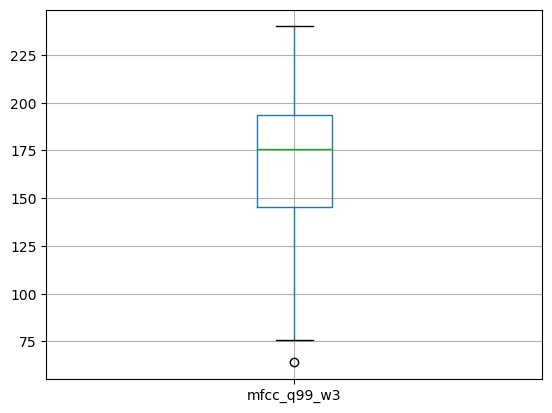

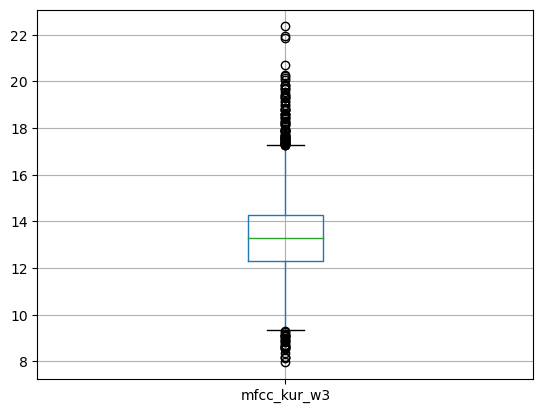

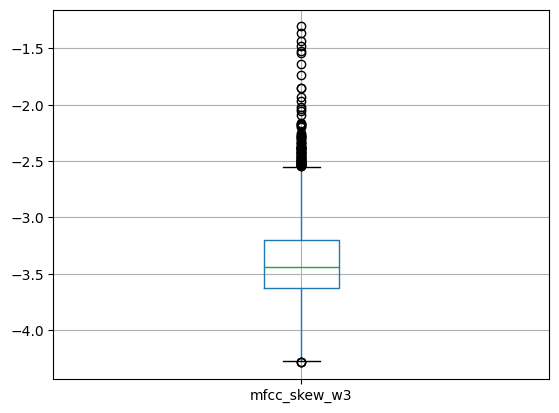

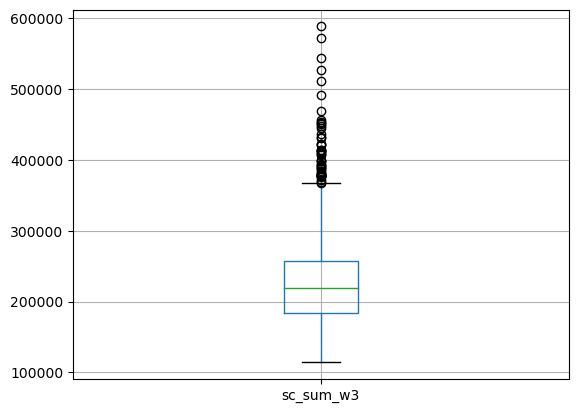

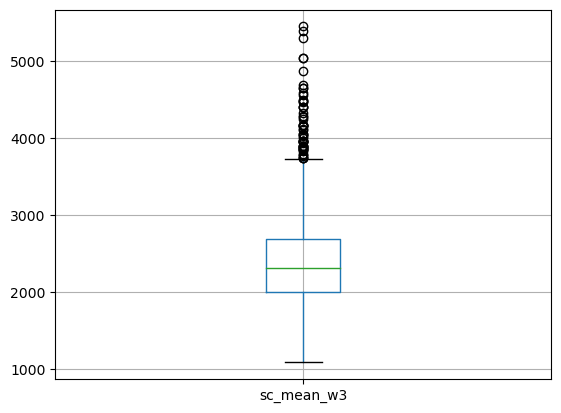

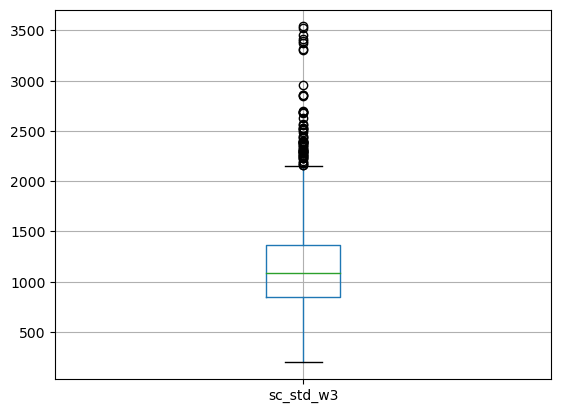

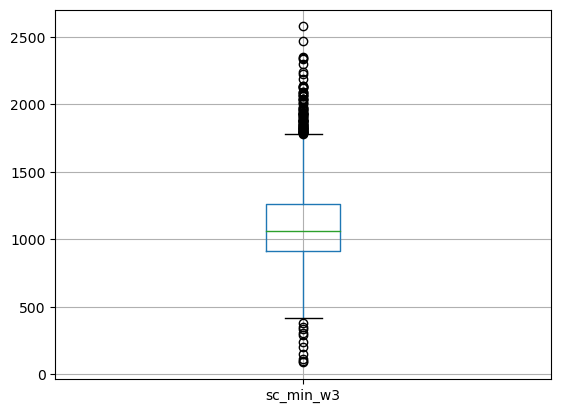

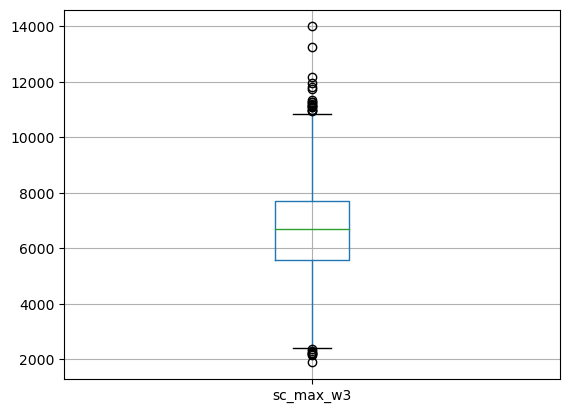

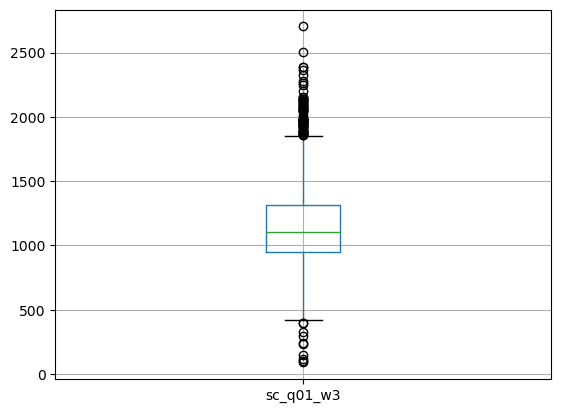

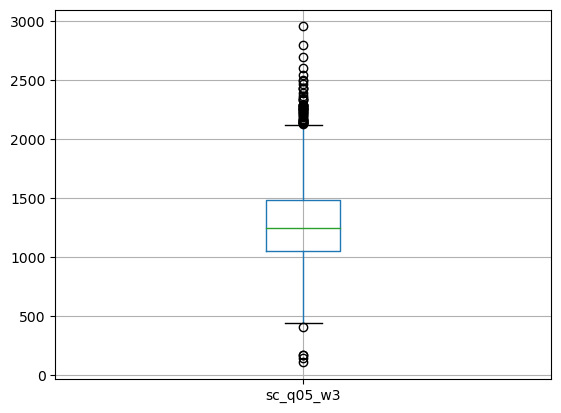

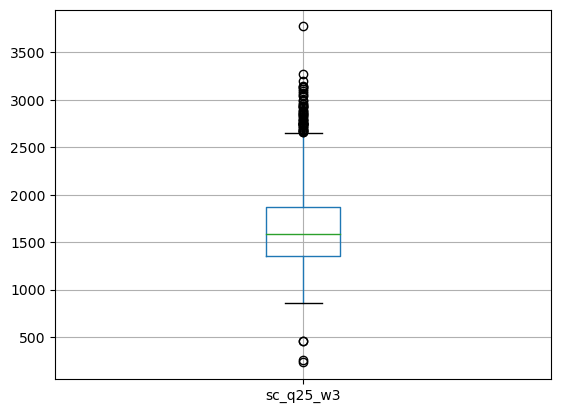

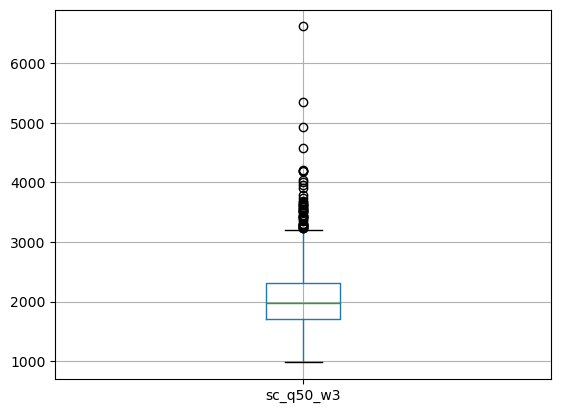

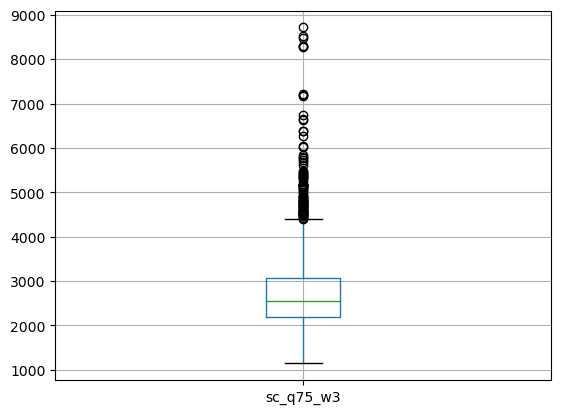

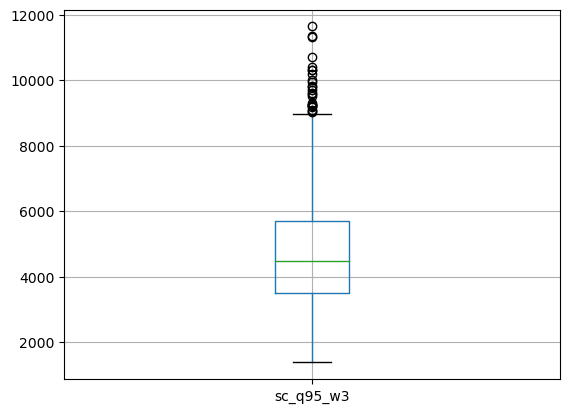

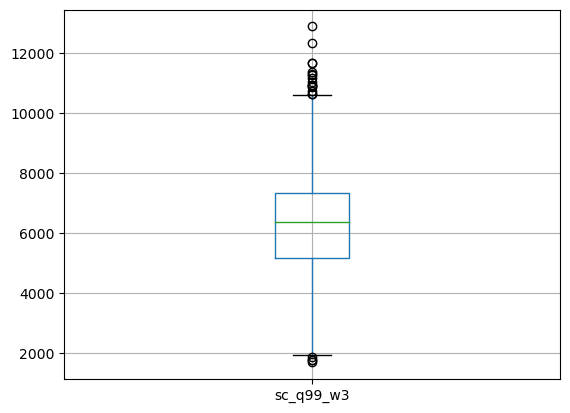

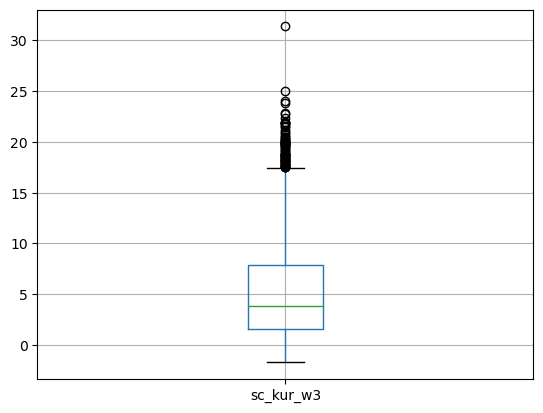

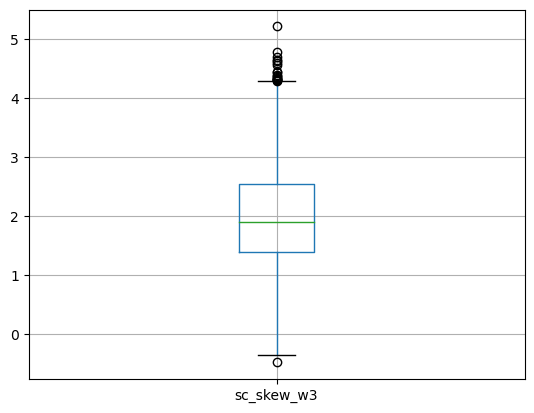

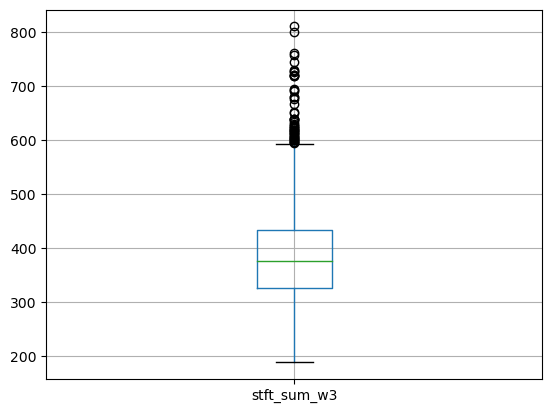

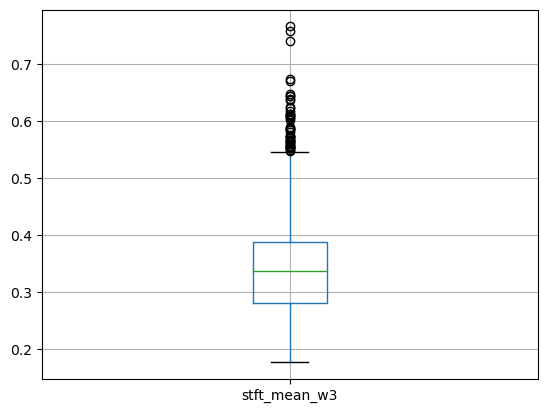

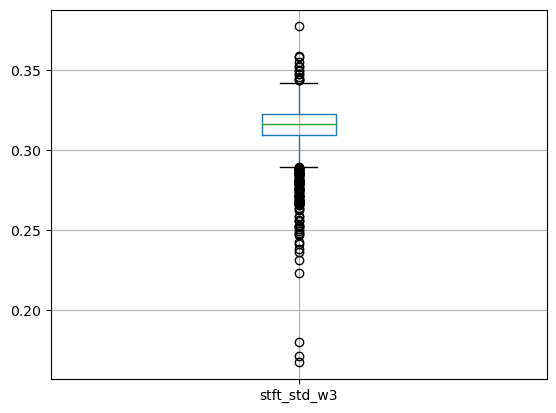

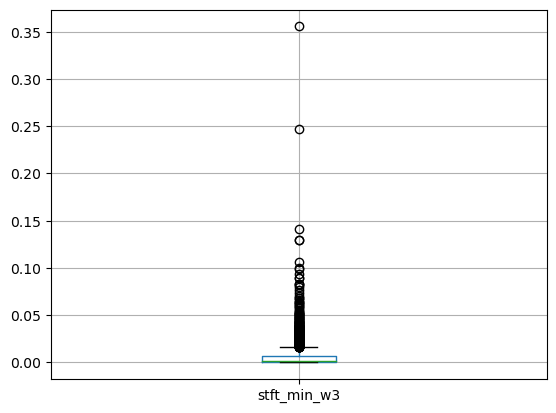

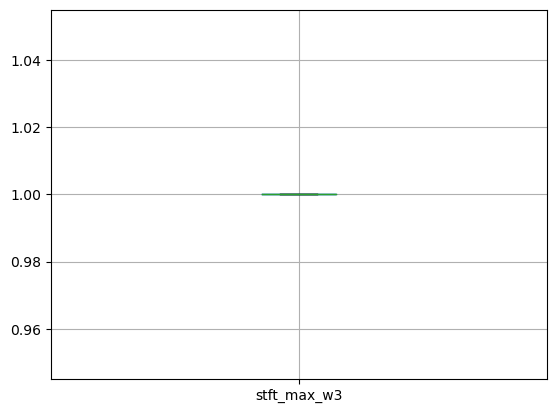

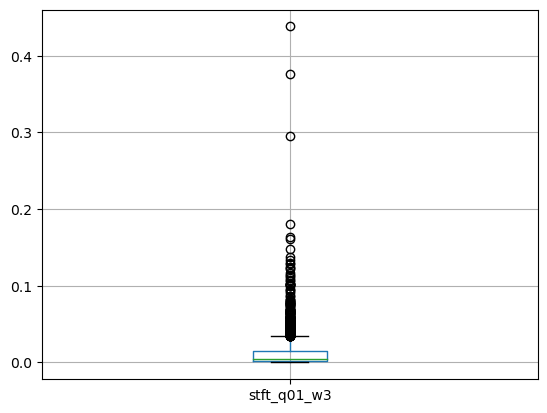

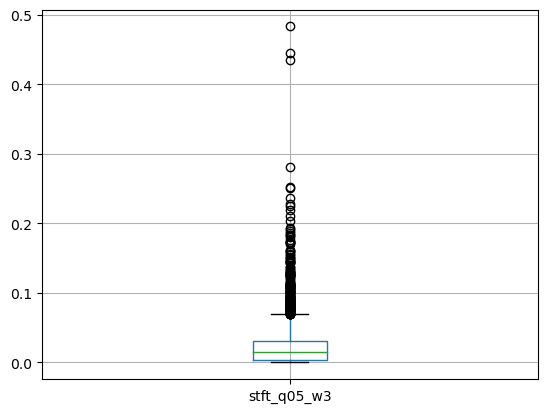

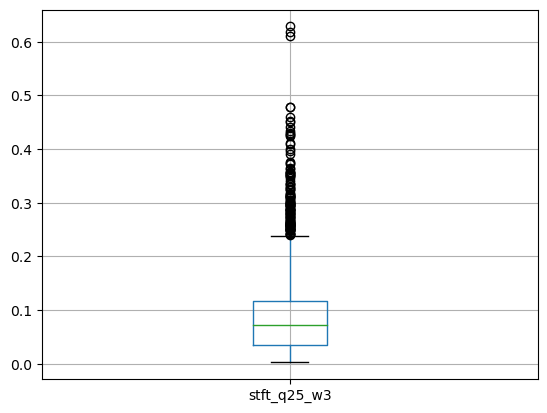

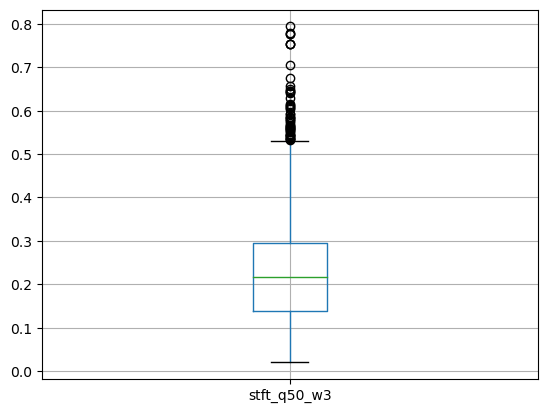

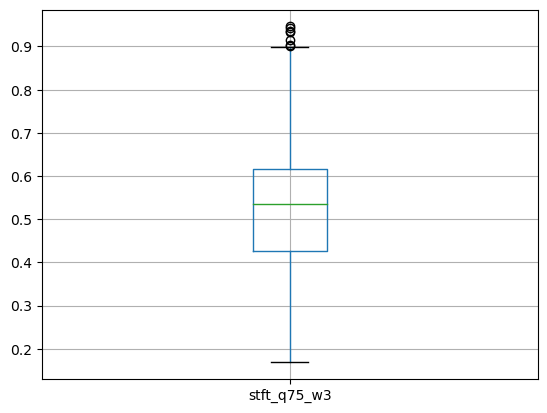

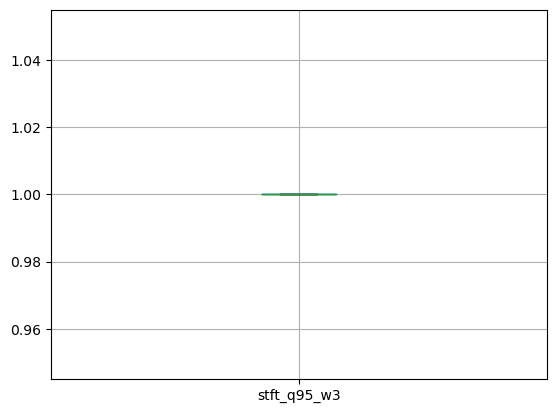

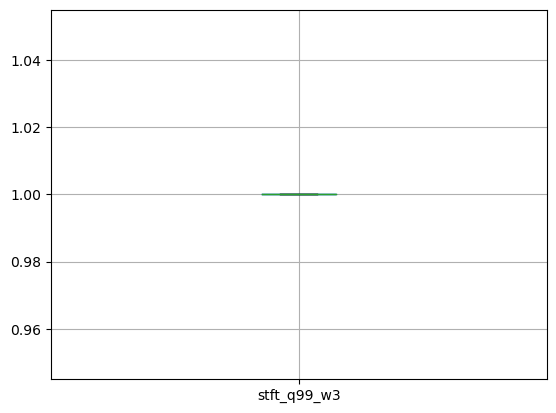

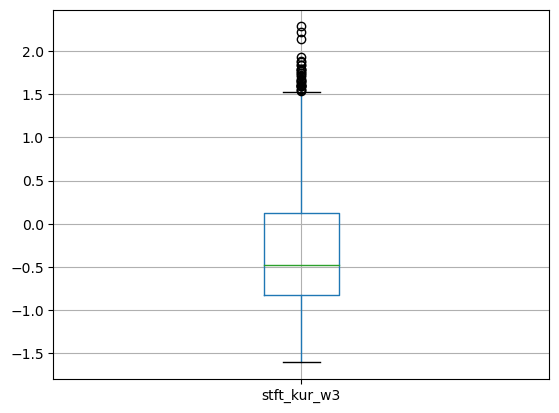

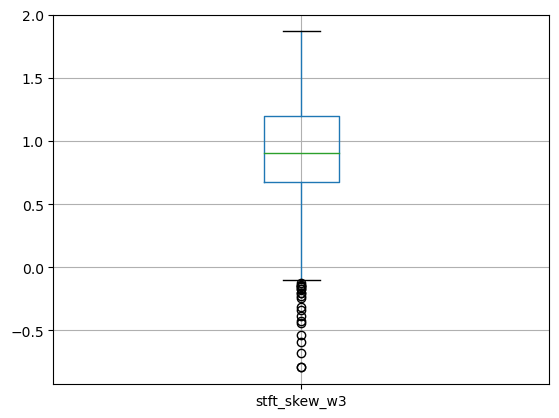

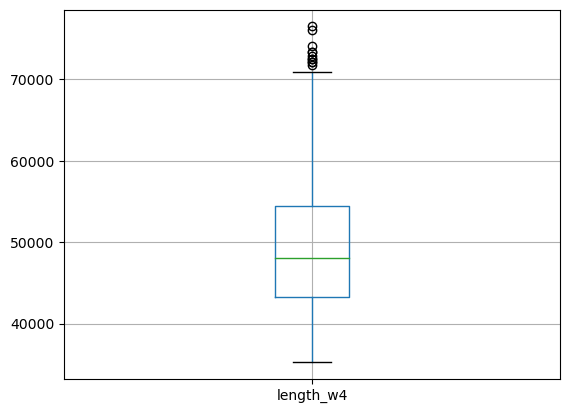

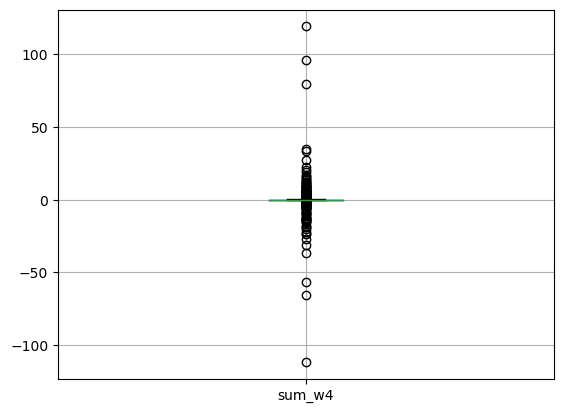

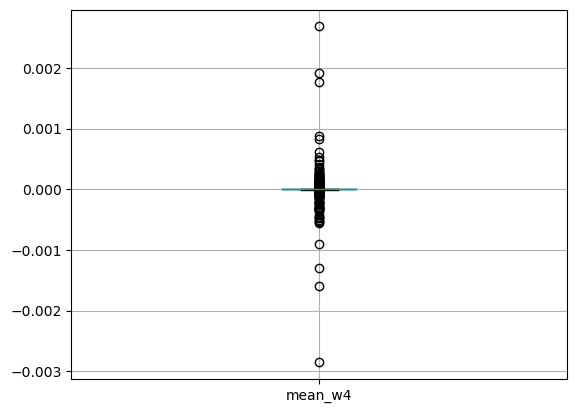

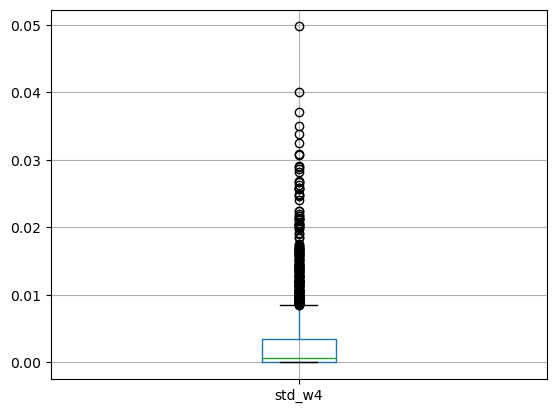

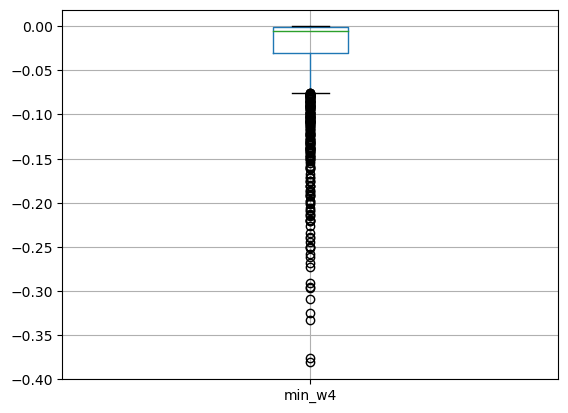

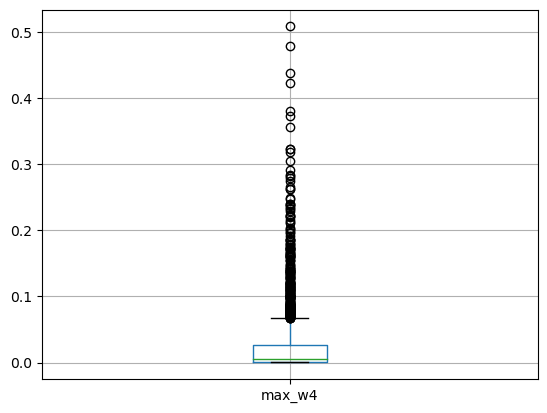

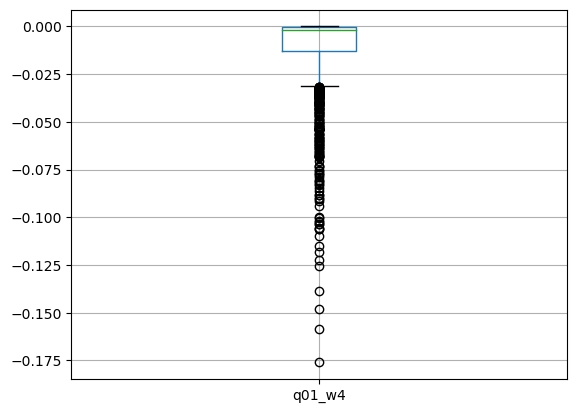

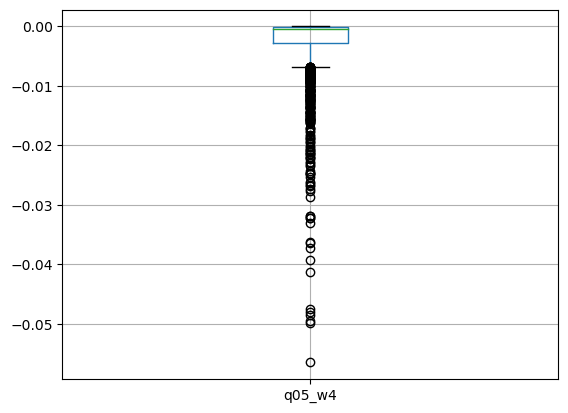

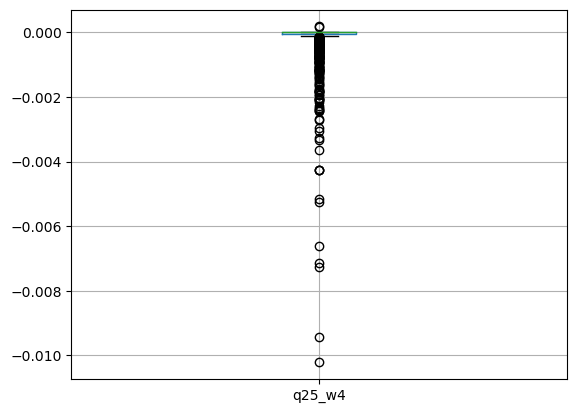

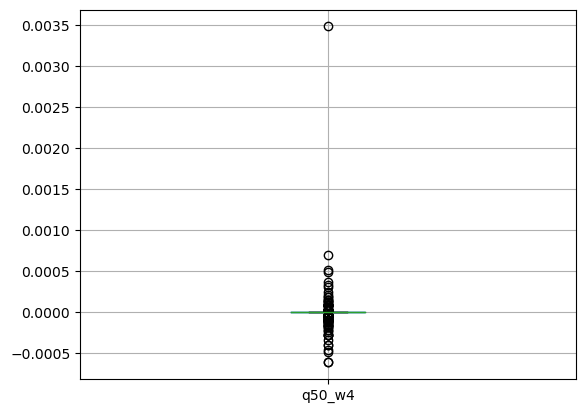

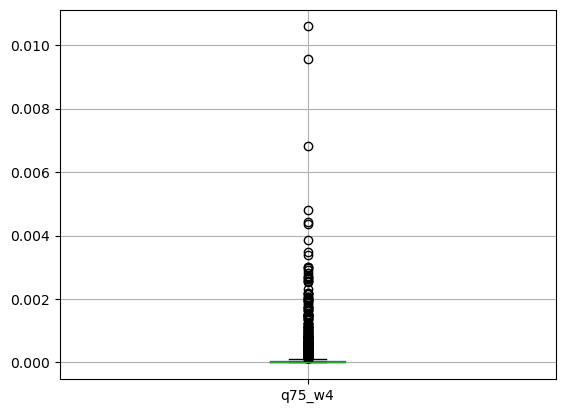

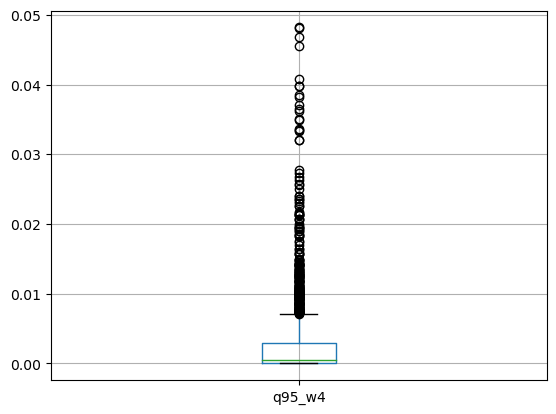

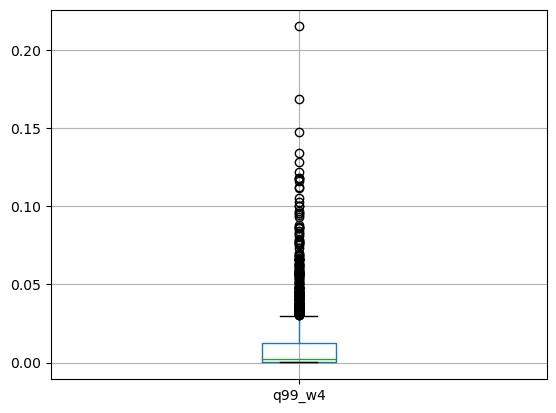

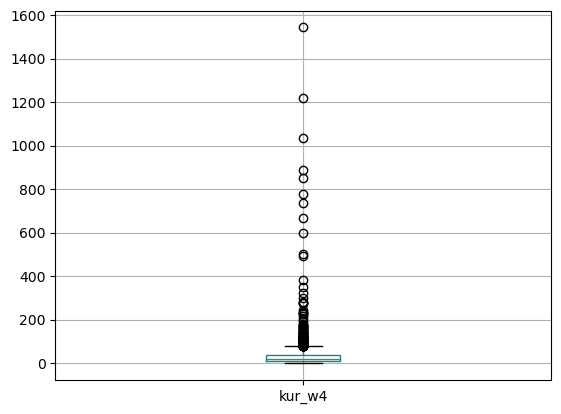

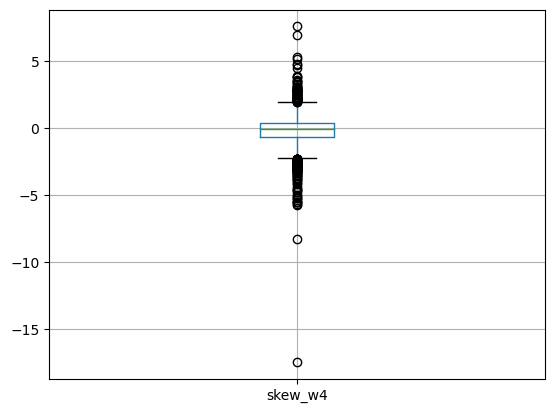

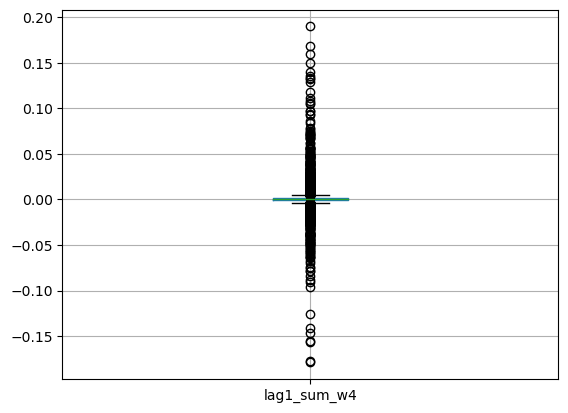

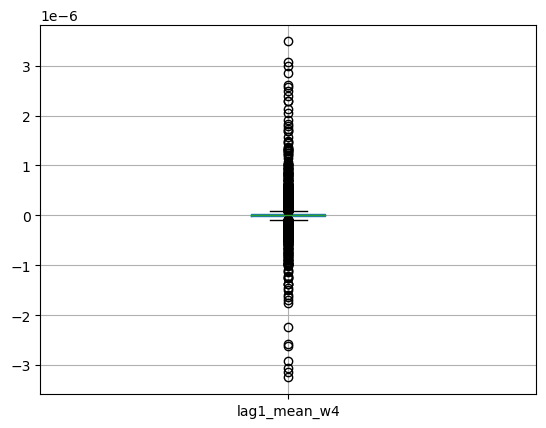

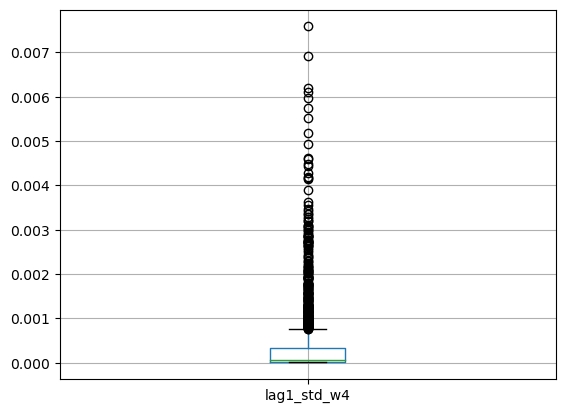

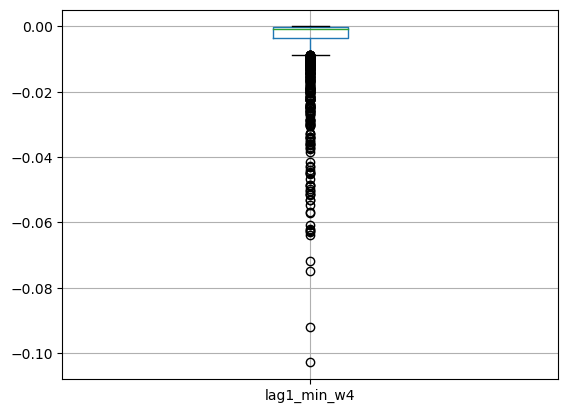

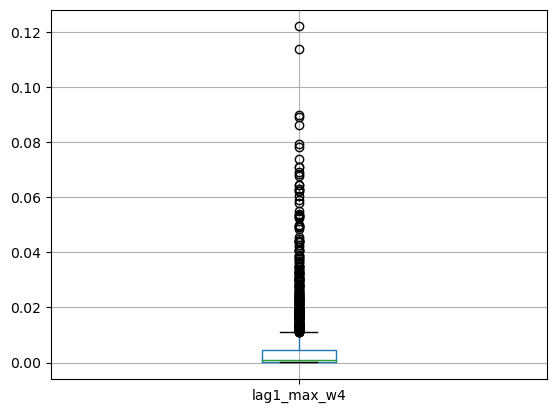

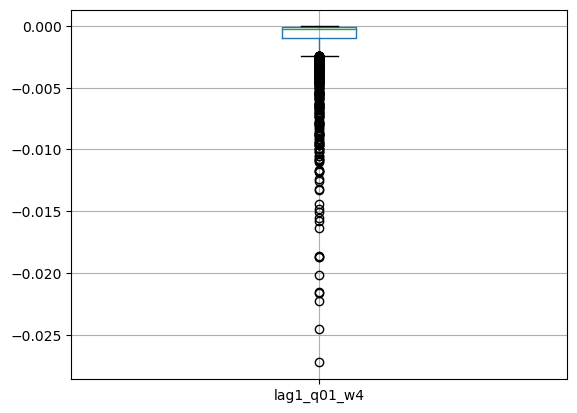

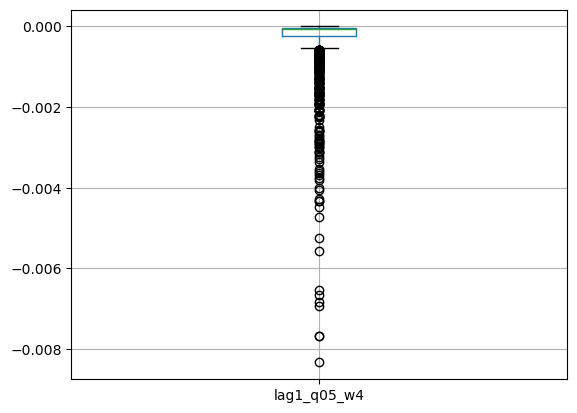

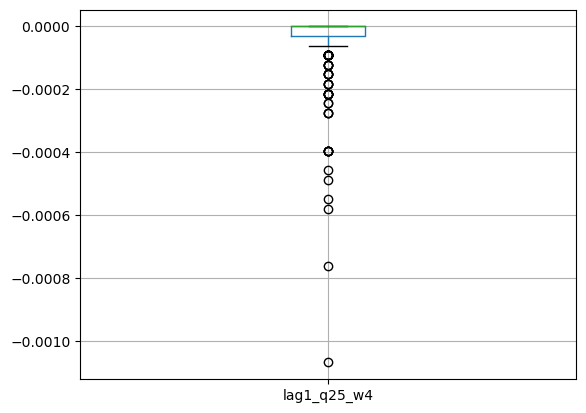

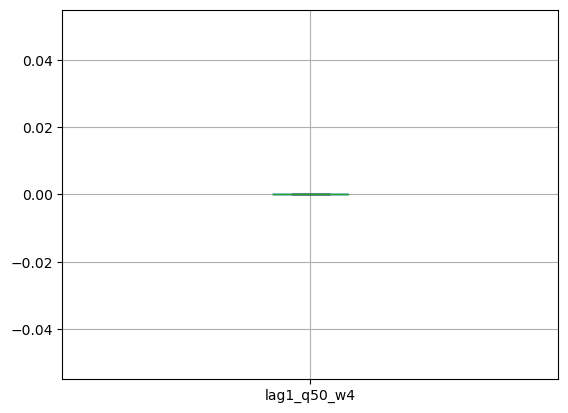

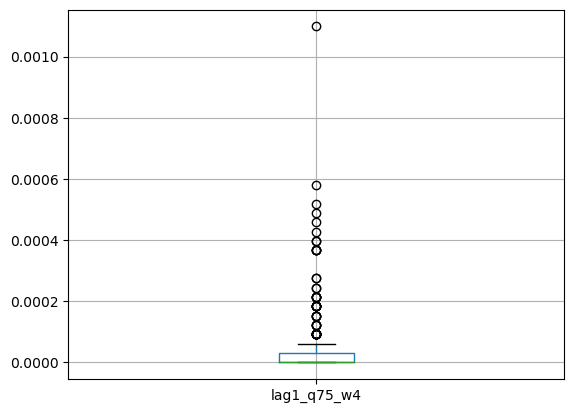

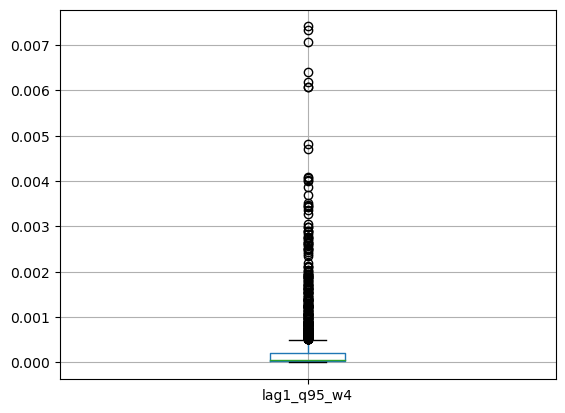

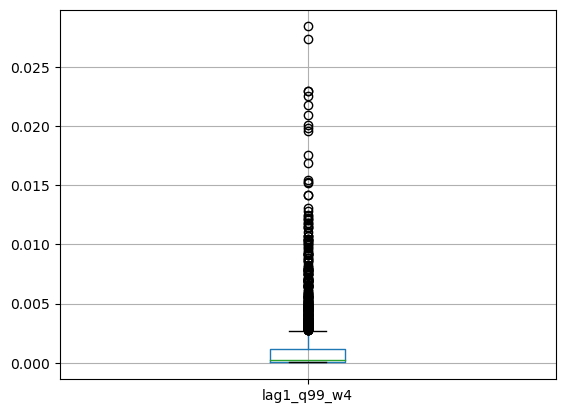

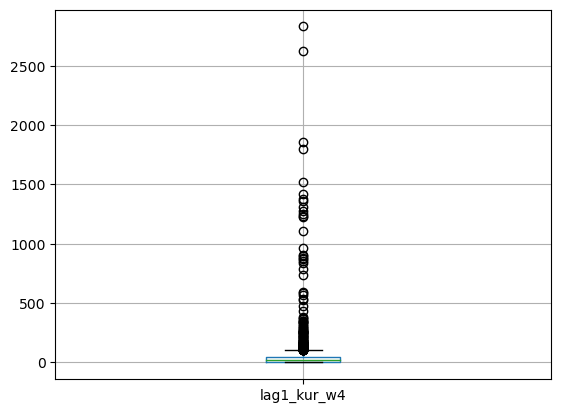

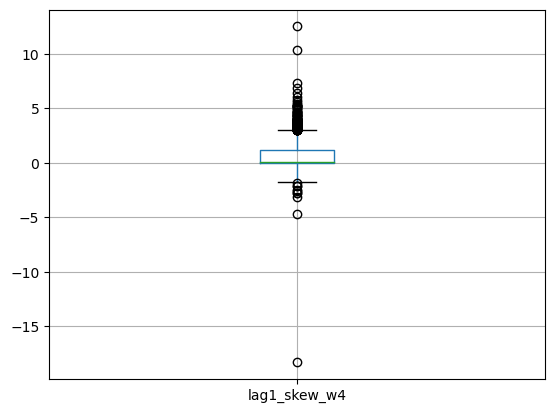

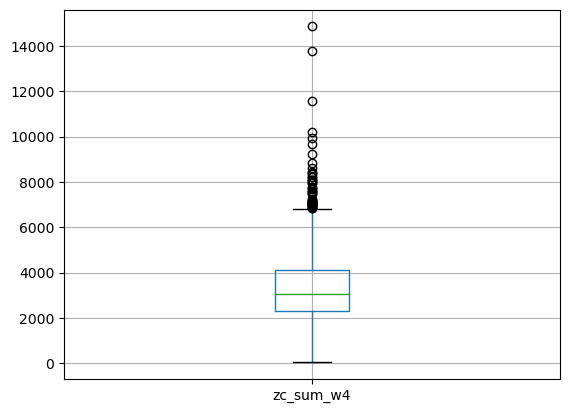

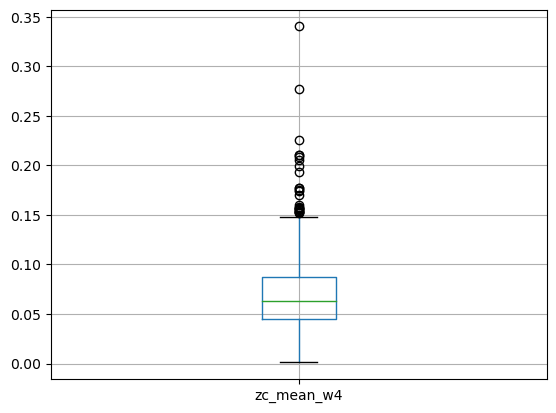

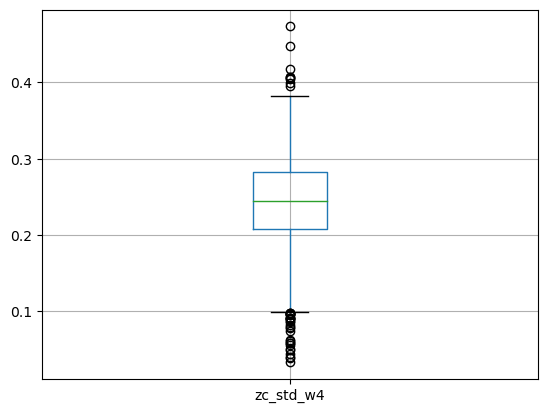

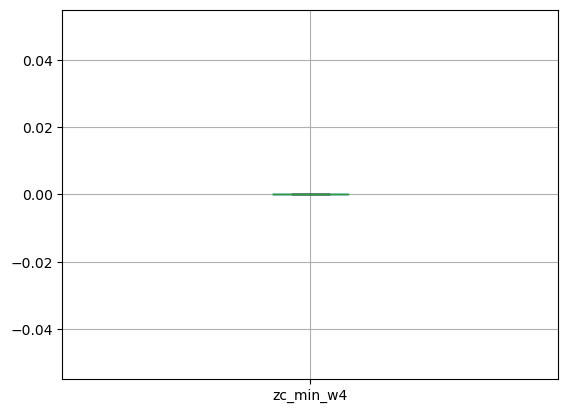

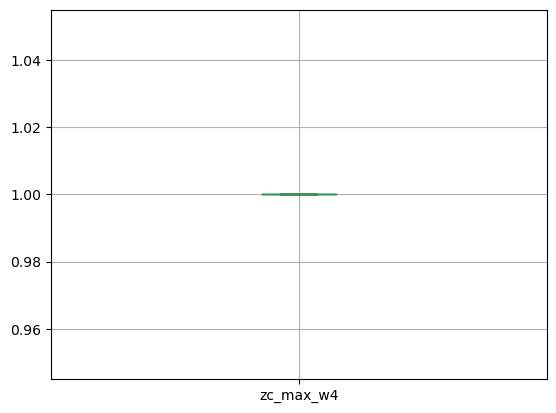

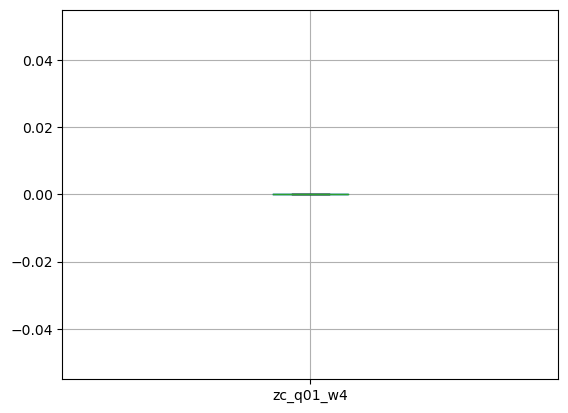

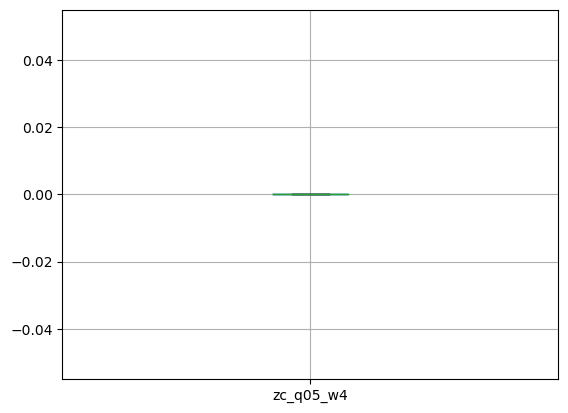

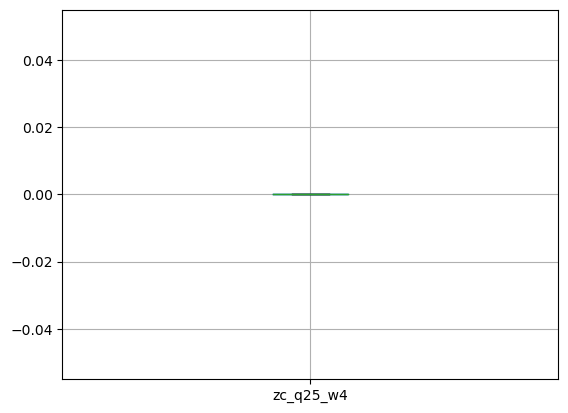

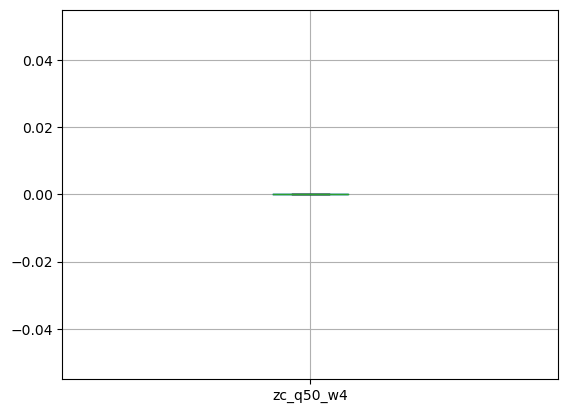

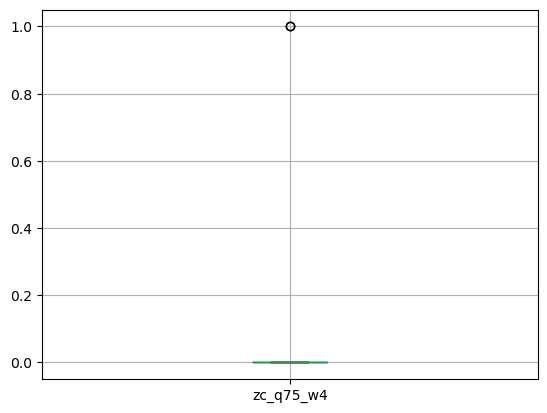

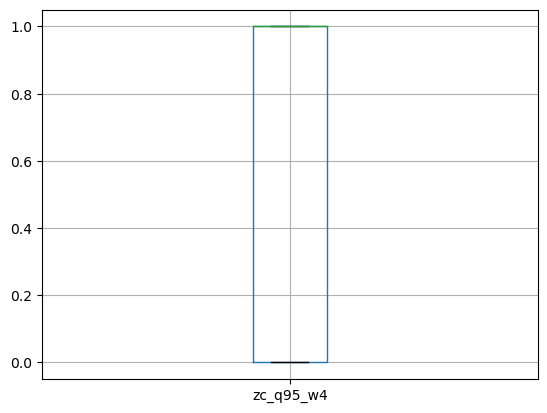

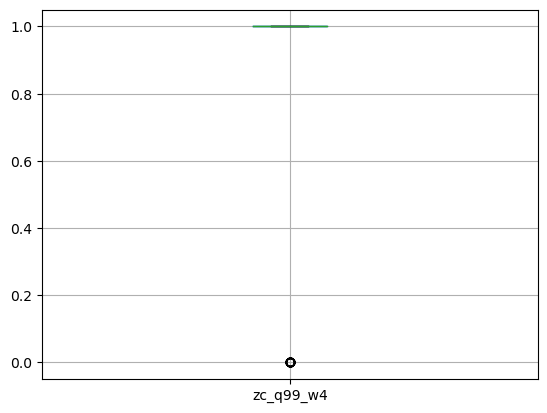

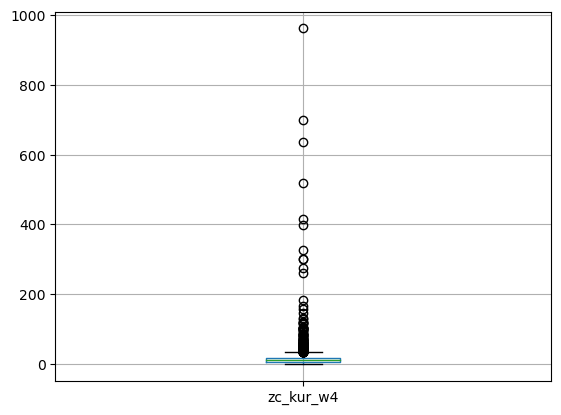

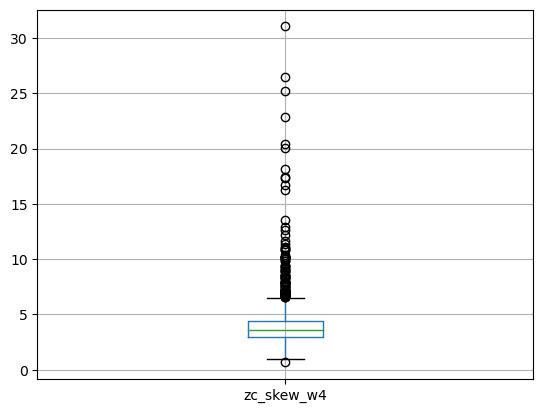

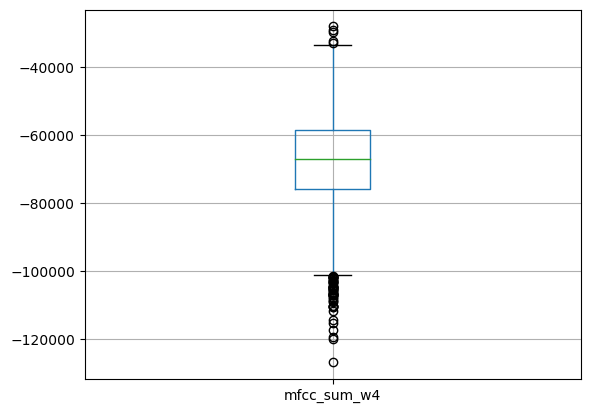

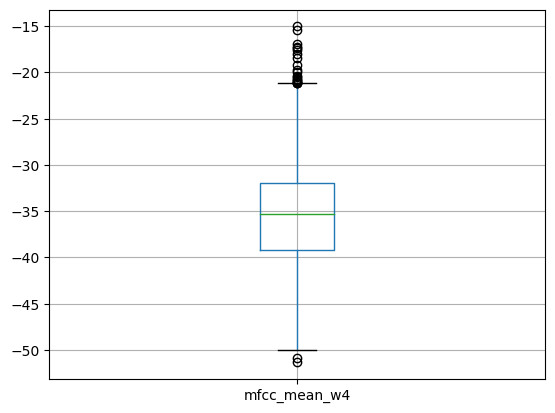

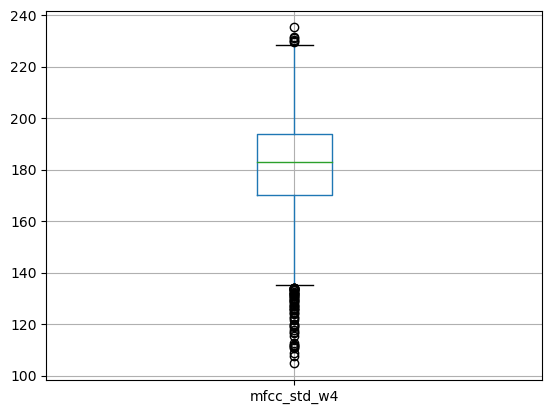

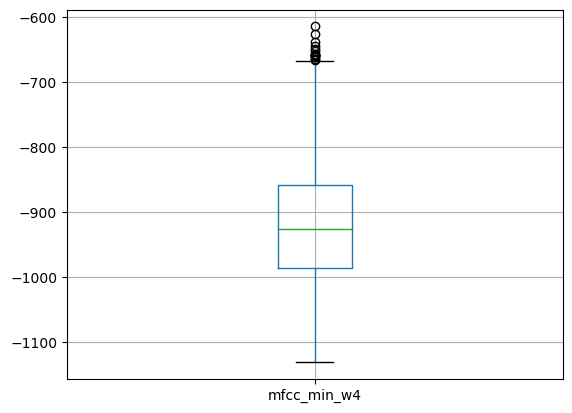

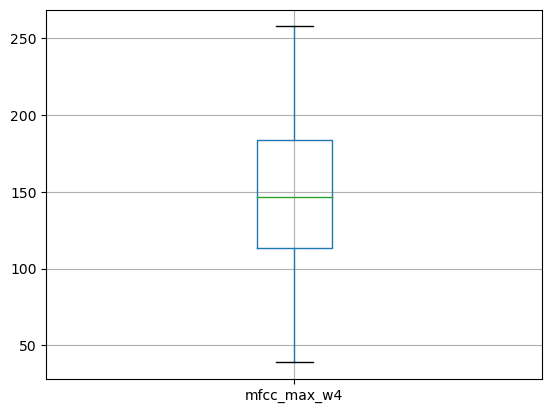

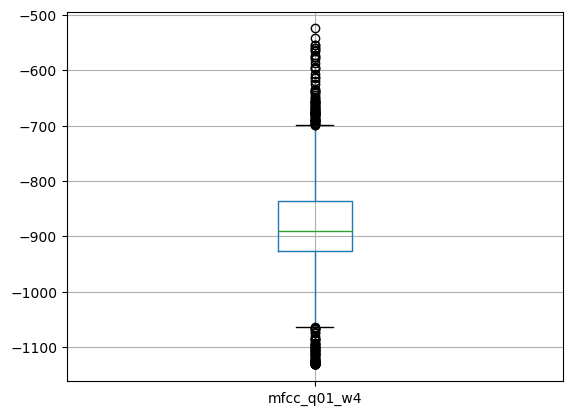

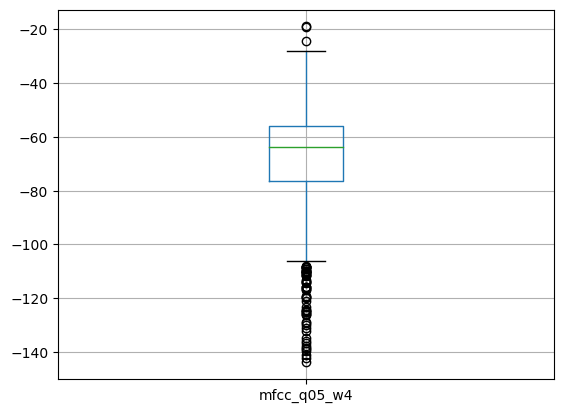

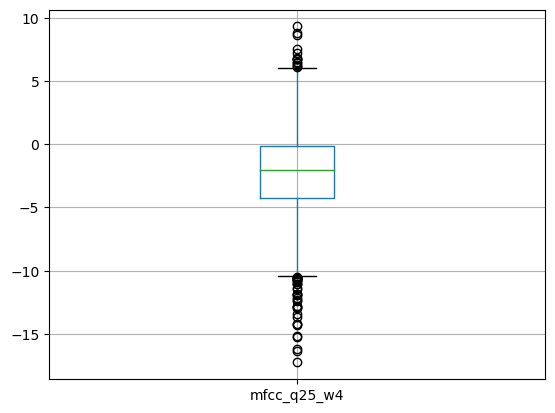

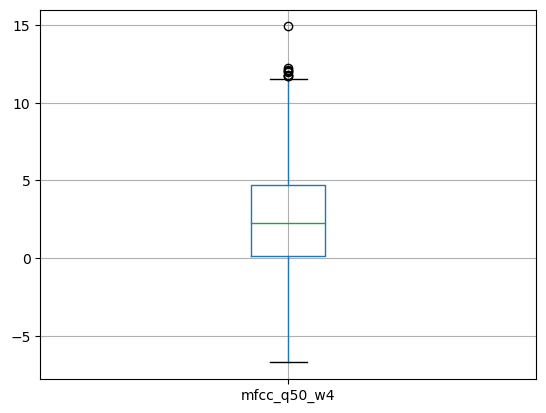

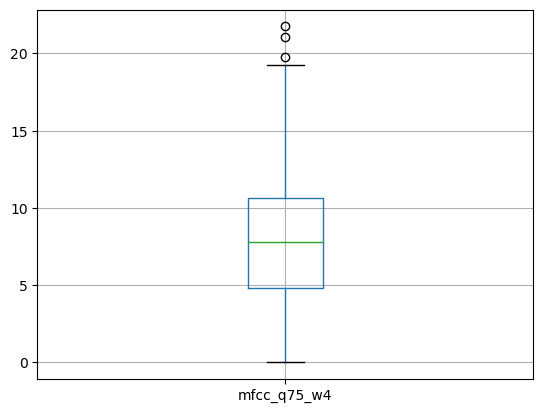

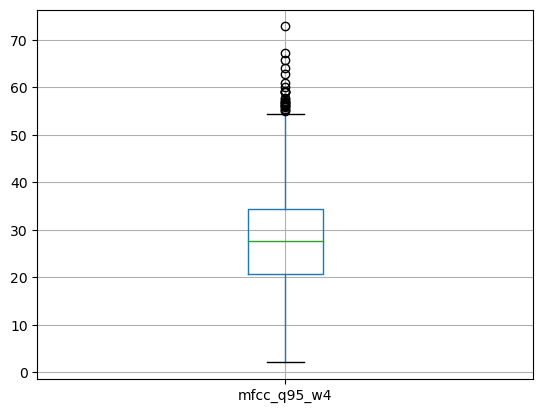

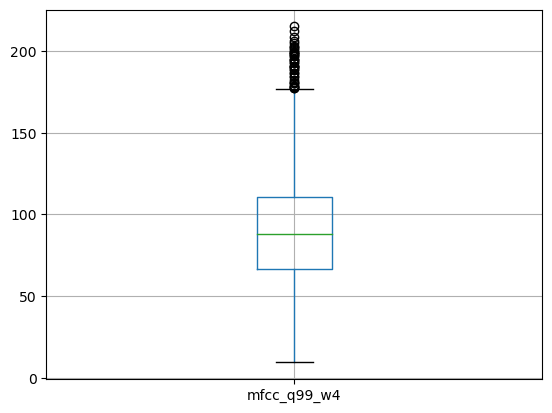

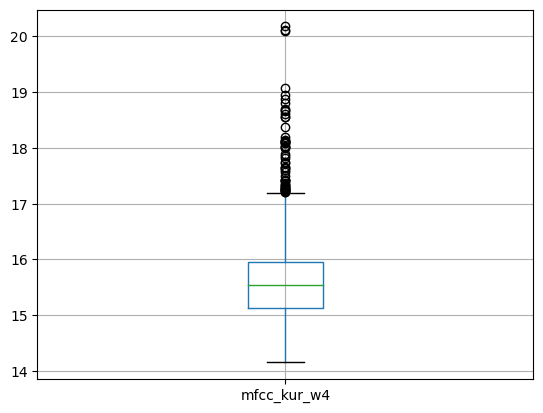

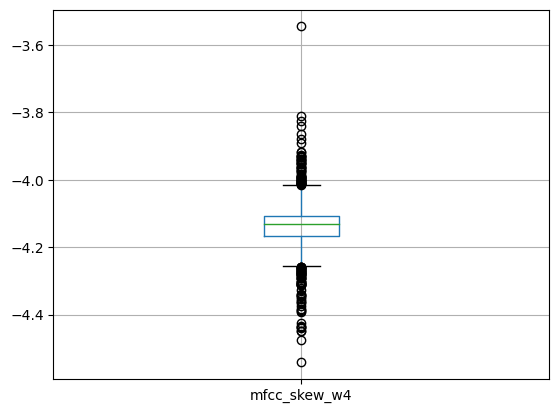

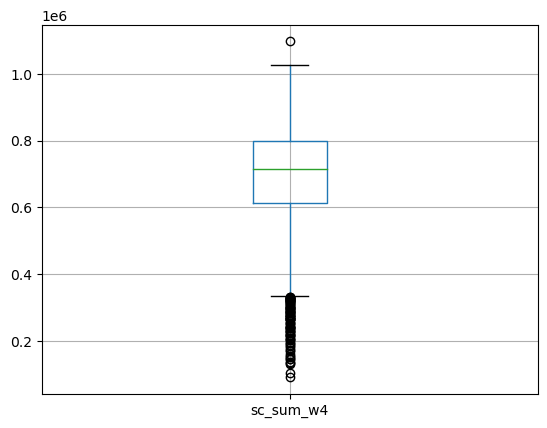

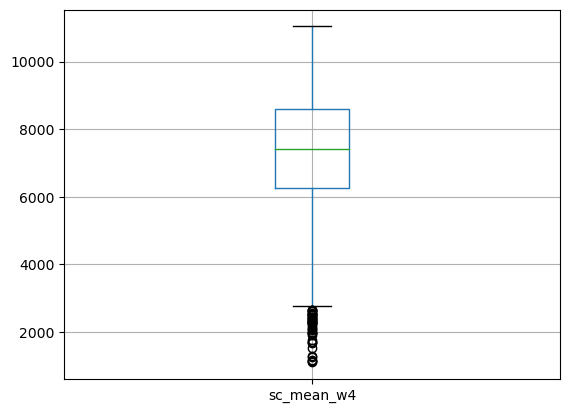

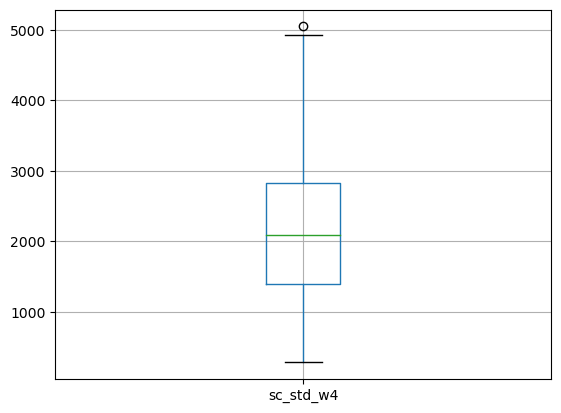

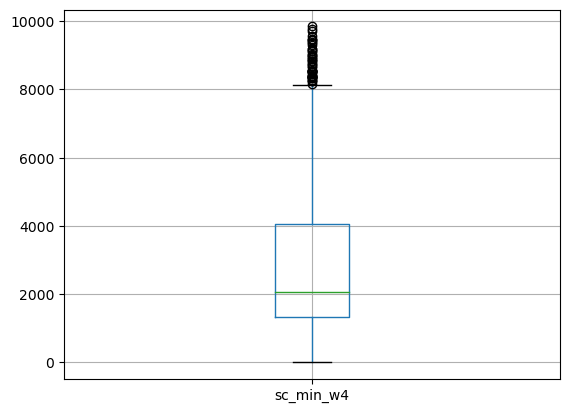

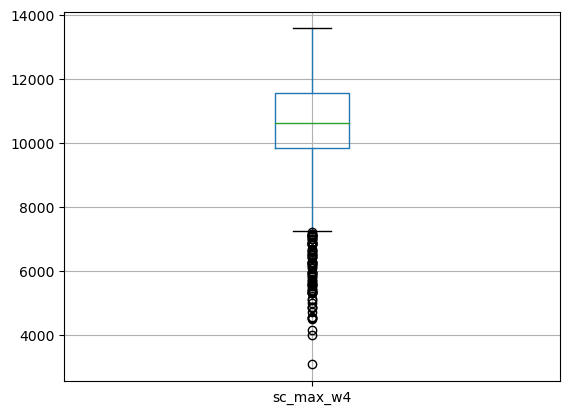

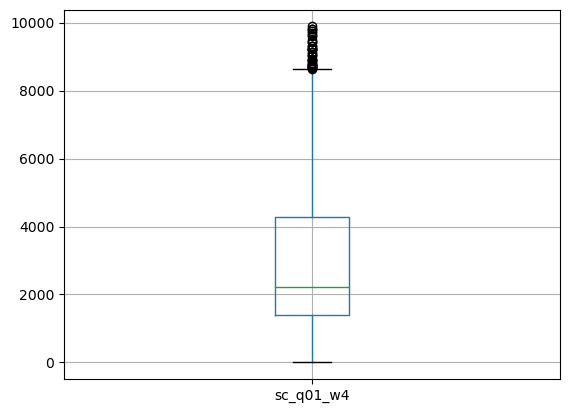

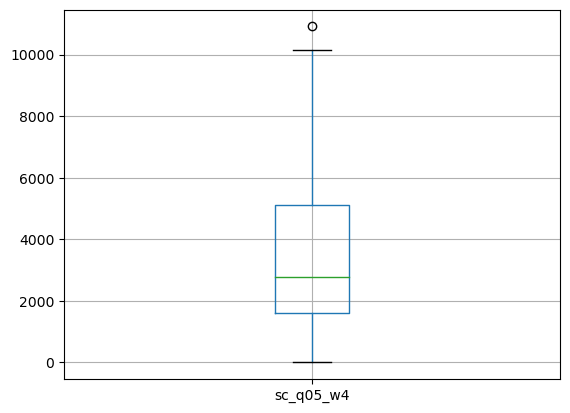

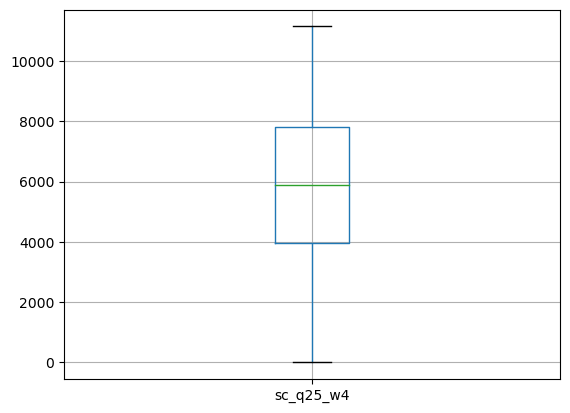

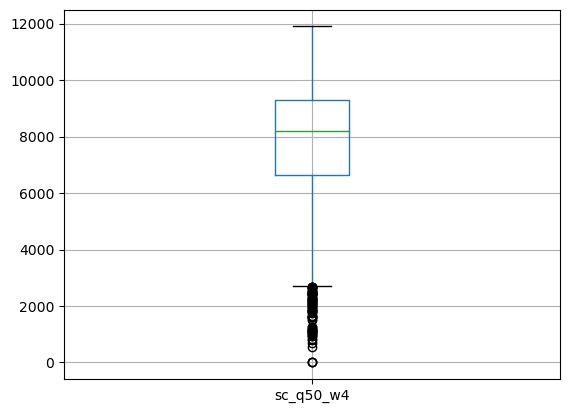

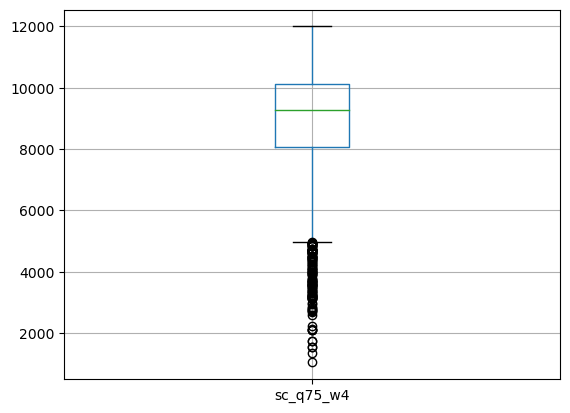

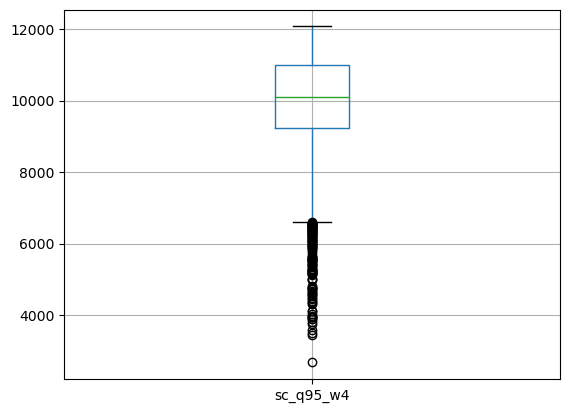

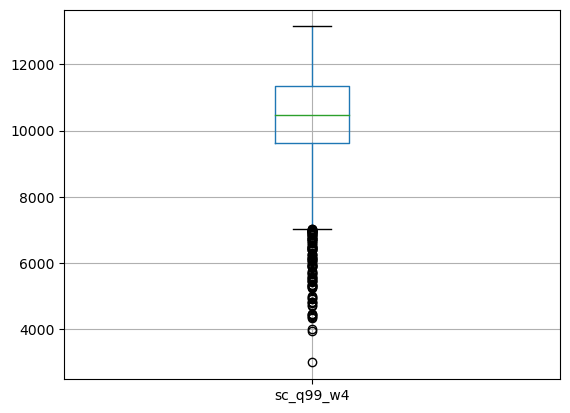

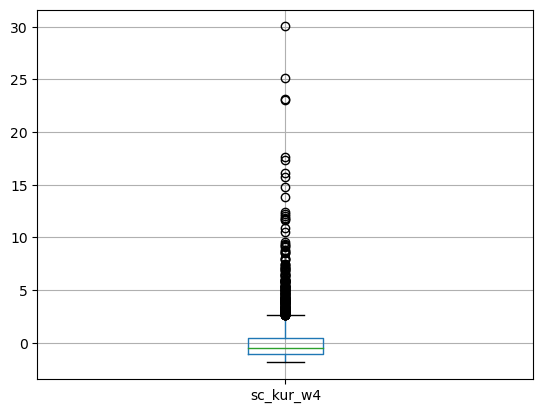

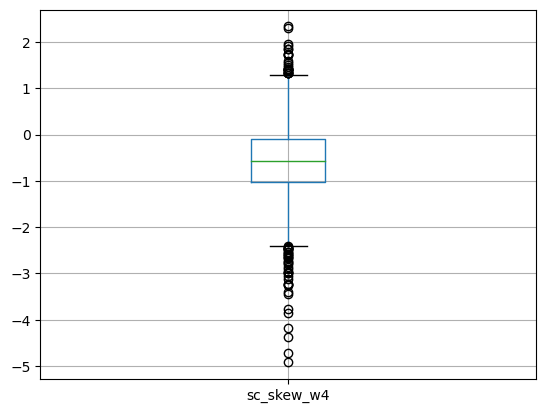

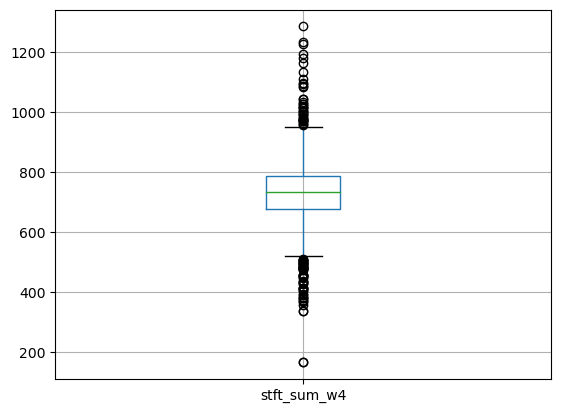

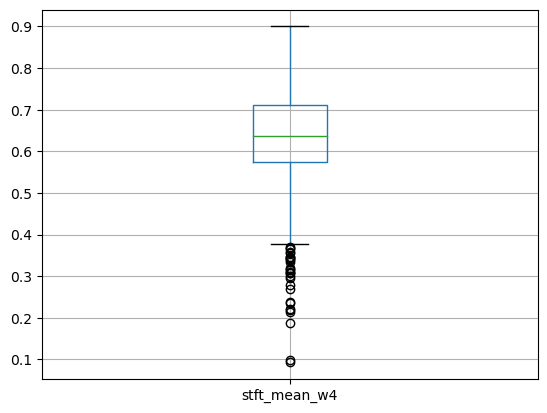

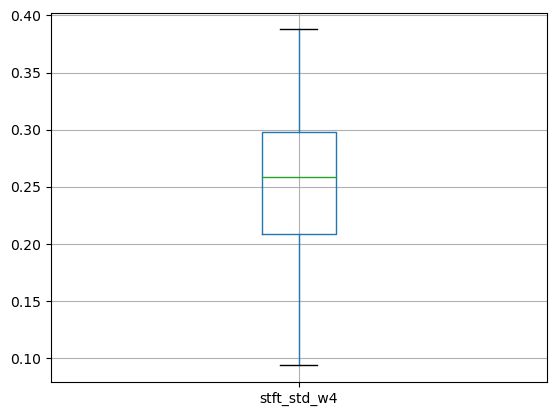

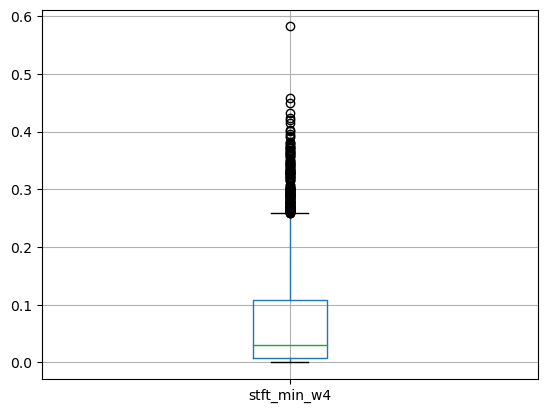

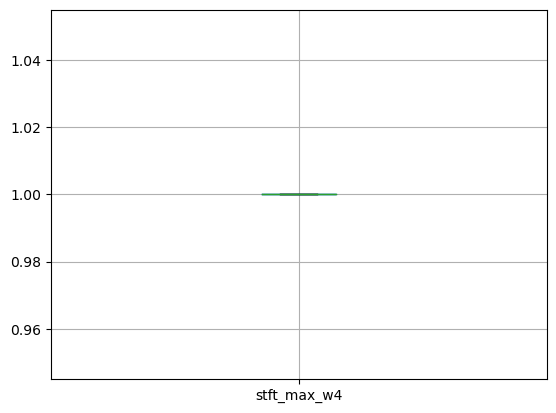

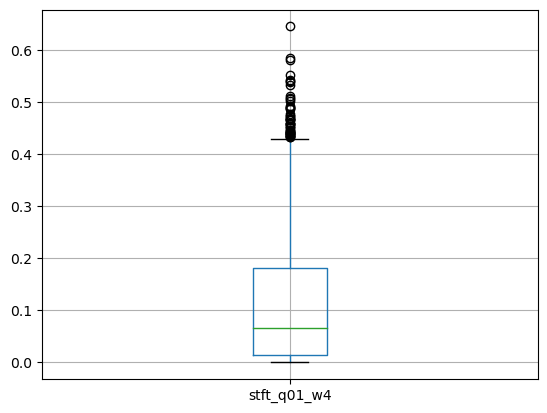

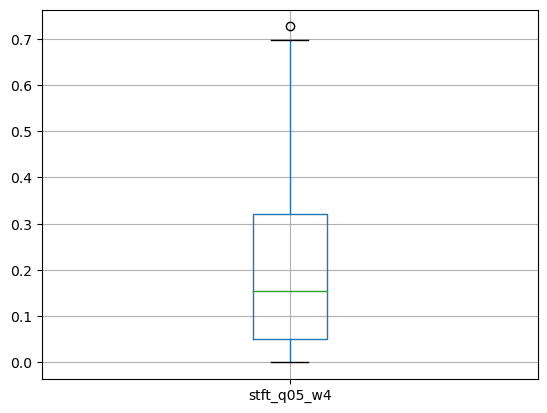

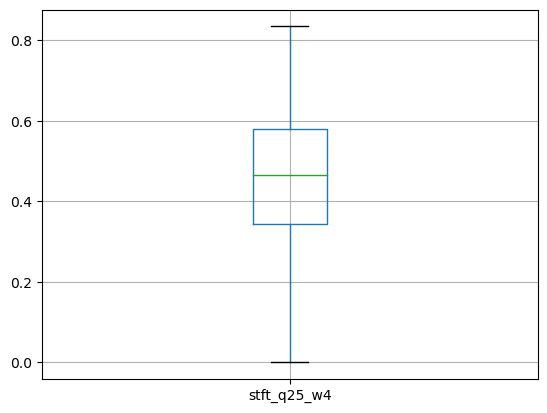

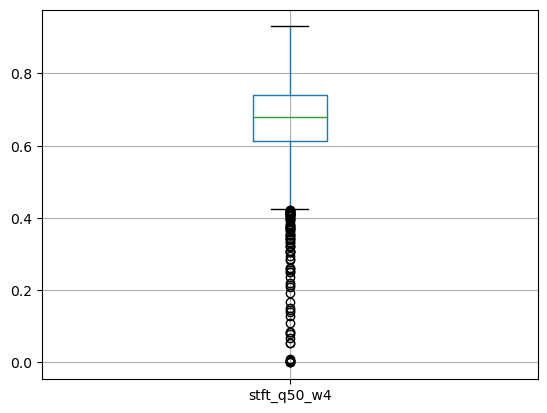

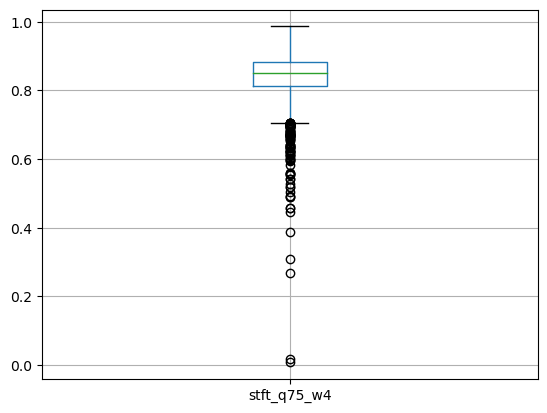

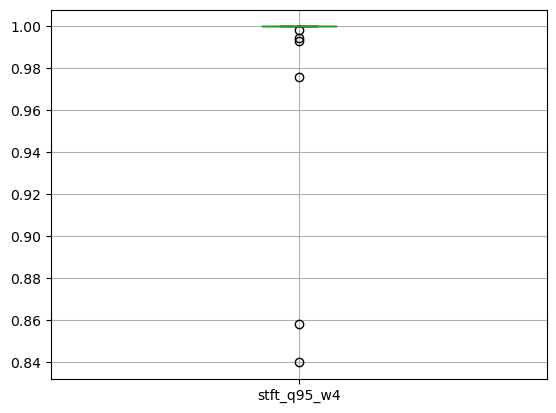

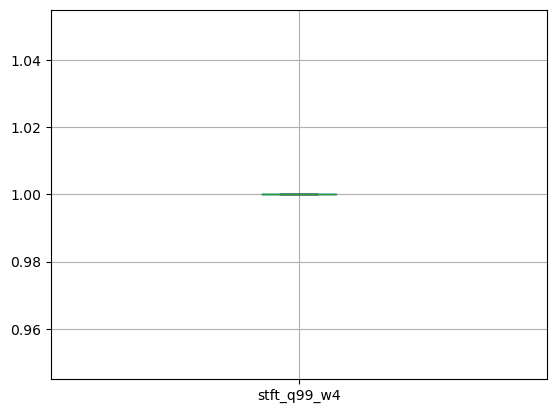

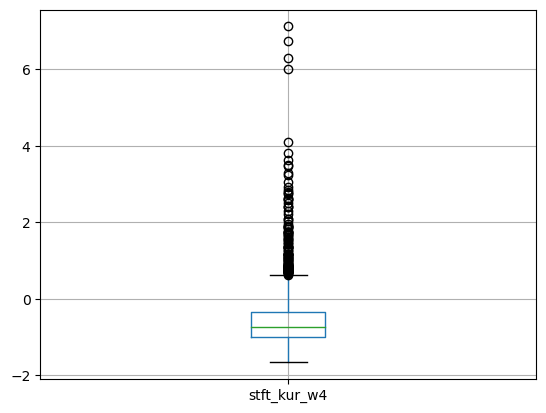

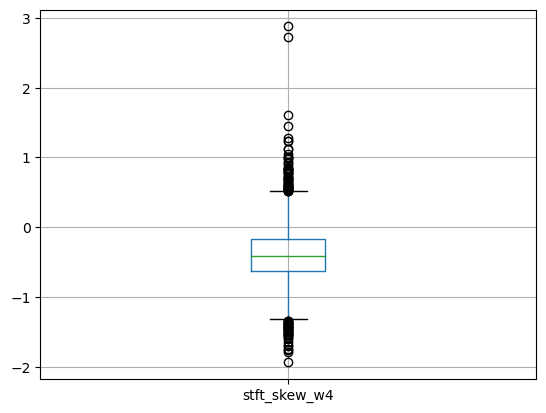

In [ ]:
for column in X_train:
    plt.figure()
    df.boxplot([column])

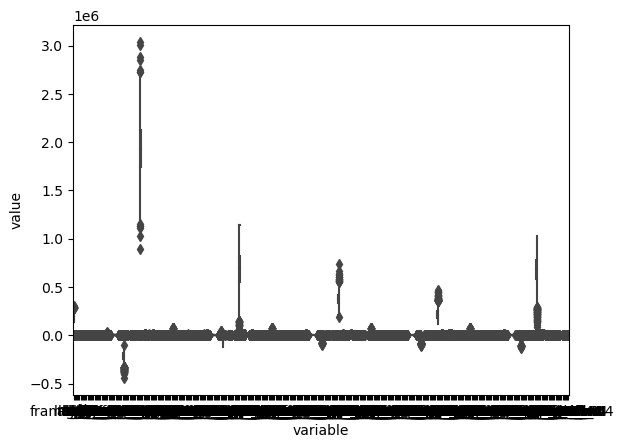

In [ ]:
sns.boxplot(x="variable", y="value", data=pd.melt(X_train))

plt.show()

## Automatic BoxPlot

In [ ]:
def is_outlier(x, k=1.5):
    q1 = np.quantile(x, 0.25)
    q3 = np.quantile(x, 0.75)
    iqr = q3 - q1
    outliers = list()
    for v in x:
        if v < q1 - k * iqr or v > q3 + k * iqr:
            outliers.append(True)
        else:
            outliers.append(False)
    return np.array(outliers)

In [ ]:
for column in X_train:
    outliers = is_outlier(X_train[column], k=1.5)
    print(column, np.unique(outliers, return_counts=True))

frame_count (array([False,  True]), array([1814,   14]))
sum (array([False,  True]), array([1435,  393]))
mean (array([False,  True]), array([1436,  392]))
std (array([False,  True]), array([1705,  123]))
min (array([False,  True]), array([1679,  149]))
max (array([False,  True]), array([1665,  163]))
q01 (array([False,  True]), array([1694,  134]))
q05 (array([False,  True]), array([1710,  118]))
q25 (array([False,  True]), array([1650,  178]))
q50 (array([False,  True]), array([1806,   22]))
q75 (array([False,  True]), array([1709,  119]))
q95 (array([False,  True]), array([1713,  115]))
q99 (array([False,  True]), array([1692,  136]))
kur (array([False,  True]), array([1757,   71]))
skew (array([False,  True]), array([1803,   25]))
lag1_sum (array([False,  True]), array([1420,  408]))
lag1_mean (array([False,  True]), array([1432,  396]))
lag1_std (array([False,  True]), array([1689,  139]))
lag1_min (array([False,  True]), array([1719,  109]))
lag1_max (array([False,  True]), array

sc_q25_w3 (array([False,  True]), array([1766,   62]))
sc_q50_w3 (array([False,  True]), array([1769,   59]))
sc_q75_w3 (array([False,  True]), array([1746,   82]))
sc_q95_w3 (array([False,  True]), array([1812,   16]))
sc_q99_w3 (array([False,  True]), array([1819,    9]))
sc_kur_w3 (array([False,  True]), array([1786,   42]))
sc_skew_w3 (array([False,  True]), array([1821,    7]))
stft_sum_w3 (array([False,  True]), array([1796,   32]))
stft_mean_w3 (array([False,  True]), array([1784,   44]))
stft_std_w3 (array([False,  True]), array([1725,  103]))
stft_min_w3 (array([False,  True]), array([1649,  179]))
stft_max_w3 (array([False]), array([1828]))
stft_q01_w3 (array([False,  True]), array([1667,  161]))
stft_q05_w3 (array([False,  True]), array([1691,  137]))
stft_q25_w3 (array([False,  True]), array([1729,   99]))
stft_q50_w3 (array([False,  True]), array([1785,   43]))
stft_q75_w3 (array([False,  True]), array([1815,   13]))
stft_q95_w3 (array([False]), array([1828]))
stft_q99_w3 

## HBOS

In [ ]:
clf = HBOS()
clf.fit(X_train)

HBOS(alpha=0.1, contamination=0.1, n_bins=10, tol=0.5)

In [ ]:
clf.decision_scores_

array([-252.23162119, -258.39674753, -263.7675959 , ..., -326.05107782,
       -331.01655757, -317.22676013])

In [ ]:
outliers_hbos = clf.predict(X_train)
np.unique(outliers_hbos, return_counts=True)

(array([0, 1]), array([1645,  183]))

In [ ]:
outliers_hbos

array([0, 0, 0, ..., 0, 0, 0])

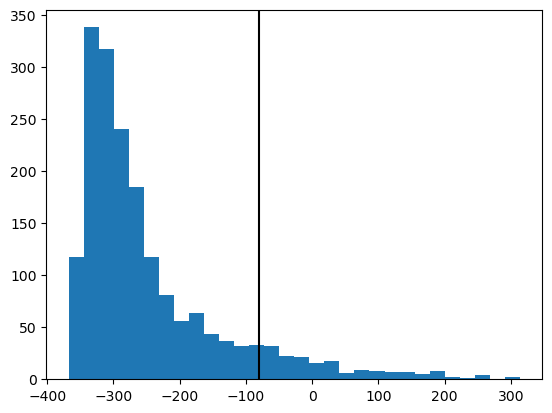

In [ ]:
plt.hist(clf.decision_scores_, bins=30)
plt.axvline(np.min(clf.decision_scores_[np.where(outliers_hbos==1)]), c='k')
plt.show()

## Isolation Forest

In [ ]:
type(X_train_np)

numpy.ndarray

In [ ]:
isol = IsolationForest(bootstrap=True,
                       contamination=0.05,
                       max_samples=600,
                       n_estimators=1000,
                       n_jobs=-1
                       )
isol.fit(X_train_np)
outliers_isol = isol.predict(X_train_np)

anomalies_isol = where(outliers_isol==-1)
anomalies_isol = X_train_np[anomalies_isol]

np.unique(outliers_isol, return_counts=True)

(array([-1,  1]), array([  92, 1736]))

In [ ]:
anomalies_isol = where(outliers_isol==-1)
anomalies_isol

(array([  32,   35,   93,   94,   95,  226,  240,  241,  242,  243,  248,
         249,  251,  285,  286,  287,  292,  295,  302,  303,  308,  309,
         310,  311,  344,  346,  382,  425,  450,  451,  552,  553,  554,
         555,  560,  561,  562,  563,  589,  613,  614,  615,  656,  657,
         658,  659,  832,  841,  853,  864,  866,  903,  954,  955,  969,
         970,  971, 1008, 1009, 1010, 1011, 1012, 1028, 1029, 1030, 1031,
        1074, 1075, 1177, 1247, 1283, 1384, 1480, 1481, 1603, 1702, 1703,
        1704, 1705, 1706, 1707, 1738, 1752, 1754, 1756, 1757, 1758, 1759,
        1800, 1801, 1802, 1803]),)

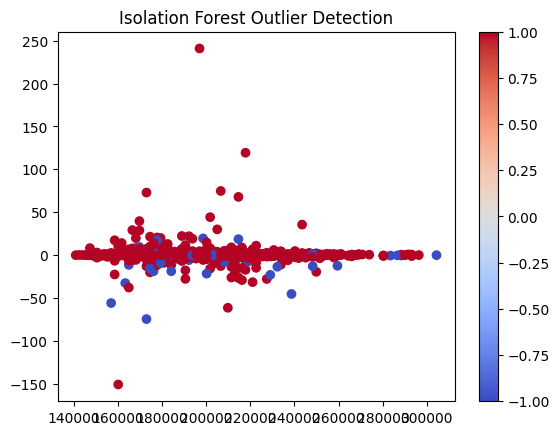

In [ ]:
# create scatter plot with outliers highlighted
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=outliers_isol, cmap='coolwarm')
plt.colorbar()
plt.title('Isolation Forest Outlier Detection')
plt.show()

## kNN

In [ ]:
clf = KNN(n_neighbors=5)
clf.fit(X_train)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [ ]:
outliers = clf.predict(X_train)
np.unique(outliers, return_counts=True)

(array([0, 1]), array([1682,  146]))

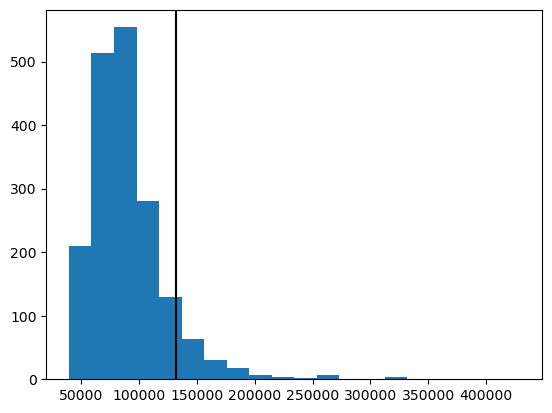

In [ ]:
plt.hist(clf.decision_scores_, bins=20)
plt.axvline(np.min(clf.decision_scores_[np.where(outliers==1)]), c='k')
plt.show()

## LOF

In [ ]:
#Professor Way
clf = LocalOutlierFactor(n_neighbors=2, novelty=True) # , novelty=True
clf.fit(X_train)

y_pred = clf.predict(X_test)

In [ ]:
np.unique(y_pred, return_counts=True)

(array([-1,  1]), array([ 53, 571]))

In [ ]:
clf = LocalOutlierFactor(n_neighbors=2)
outliers = clf.fit_predict(X_train)
np.unique(outliers, return_counts=True)

(array([-1,  1]), array([  56, 1772]))

In [ ]:
clf.negative_outlier_factor_

array([-1.02679739, -0.97211026, -1.17649935, ..., -0.99785302,
       -0.95117148, -1.04609114])

In [ ]:
np.unique(outliers, return_counts=True)

(array([-1,  1]), array([  56, 1772]))

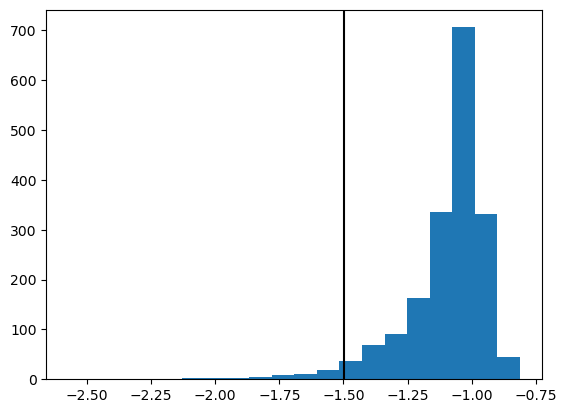

In [ ]:
plt.hist(clf.negative_outlier_factor_, bins=20)
plt.axvline(np.min(clf.negative_outlier_factor_[np.where(outliers==1)]), c='k')
plt.show()

In [ ]:
#Another Way
lof = LocalOutlierFactor(n_neighbors=7,
                         contamination=.01)
outliers_lof = lof.fit_predict(X_train_np)

anomalies_lof = where(outliers_lof==-1)
anomalies_lof = X_train_np[anomalies_lof]

np.unique(outliers_lof, return_counts=True)

(array([-1,  1]), array([  19, 1809]))

-1.5916353376602819
-2.4946164078009043


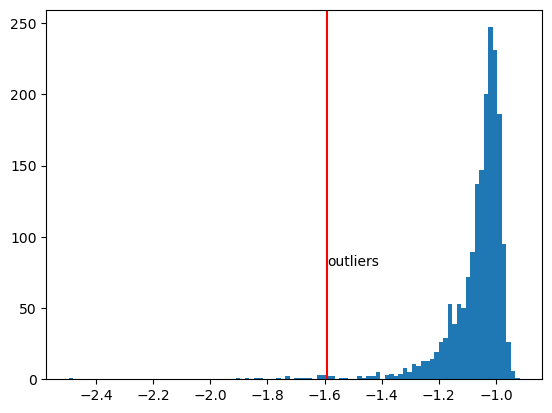

In [ ]:
max_val = np.max(lof.negative_outlier_factor_[np.where(outliers_lof==-1)])
min_val = np.min(lof.negative_outlier_factor_[np.where(outliers_lof==-1)])

print(max_val)
print(min_val)

plt.hist(lof.negative_outlier_factor_, bins=100)
plt.axvline(max_val, c='red')
plt.text(max_val, 80, 'outliers')
plt.show()

## ABOD

In [ ]:
#Professor Way
clf = ABOD()
clf.fit(X_train_np)

ABOD(contamination=0.1, method='fast', n_neighbors=5)

In [ ]:
outliers_abd = clf.predict(X_train)
np.unique(outliers_abd, return_counts=True)

(array([0, 1]), array([1605,  223]))

-2.4520657949004303e-24
-5.352056421687518e-21


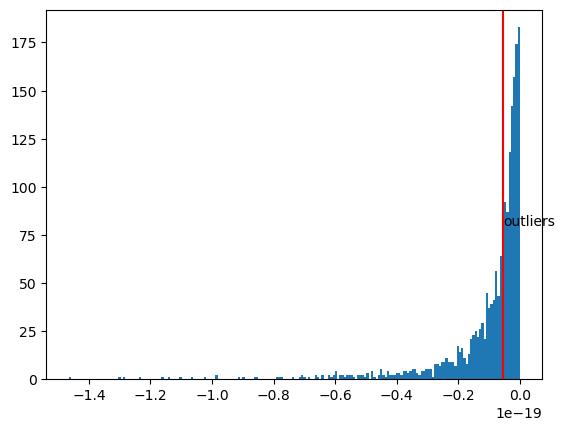

In [ ]:
max_val = np.max(clf.decision_scores_[np.where(outliers_abd==1)])
min_val = np.min(clf.decision_scores_[np.where(outliers_abd==1)])

print(max_val)
print(min_val)

plt.hist(clf.decision_scores_, bins=200)
plt.axvline(min_val, c='red')
plt.text(min_val, 80, 'outliers')
plt.show()

In [ ]:
#Other Way
abd = ABOD(n_neighbors=7,
           contamination=.02
           )
abd.fit(X_train)
outliers_abd = abd.predict(X_train)

anomalies_abd = where(outliers_abd==1)
# anomalies_abd = X_train[anomalies_abd]

np.unique(outliers_abd, return_counts=True)

(array([0, 1]), array([1789,   39]))

In [ ]:
max_val = np.max(abd.decision_scores_[np.where(outliers_abd==1)])
min_val = np.min(abd.decision_scores_[np.where(outliers_abd==1)])

print(max_val)
print(min_val)

-3.435823505391909e-24
-2.5344907281175063e-22


## Dealing with Outliers

In [ ]:
outliers_final_isol = where(outliers_isol == -1)
tot = []
for x in outliers_final_isol:
    tot.extend(x)

In [ ]:
X_train.drop(tot, inplace=True)
y_train = np.delete(y_train, tot)

In [ ]:
# outliers_final_dbscan = where(dbscan.labels_ == -1)
outliers_final_hbos = where(outliers_hbos == 1)
outliers_final_isol = where(outliers_isol == -1)
outliers_final_abd = where(outliers_abd == 1)
outliers_final_lof = where(outliers_lof == -1)

tot = []
for x in outliers_final_hbos:
    tot.extend(x)
for x in outliers_final_isol:
    tot.extend(x)
for x in outliers_final_abd:
    tot.extend(x)
for x in outliers_final_lof:
    tot.extend(x)
print(tot)

len(tot)

[32, 33, 34, 35, 42, 92, 93, 94, 95, 138, 194, 195, 196, 197, 198, 199, 225, 226, 240, 241, 242, 243, 248, 249, 250, 251, 280, 283, 284, 285, 286, 287, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 308, 309, 310, 311, 344, 346, 352, 391, 407, 449, 450, 451, 509, 510, 511, 536, 552, 553, 554, 555, 560, 561, 562, 563, 596, 599, 612, 613, 614, 615, 620, 621, 622, 623, 656, 657, 658, 659, 716, 717, 718, 719, 761, 771, 820, 821, 823, 864, 865, 866, 867, 908, 911, 952, 953, 954, 955, 968, 969, 970, 971, 987, 996, 997, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1024, 1025, 1026, 1028, 1029, 1030, 1031, 1036, 1037, 1073, 1074, 1075, 1177, 1179, 1185, 1187, 1236, 1237, 1239, 1244, 1245, 1246, 1247, 1280, 1282, 1283, 1384, 1385, 1386, 1387, 1444, 1445, 1550, 1594, 1600, 1601, 1602, 1603, 1654, 1697, 1699, 1702, 1703, 1704, 1705, 1706, 1707, 1741, 1743, 1748, 1749, 1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759, 1762, 1766, 1800, 1801, 1802, 1803, 1819, 32, 35, 40, 93, 94

517

In [ ]:
X_train.shape

(1828, 425)

In [ ]:
#I look for all the values that appear in the outliers list more than once and insert them into a list and then transform it into an array
listadoppi = []
import collections
for item, count in collections.Counter(tot).items():
    if count > 2:
        listadoppi.append(item)
print(listadoppi)
finale_out = np.array(listadoppi)

anomalies_final = X_train.iloc[finale_out]
print(len(anomalies_final))

[35, 240, 286, 292, 308, 344, 346, 352, 554, 614, 656, 657, 1011, 1074, 1177, 1239, 1247, 1283, 1702, 1703, 1704, 1756, 1758, 1759, 1801, 1803, 1819, 382, 425, 832, 853]
31


In [ ]:
finale_out

array([  35,  240,  286,  292,  308,  344,  346,  352,  554,  614,  656,
        657, 1011, 1074, 1177, 1239, 1247, 1283, 1702, 1703, 1704, 1756,
       1758, 1759, 1801, 1803, 1819,  382,  425,  832,  853])

### Removing Outliers

In [ ]:
X_train.shape

(1828, 425)

In [ ]:
df_wo_outliers = X_train.copy()
df_wo_outliers.drop(finale_out, inplace=True)
df_wo_outliers.shape

(1803, 425)

In [ ]:
X_train2 = df_wo_outliers.values
y_train2 = y_train
y_train2 = np.delete(y_train2, finale_out)

ValueError: Length of values (1803) does not match length of index (1828)

In [ ]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train2, y_train2)
y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=4))

Accuracy 0.9118589743589743
F1-score [0.9009009  0.92063492]
              precision    recall  f1-score   support

        song     0.8591    0.9470    0.9009       264
      speech     0.9580    0.8861    0.9206       360

    accuracy                         0.9119       624
   macro avg     0.9085    0.9165    0.9108       624
weighted avg     0.9161    0.9119    0.9123       624



In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train2, y_train2)
y_pred = knn.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=4))

Accuracy 0.8509615384615384
F1-score [0.83060109 0.86695279]
              precision    recall  f1-score   support

        song     0.8000    0.8636    0.8306       264
      speech     0.8938    0.8417    0.8670       360

    accuracy                         0.8510       624
   macro avg     0.8469    0.8527    0.8488       624
weighted avg     0.8541    0.8510    0.8516       624



### Transforming Outliers

In [ ]:
df_outliers_mean = X_train.copy()
df_outliers_mean.drop(finale_out, inplace=True)

means=[] #contains the averages of all 425 features of the dataset WITHOUT outliers
for col in df_outliers_mean.columns:
    means.append(df_outliers_mean[col].mean())
len(df_outliers_mean)

1797

In [ ]:
for i in finale_out: # create an extra line for each outliers and put means in all the featuers
    df_outliers_mean.loc[i] = means

df_outliers_mean.info()  # at this point the outliers with the "clean" averages of the train have been entered
# in fact in the first cell they are 31 less, now again 1828

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1828 entries, 0 to 853
Columns: 425 entries, frame_count to stft_skew_w4
dtypes: float64(425)
memory usage: 5.9 MB


In [ ]:
df_outliers_mean = df_outliers_mean.sort_index()
df_outliers_mean.describe().T

count          mean           std            min  \
frame_count   1828.0  1.944469e+05  28234.255852  140941.000000   
sum           1828.0  1.016252e-01      9.076414    -151.120178   
mean          1828.0  4.950414e-07      0.000048      -0.000944   
std           1828.0  1.919004e-02      0.018880       0.000652   
min           1828.0 -1.566102e-01      0.161980      -0.998810   
...              ...           ...           ...            ...   
stft_q75_w4   1828.0  8.425691e-01      0.073943       0.007891   
stft_q95_w4   1828.0  9.999044e-01      0.003370       0.858079   
stft_q99_w4   1828.0  1.000000e+00      0.000000       1.000000   
stft_kur_w4   1828.0 -5.676710e-01      0.742857      -1.644320   
stft_skew_w4  1828.0 -3.886273e-01      0.418358      -1.938627   

                        25%           50%           75%            max  
frame_count   171372.000000  1.889890e+05  2.146140e+05  304304.000000  
sum               -0.325722 -2.864075e-02  1.931534e-01     240.889893  
mean              -0.000002 -1.580000e-07  9.737500e-07       0.001223  
std                0.006577  1.362359e-02  2.432715e-02       0.123267  
min               -0.191216 -1.007385e-01 -5.184937e-02      -0.006134  
...                     ...           ...           ...            ...  
stft_q75_w4        0.812753  8.535492e-01  8.878475e-01       0.984524  
stft_q95_w4        1.000000  1.000000e+00  1.000000e+00       1.000000  
stft_q99_w4        1.000000  1.000000e+00  1.000000e+00       1.000000  
stft_kur_w4       -1.005487 -7.322680e-01 -3.322371e-01       7.127631  
stft_skew_w4      -0.629740 -3.943501e-01 -1.622093e-01       2.880807  

[425 rows x 8 columns]

In [ ]:
X_train3 = df_outliers_mean.values
y_train3 = y_train

In [ ]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train3, y_train3)
y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=4))

Accuracy 0.9198717948717948
F1-score [0.9070632  0.92957746]
              precision    recall  f1-score   support

        song     0.8905    0.9242    0.9071       264
      speech     0.9429    0.9167    0.9296       360

    accuracy                         0.9199       624
   macro avg     0.9167    0.9205    0.9183       624
weighted avg     0.9207    0.9199    0.9201       624



In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train3, y_train3)
y_pred = knn.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=4))

Accuracy 0.8509615384615384
F1-score [0.83060109 0.86695279]
              precision    recall  f1-score   support

        song     0.8000    0.8636    0.8306       264
      speech     0.8938    0.8417    0.8670       360

    accuracy                         0.8510       624
   macro avg     0.8469    0.8527    0.8488       624
weighted avg     0.8541    0.8510    0.8516       624

